# Import libs

In [ ]:
import re
import seaborn as sns
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib import rcParams
import matplotlib as mpl

tqdm.pandas()

sns.set_theme()
rcParams['figure.figsize'] = 10, 5
mpl.rcParams['figure.dpi'] = 300
# %config InlineBackend.figure_format='retina'


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [ ]:
rcParams['figure.figsize'] = 10, 5
mpl.rcParams['figure.dpi'] = 300

# Git clone

In [ ]:
# Clone the entire repo.
!git clone https://github.com/Tuan-Lee-23/Vietnamese-Reactionary-Article-Classification-.git
%cd Vietnamese-Reactionary-Article-Classification-/
!ls

fatal: destination path 'Vietnamese-Reactionary-Article-Classification-' already exists and is not an empty directory.
/content/Vietnamese-Reactionary-Article-Classification-
analysis  data	demo  modeling	README.md


In [ ]:
%cd data/preprocessed/

/content/Vietnamese-Reactionary-Article-Classification-/data/preprocessed


In [ ]:
!unzip preprocessed.zip

Archive:  preprocessed.zip
replace preprocessed.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: preprocessed.csv        


In [ ]:
!ls

0  preprocessed.csv  Preprocessing.ipynb  resources
1  preprocessed.zip  README.md


In [ ]:
df = pd.read_csv('preprocessed.csv', index_col= 0)
df = df.drop('Unnamed: 0.1', axis = 1)
df.head()

content  ...                                       sen_word_seg
0  THẦY GIÁO THỂ HIỆN VĂN HÓA ĐẢNG?\n\nKhoảng Trờ...  ...  THẦY_GIÁO THỂ_HIỆN VĂN HÓA ĐẢNG ? Khoảng_Trời_...
1  Nguyễn Đình Cống\n3 giờ ·\nTHƯ TRẢ LỜI CỦA BỘ ...  ...  Nguyễn_Đình_Cống 3 giờ · THƯ TRẢ_LỜI CỦA BỘ_TR...
2  Kế hoạchÔNG BIẾT Ngân hàngỤC SAO CÒN TỰ HÀO?\n...  ...  Kế hoạchÔNG BIẾT Ngân hàngỤC SAO CÒN TỰ_HÀO ? ...
3  \nTUOITRE.Việt Nam\nHàng ngàn người tiễn biệt ...  ...  TUOITRE.Việt Nam_Hàng ngàn người tiễn_biệt cố ...
4  Lý thuyết cai trị dân bằng bạo lực "cách mạng"...  ...  Lý_thuyết cai_trị dân bằng bạo_lực " cách_mạng...

[5 rows x 4 columns]

In [ ]:
df['sen_word_seg_lower'] = df['sen_word_seg'].str.lower()

#Count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



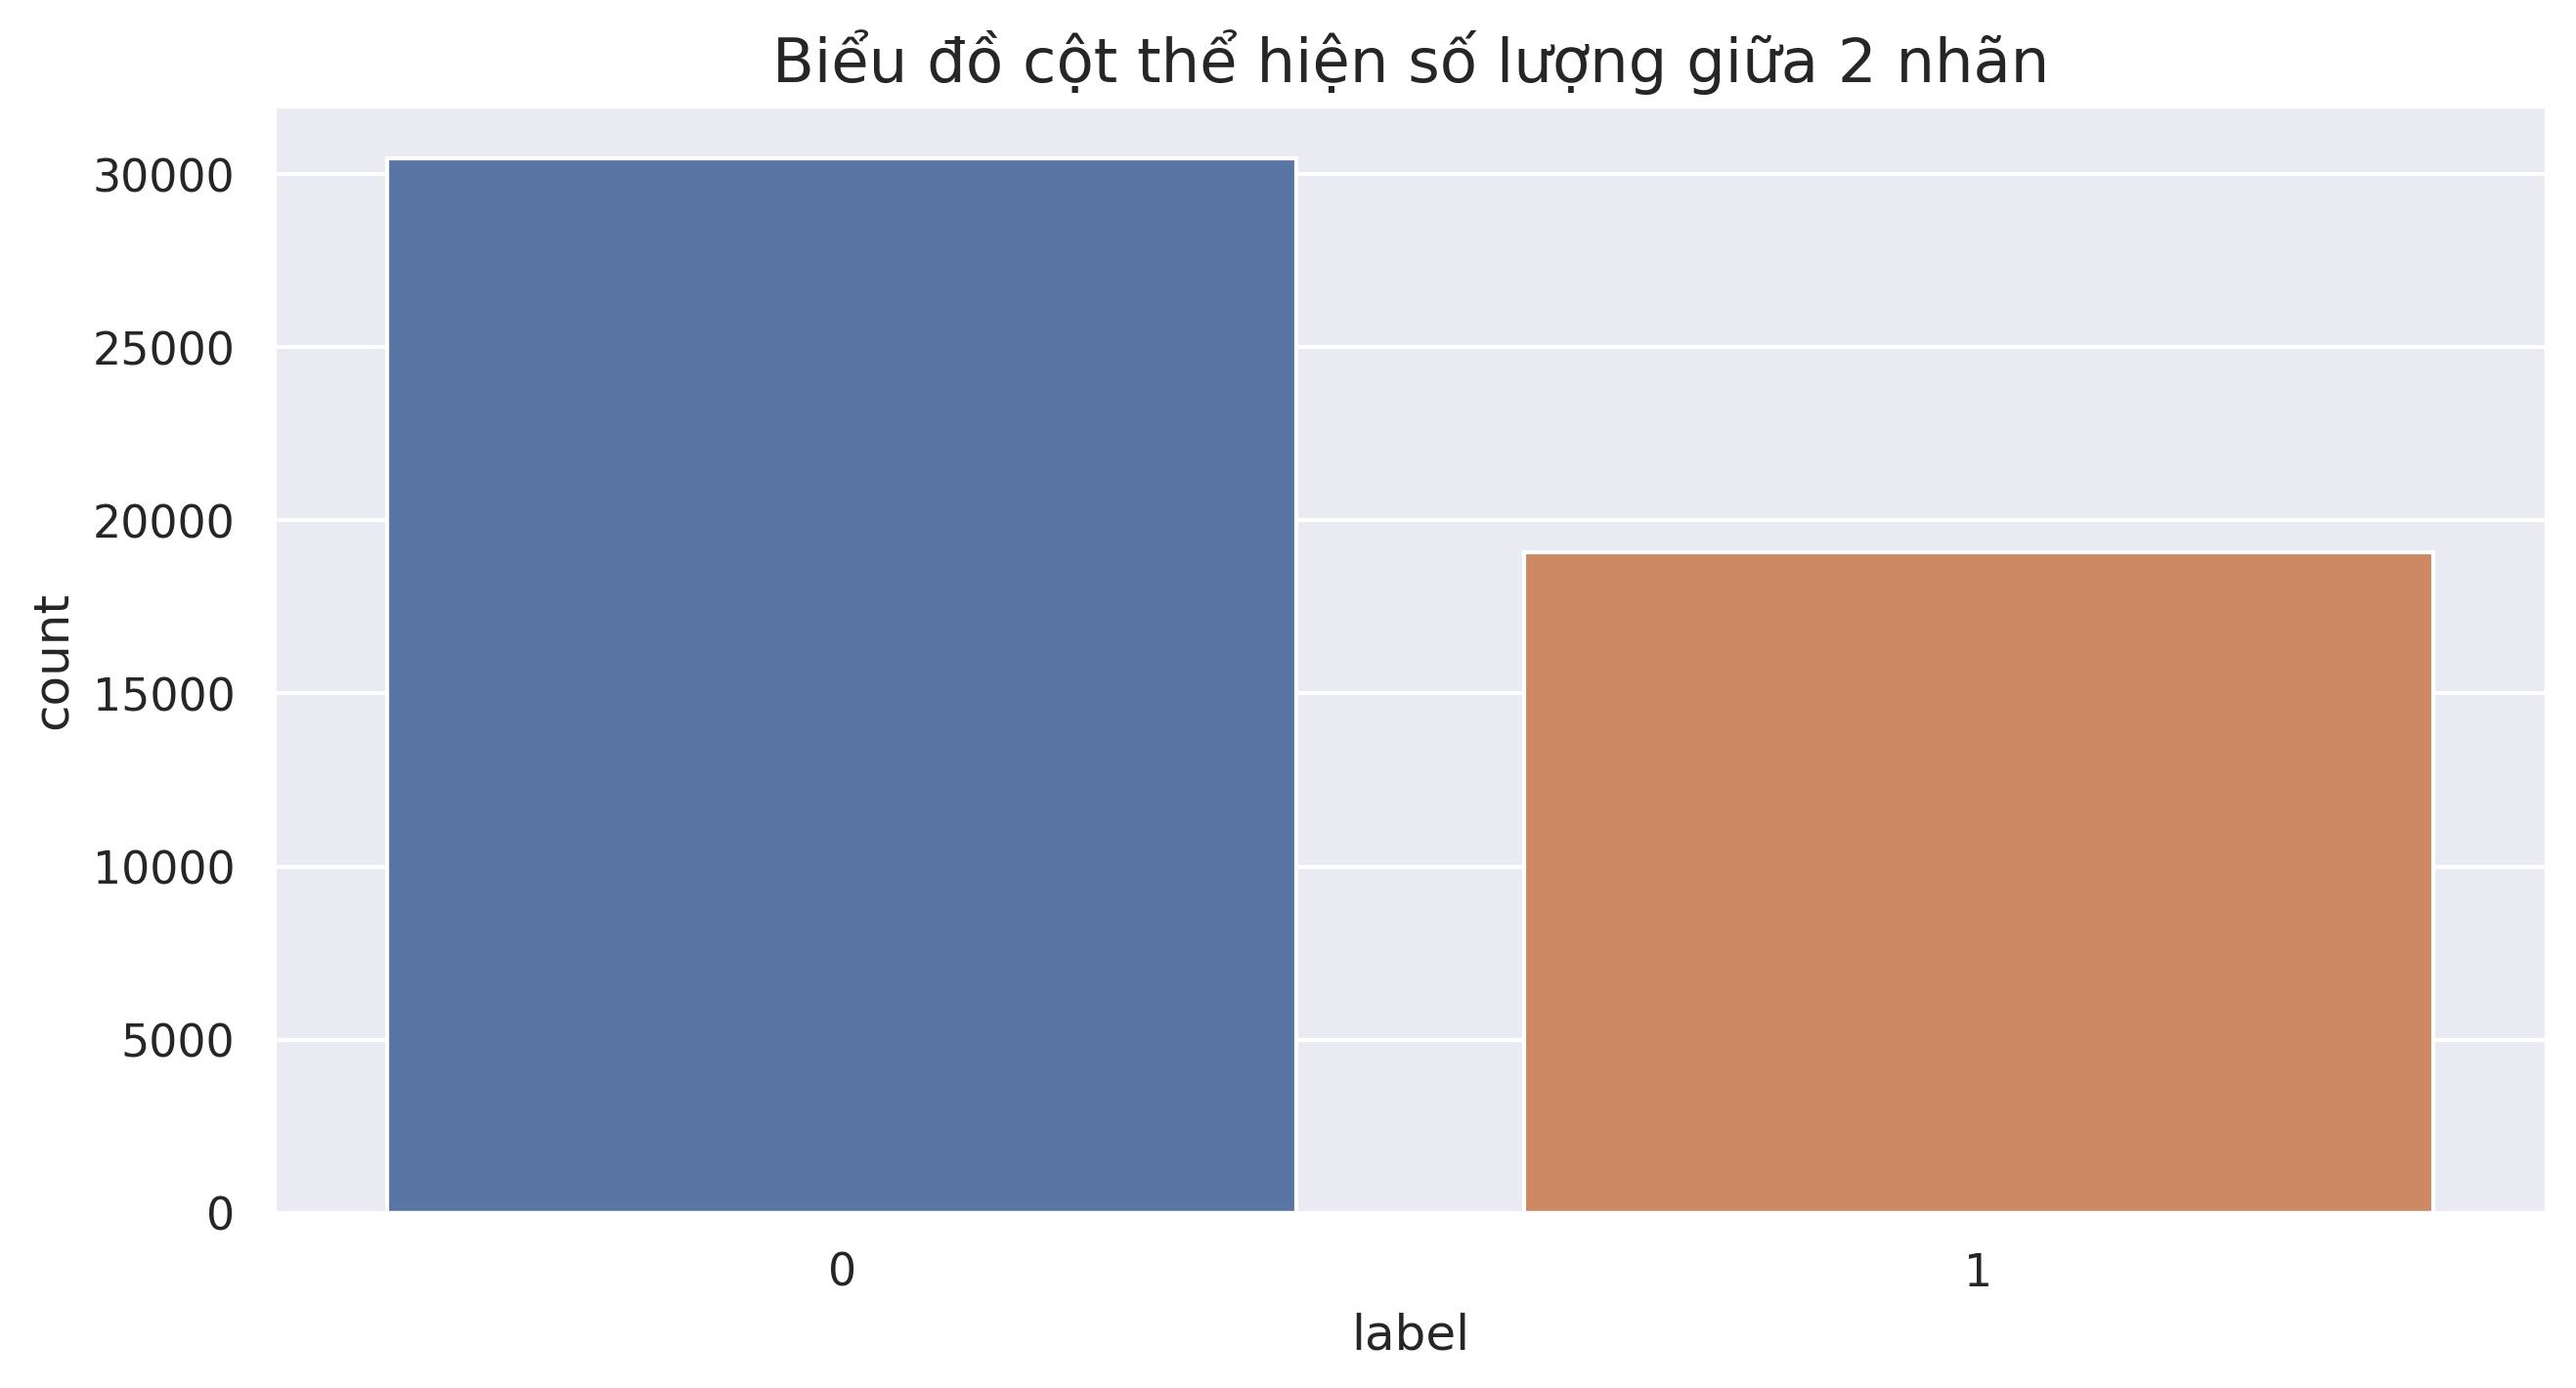

0    30451
1    19066
Name: label, dtype: int64


In [ ]:
sns.countplot(df['label'])
plt.title('Biểu đồ cột thể hiện số lượng giữa 2 nhãn', fontsize = 15)
plt.show()
print(df['label'].value_counts())

# Distribution of length

## Theo từ

In [ ]:
df['word_sep'] = df['sen_word_seg_lower'].str.replace('.', '')
df['word_sep'] = df['word_sep'].str.replace('!', '')
df['word_sep'] = df['word_sep'].str.replace('?', '')
df['word_sep'] = df['word_sep'].str.replace("'", '')
df['word_sep'] = df['word_sep'].str.replace('"', '')
df['word_sep'] = df['word_sep'].str.replace(',', '')
df['word_sep'] = df['word_sep'].str.replace('(', '')
df['word_sep'] = df['word_sep'].str.replace(')', '')
df['word_sep'] = df['word_sep'].str.replace('“', '')
df['word_sep'] = df['word_sep'].str.replace('”', '')
df['word_sep'] = df['word_sep'].str.replace(';', '')
df['word_sep'] = df['word_sep'].str.replace(':', '')
df['word_sep'] = df['word_sep'].str.replace('-', '')
df['word_sep'] = df['word_sep'].str.replace('tp', 'thành_phố')
# df['word_sep'] = df['word_sep'].str.replace('...', '')
df['word_sep'] = df['word_sep'].str.replace('’', '')


df['word_sep'] = df['word_sep'].str.split(' ')

In [ ]:
df['word_length'] = df['word_sep'].apply(len)

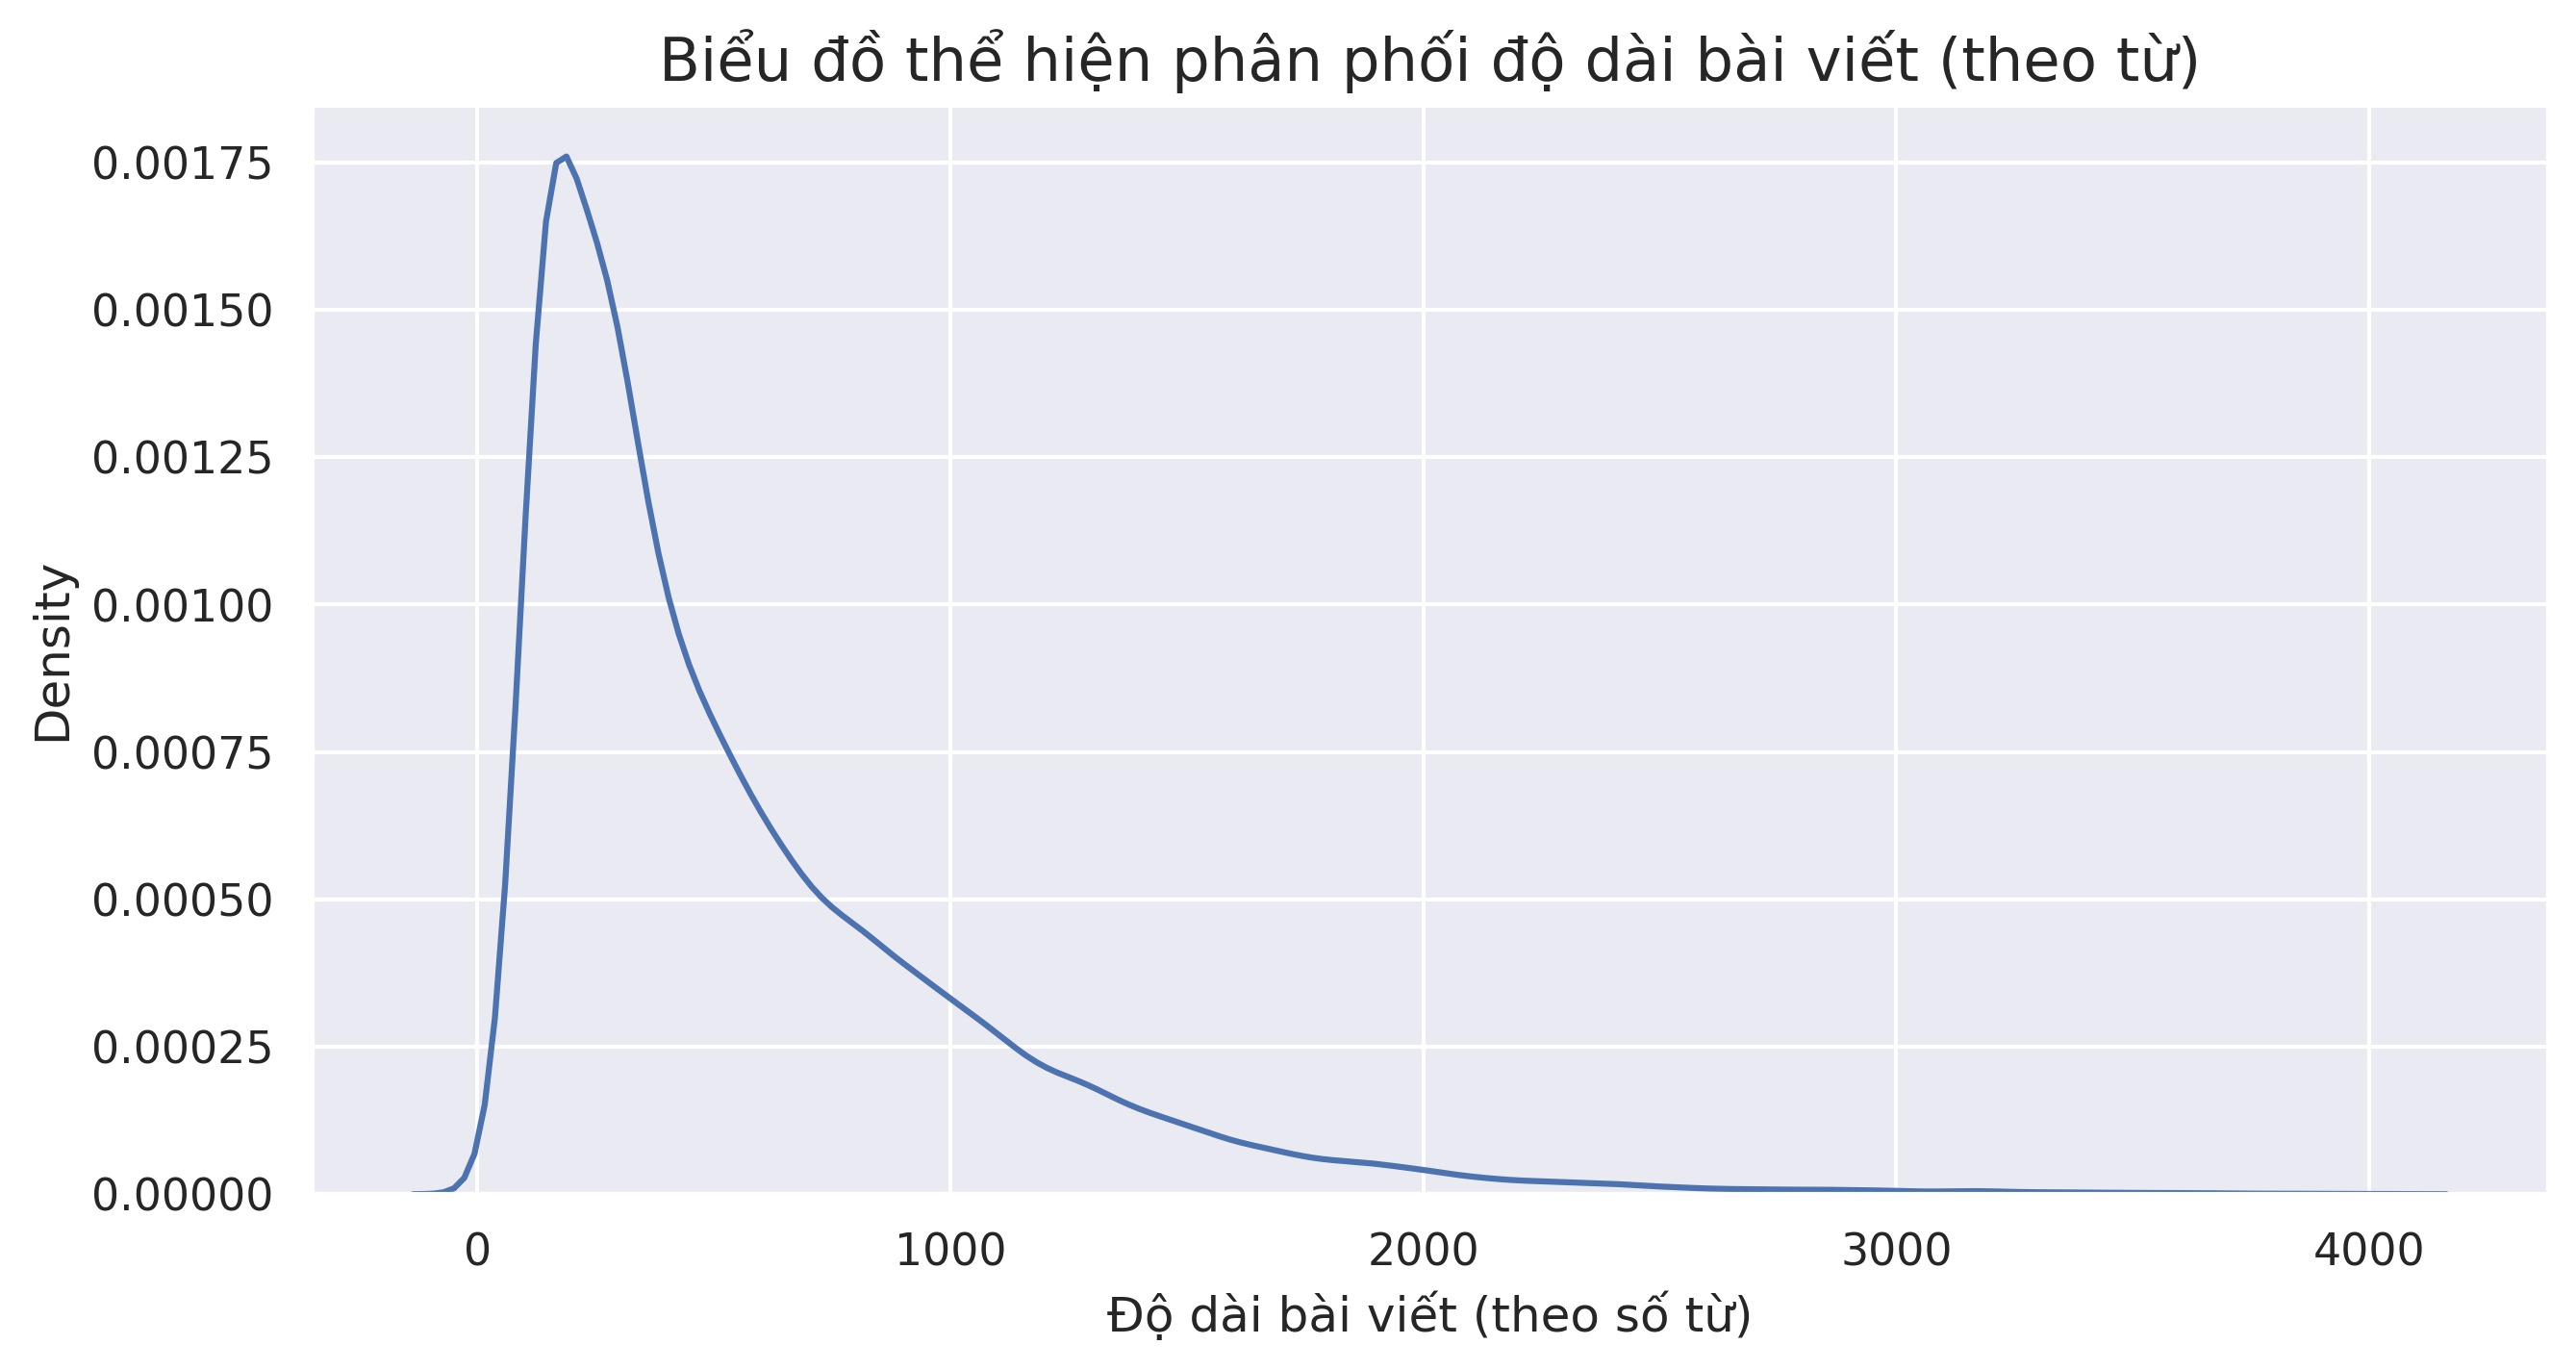

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



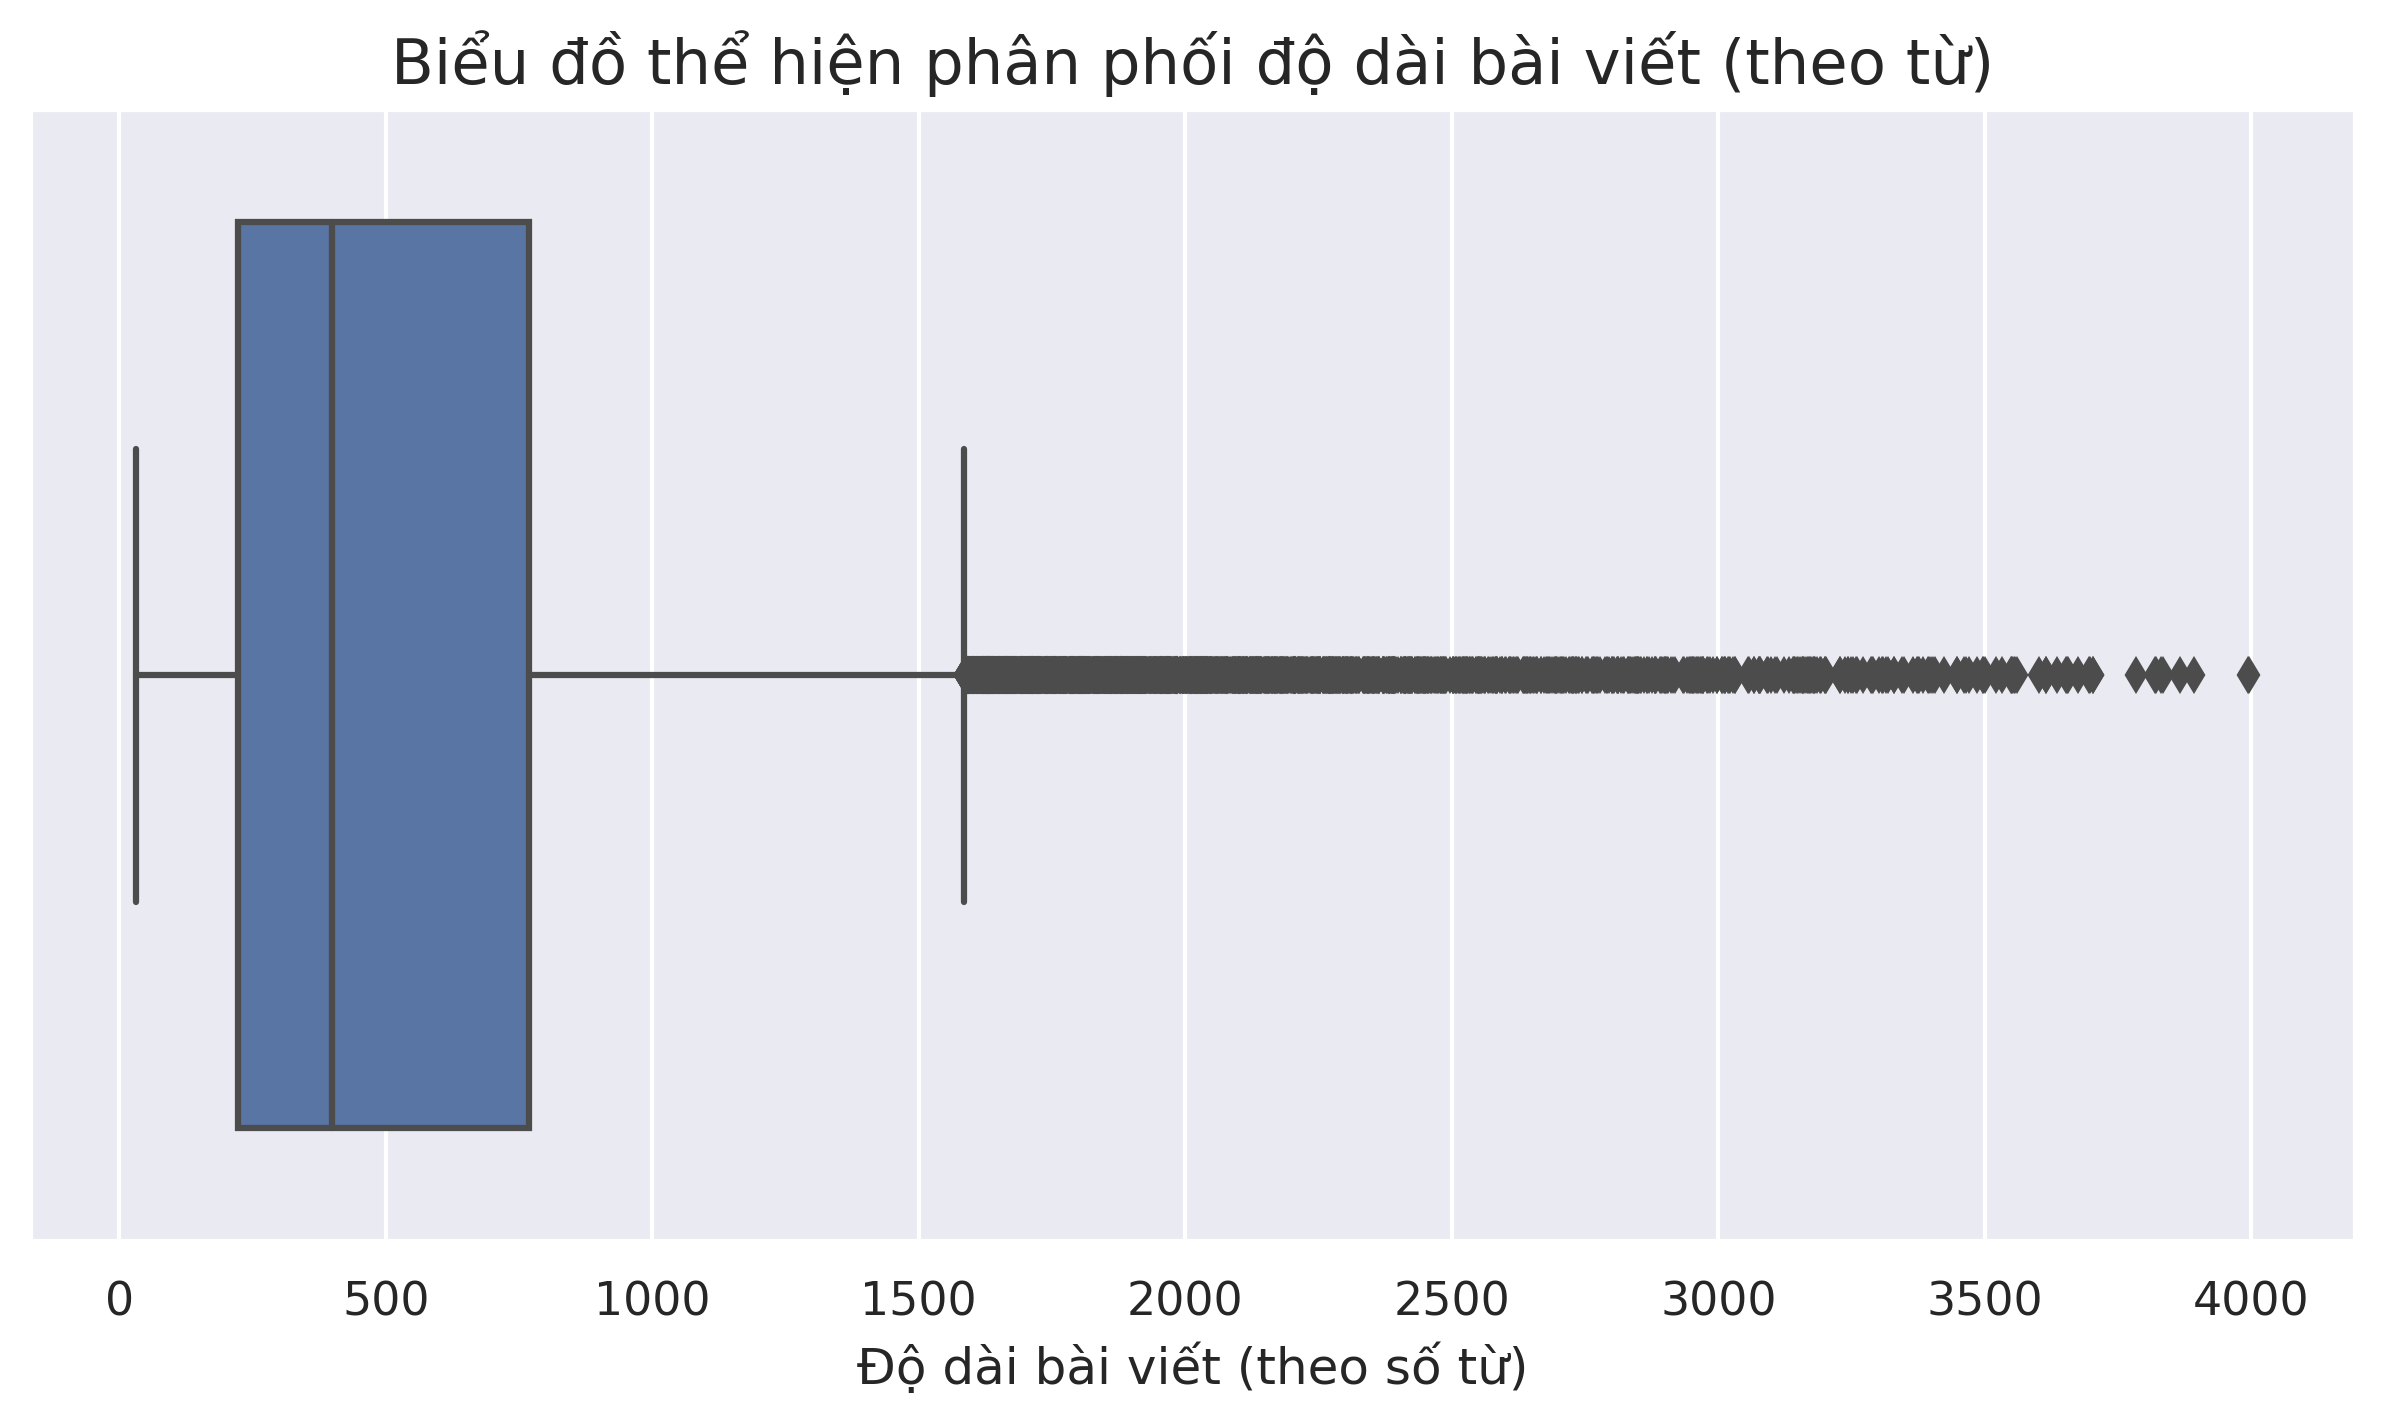

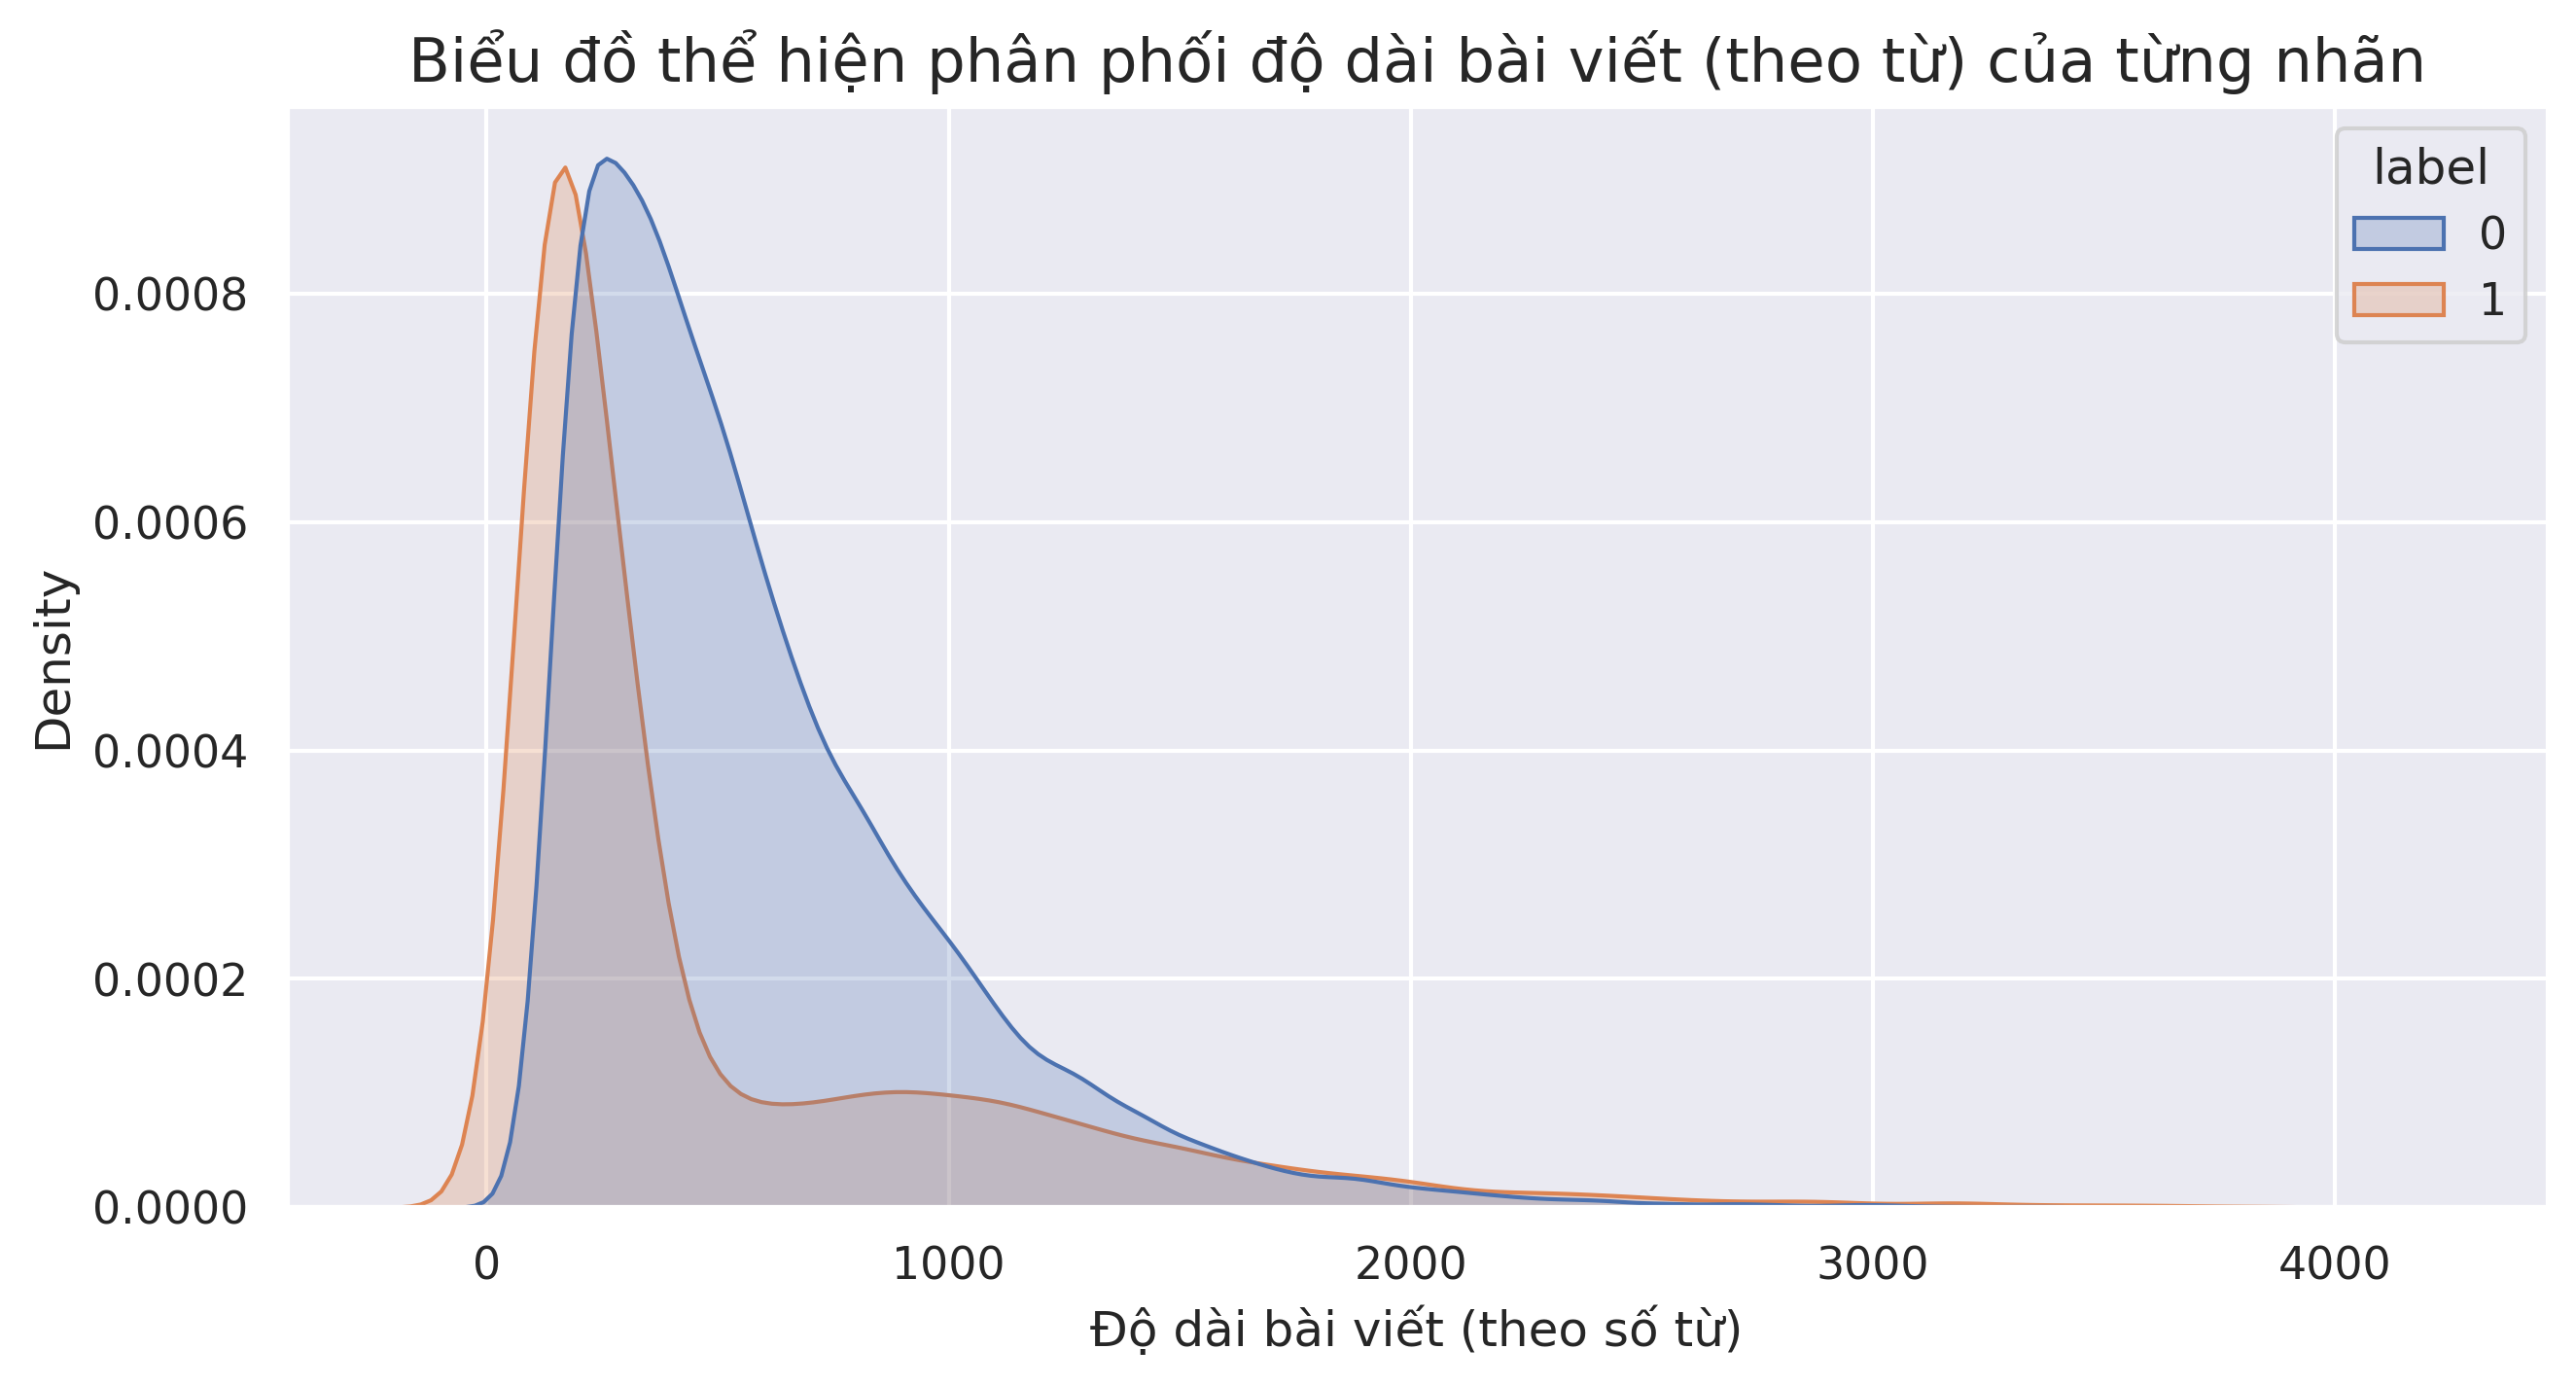

400.0
223.0
768.0


In [ ]:
sns.kdeplot(df['word_length'])
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo từ)', fontsize = 15)
plt.xlabel('Độ dài bài viết (theo số từ)')
plt.show()

sns.boxplot(df['word_length'])
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo từ)', fontsize = 15)
plt.xlabel('Độ dài bài viết (theo số từ)')
plt.show()

sns.kdeplot(df['word_length'], fill = True, hue = df['label'])
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo từ) của từng nhãn', fontsize = 15)
plt.xlabel('Độ dài bài viết (theo số từ)')
plt.show()

print(df['word_length'].median())
print(df['word_length'].quantile(0.25))
print(df['word_length'].quantile(0.75))

## Theo số câu

In [ ]:
df['sen_length'] = df['content'].apply(lambda x: len(re.split('[.|?|;|!|\n]', x)))

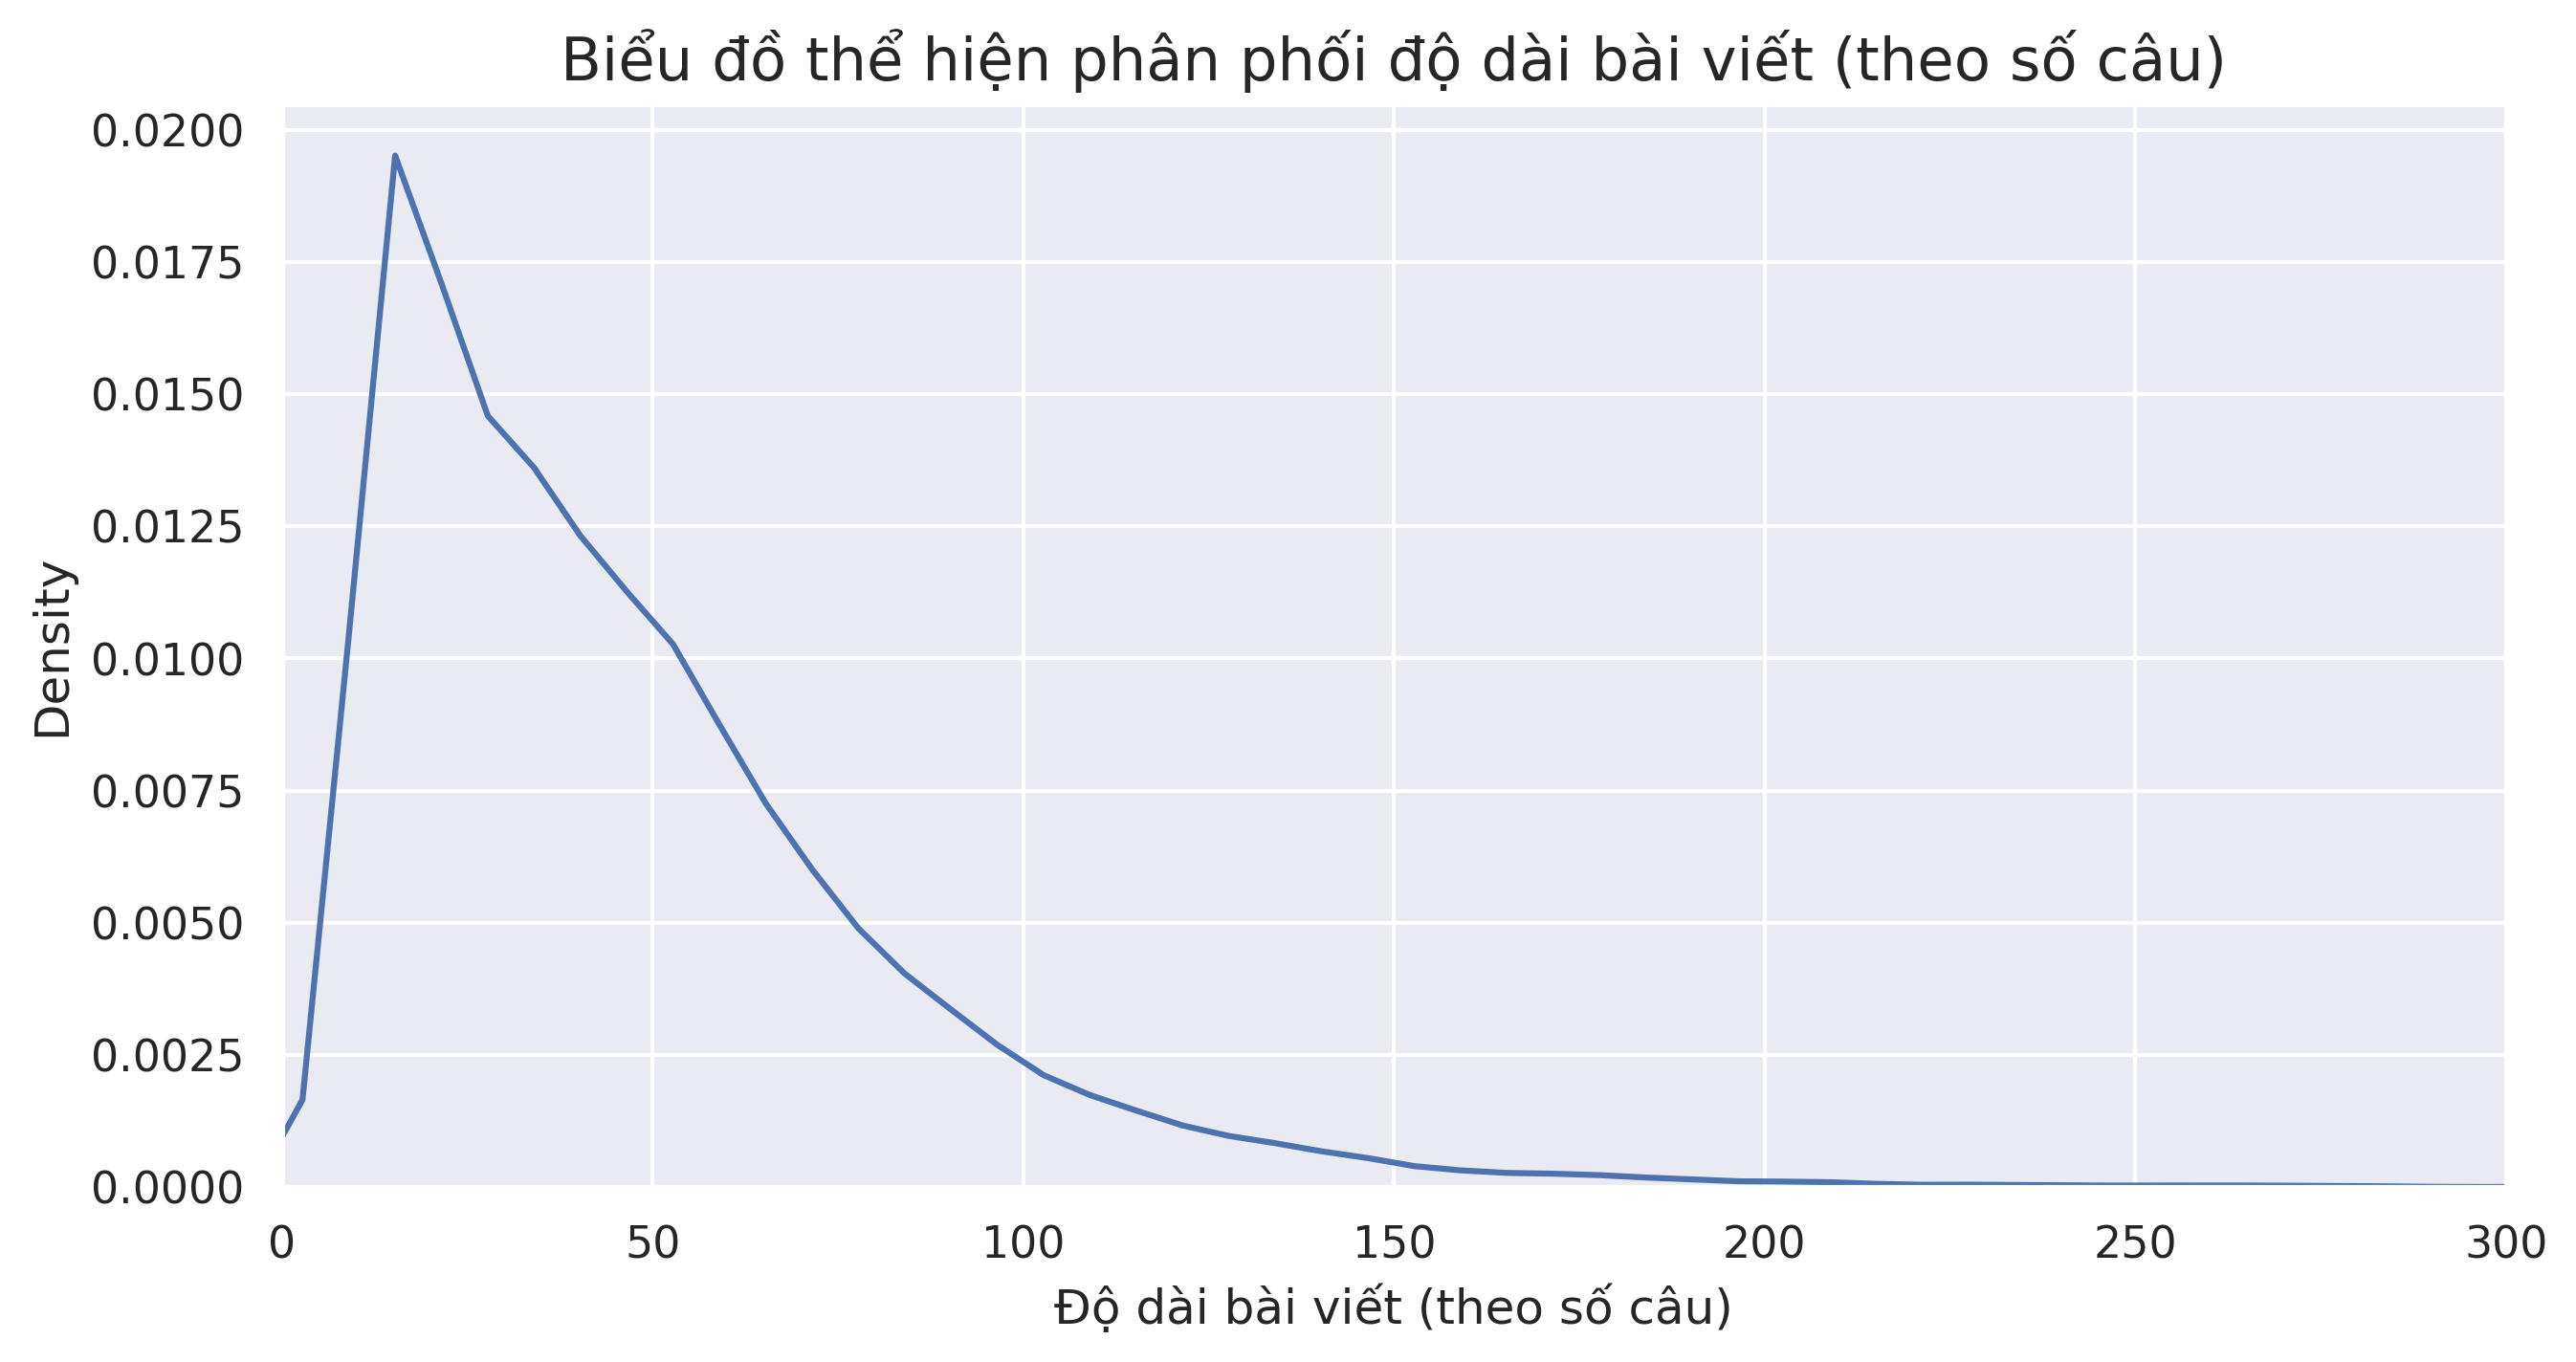

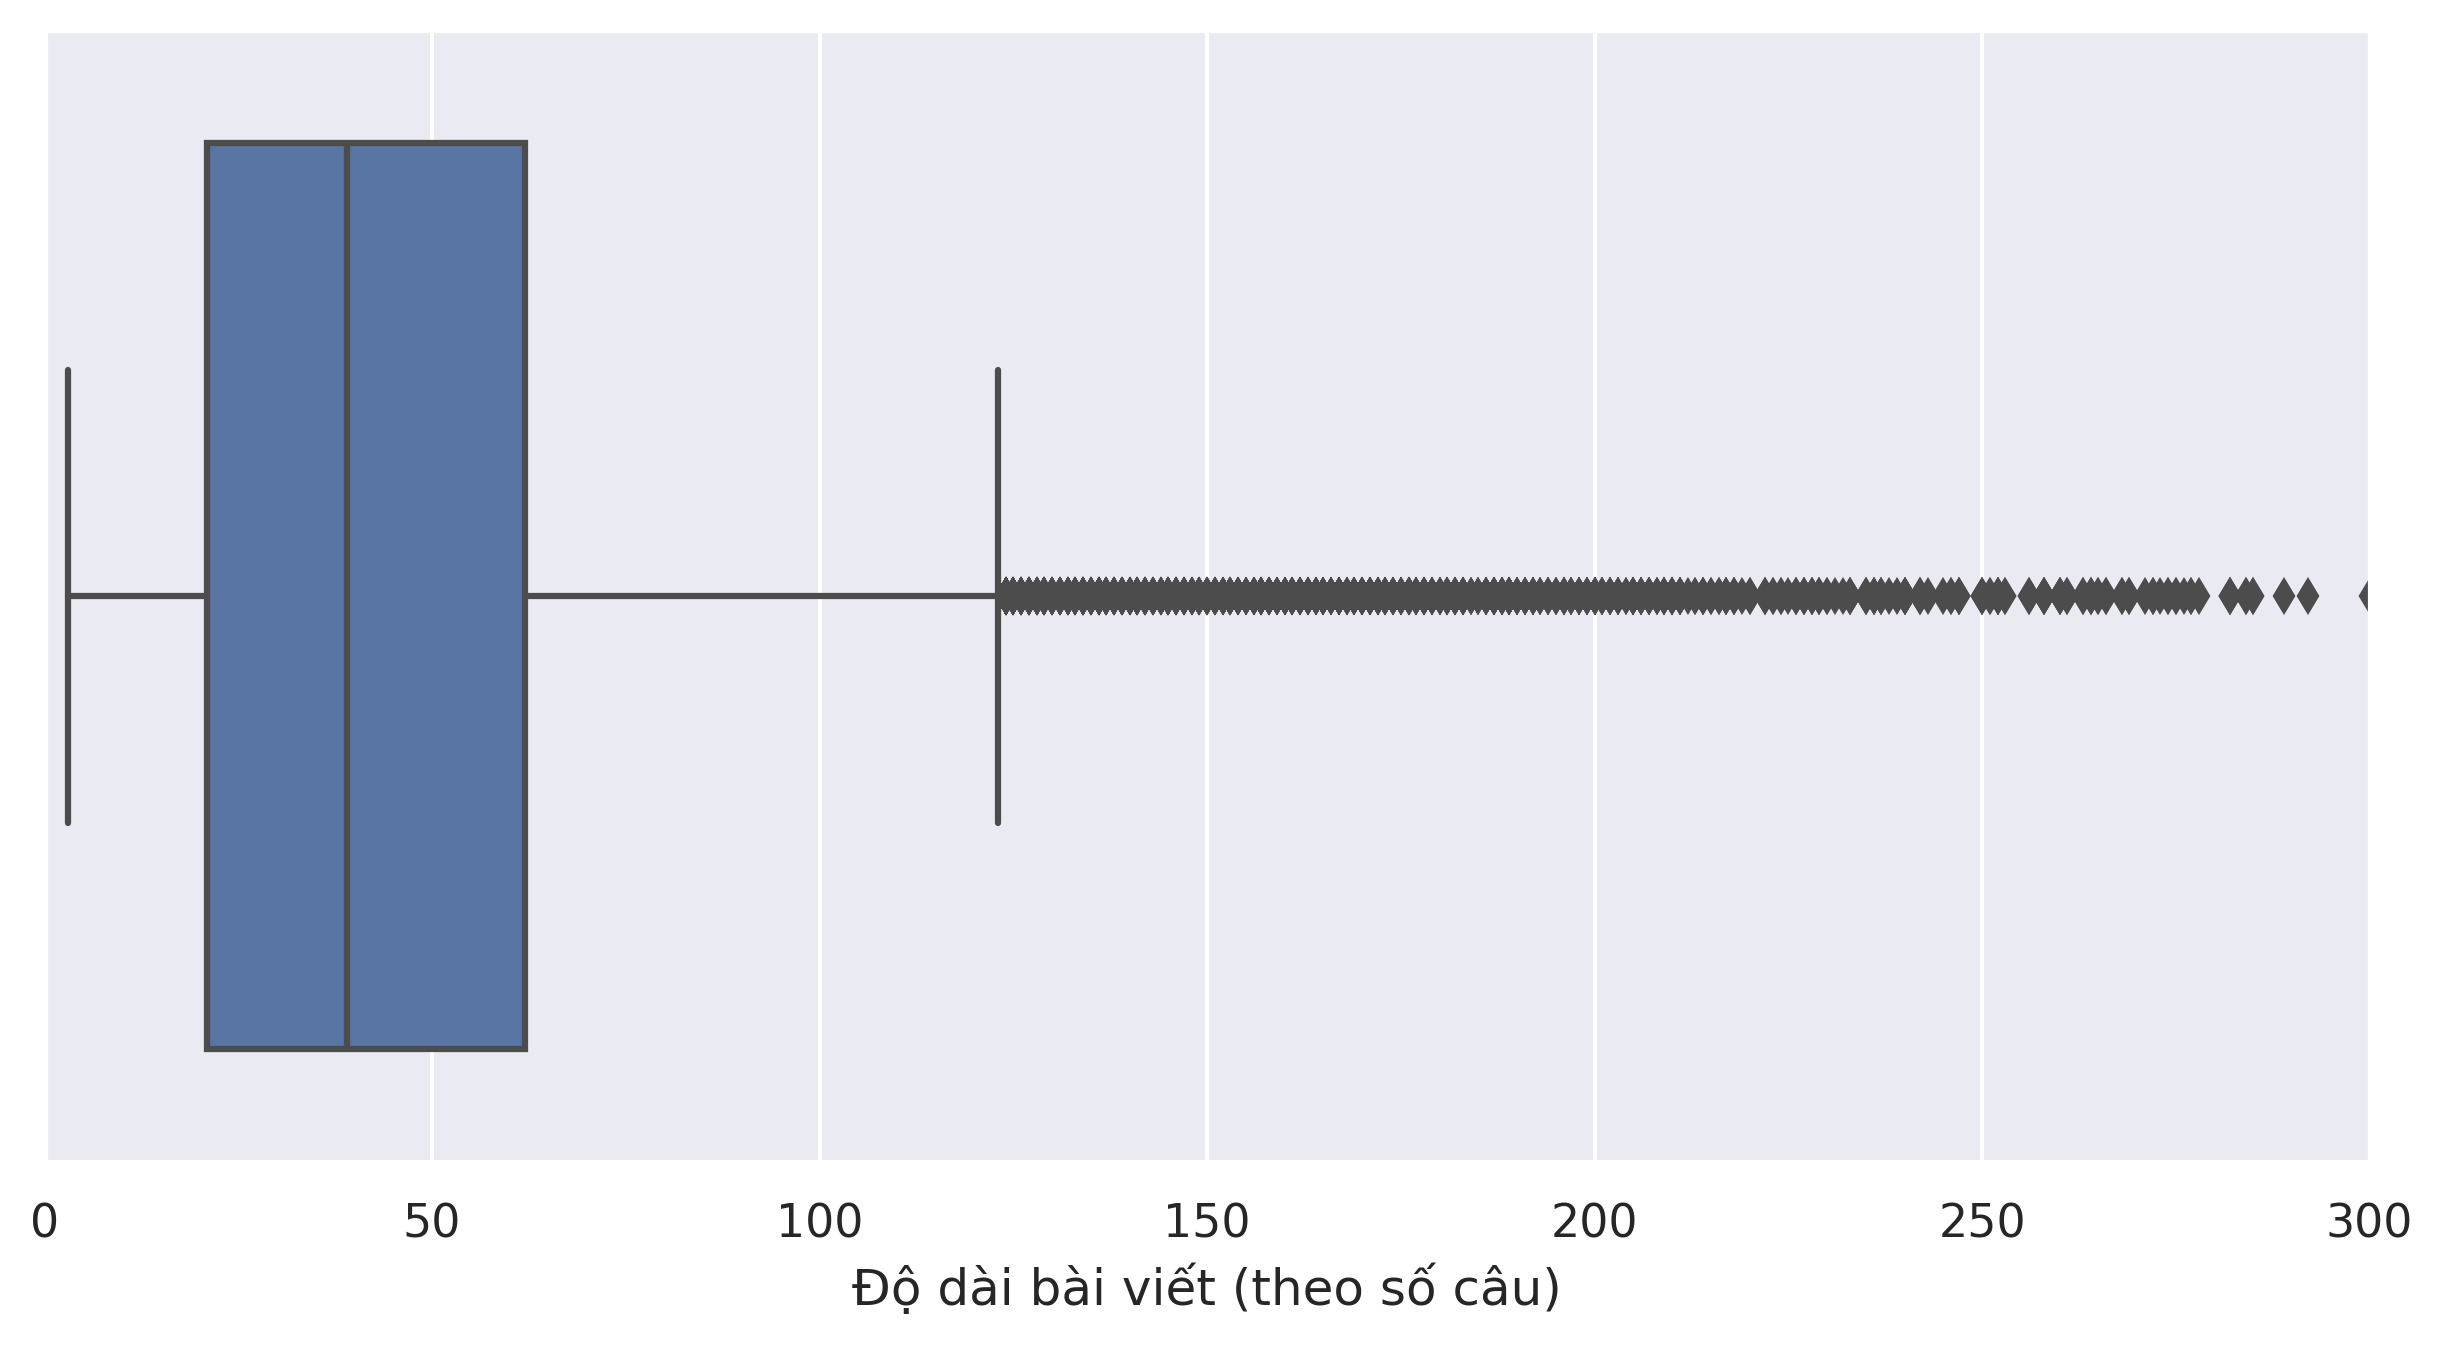

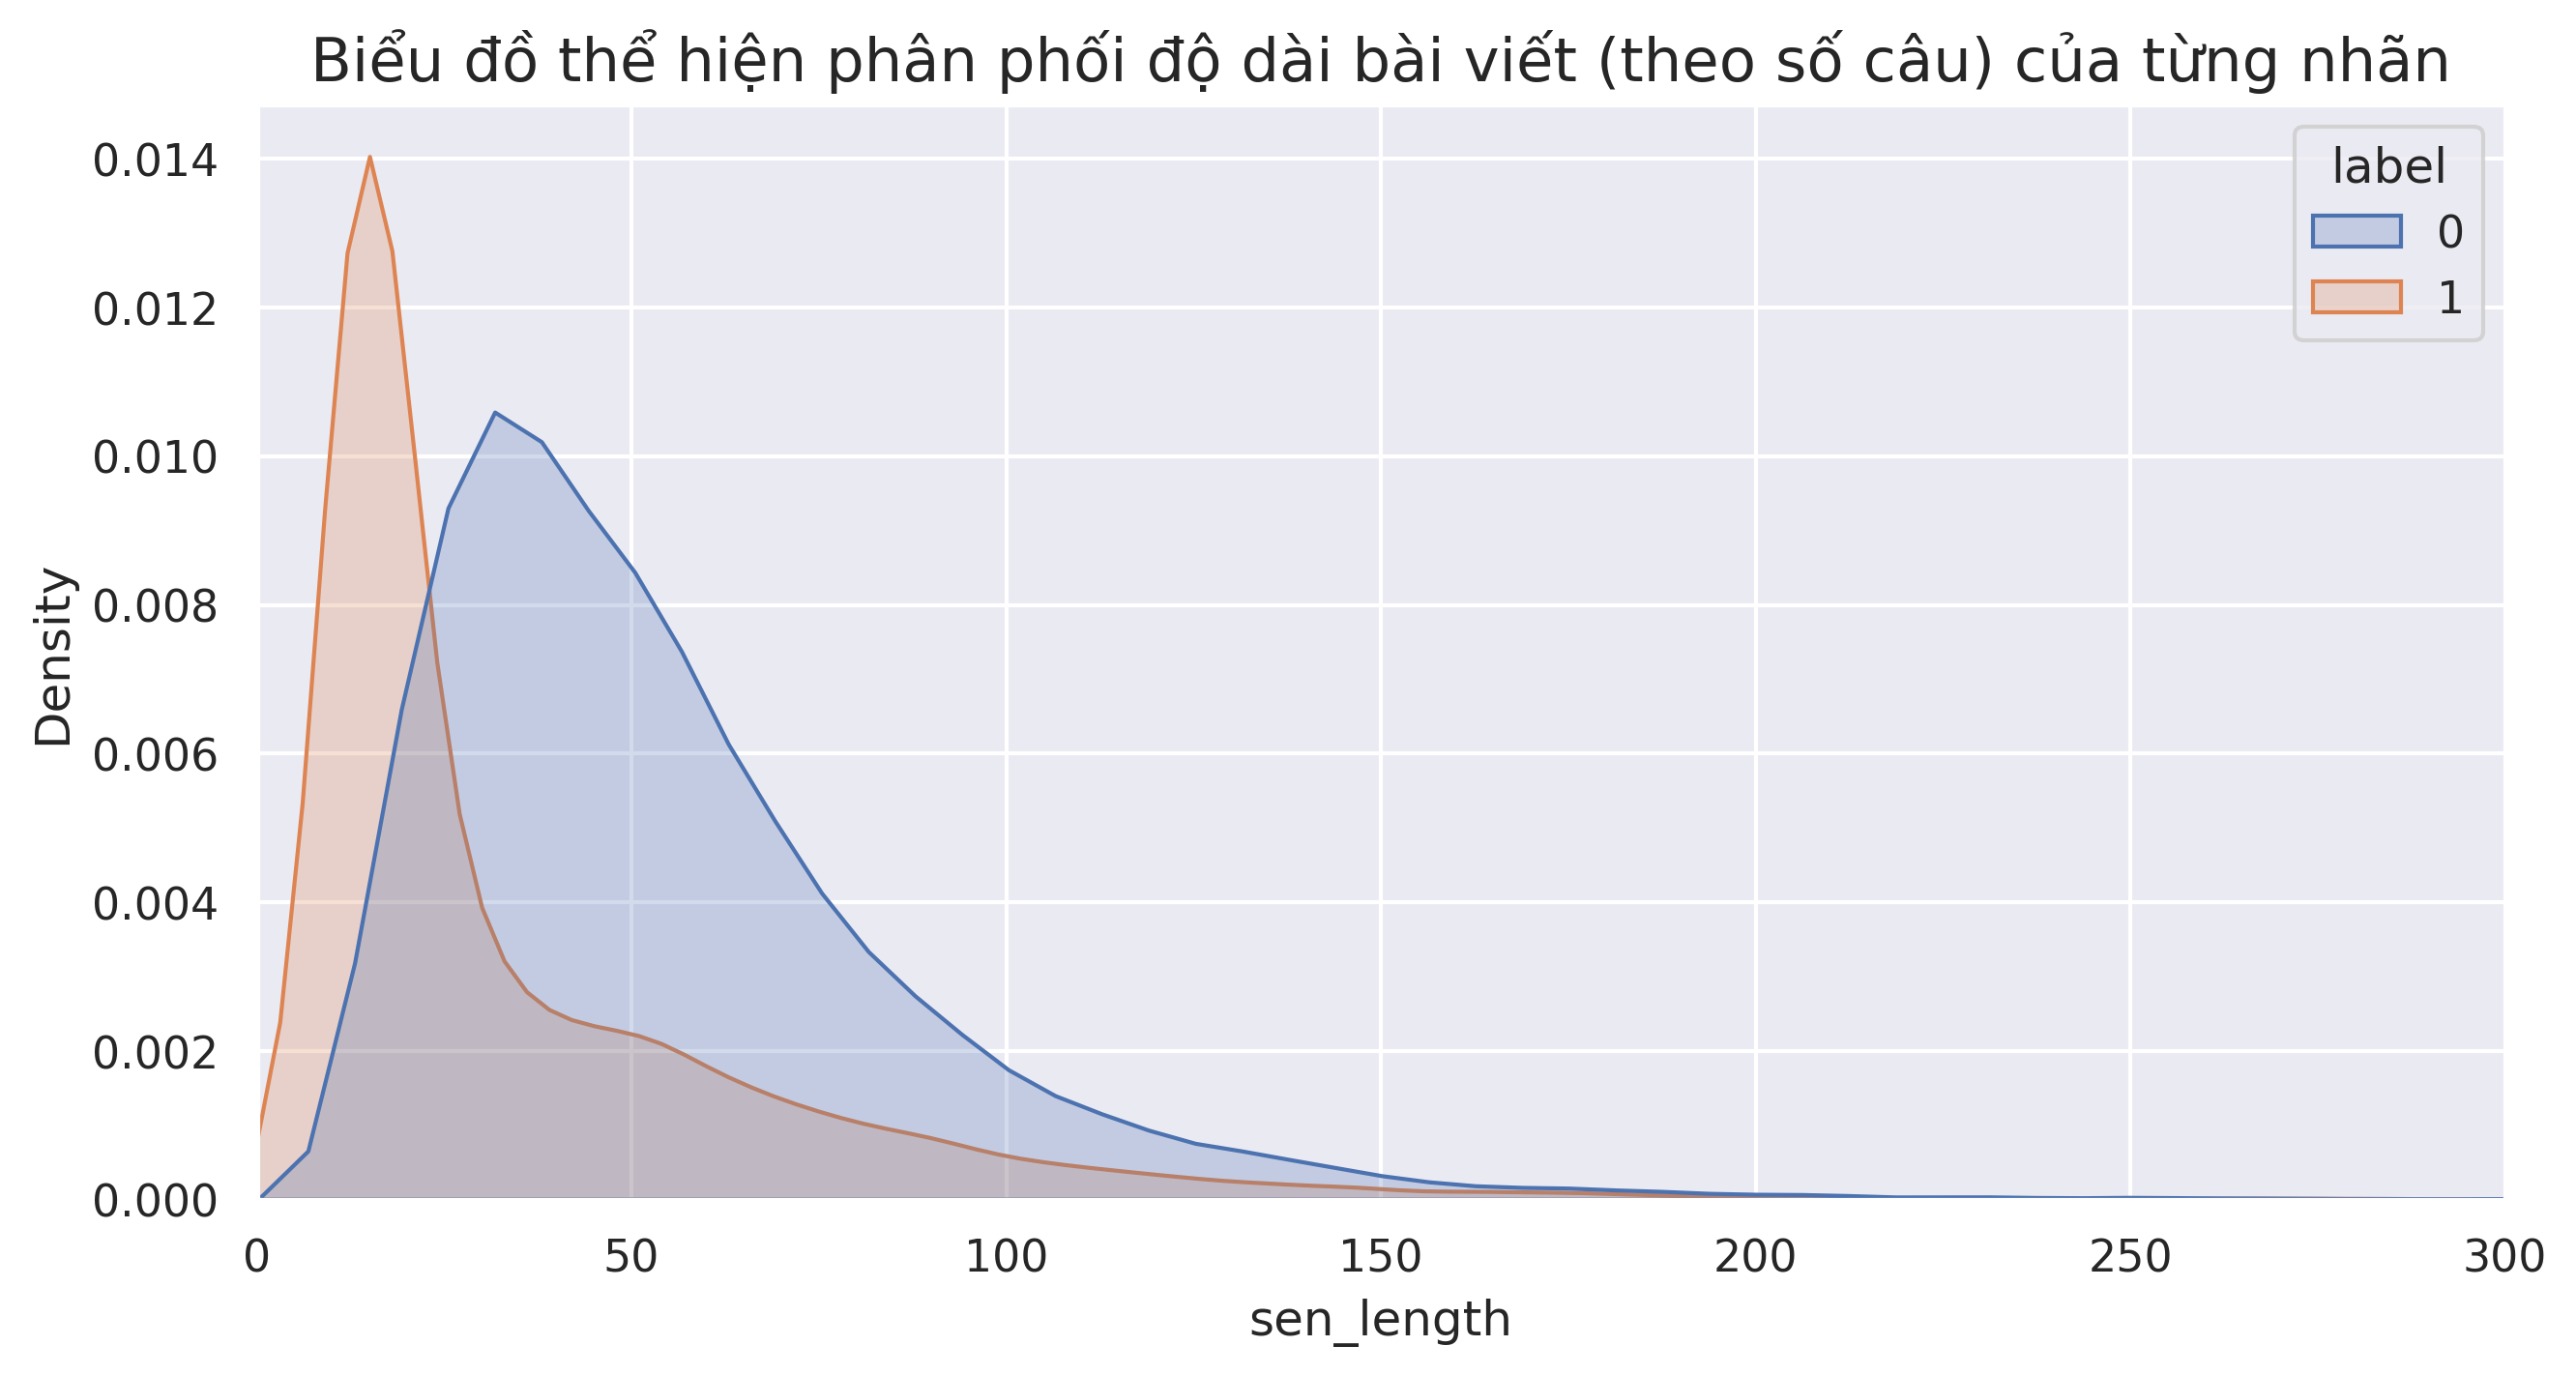

39.0
21.0
62.0


In [ ]:
sns.kdeplot(df['sen_length'])
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo số câu)', fontsize = 15)
plt.xlim(0, 300)
plt.xlabel('Độ dài bài viết (theo số câu)')
plt.show()

sns.boxplot(data = df, x = 'sen_length')
plt.xlabel('Độ dài bài viết (theo số câu)')
plt.xlim(0, 300)
plt.show()

sns.kdeplot(df['sen_length'], fill = True, hue = df['label'])
plt.xlim(0, 300)
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo số câu) của từng nhãn', fontsize = 15)
plt.show()

print(df['sen_length'].median())
print(df['sen_length'].quantile(0.25))
print(df['sen_length'].quantile(0.75))


## Theo tiếng

In [ ]:
df['syl_sep'] = df['content'].str.replace('.', '')
df['syl_sep'] = df['syl_sep'].str.replace('?', '')
df['syl_sep'] = df['syl_sep'].str.replace('!', '')
df['syl_sep'] = df['syl_sep'].str.replace(';', '')
df['syl_sep'] = df['syl_sep'].str.replace('\n', '')
df['syl_sep'] = df['syl_sep'].str.split(' ')

df['syl_length'] = df['syl_sep'].apply(len)

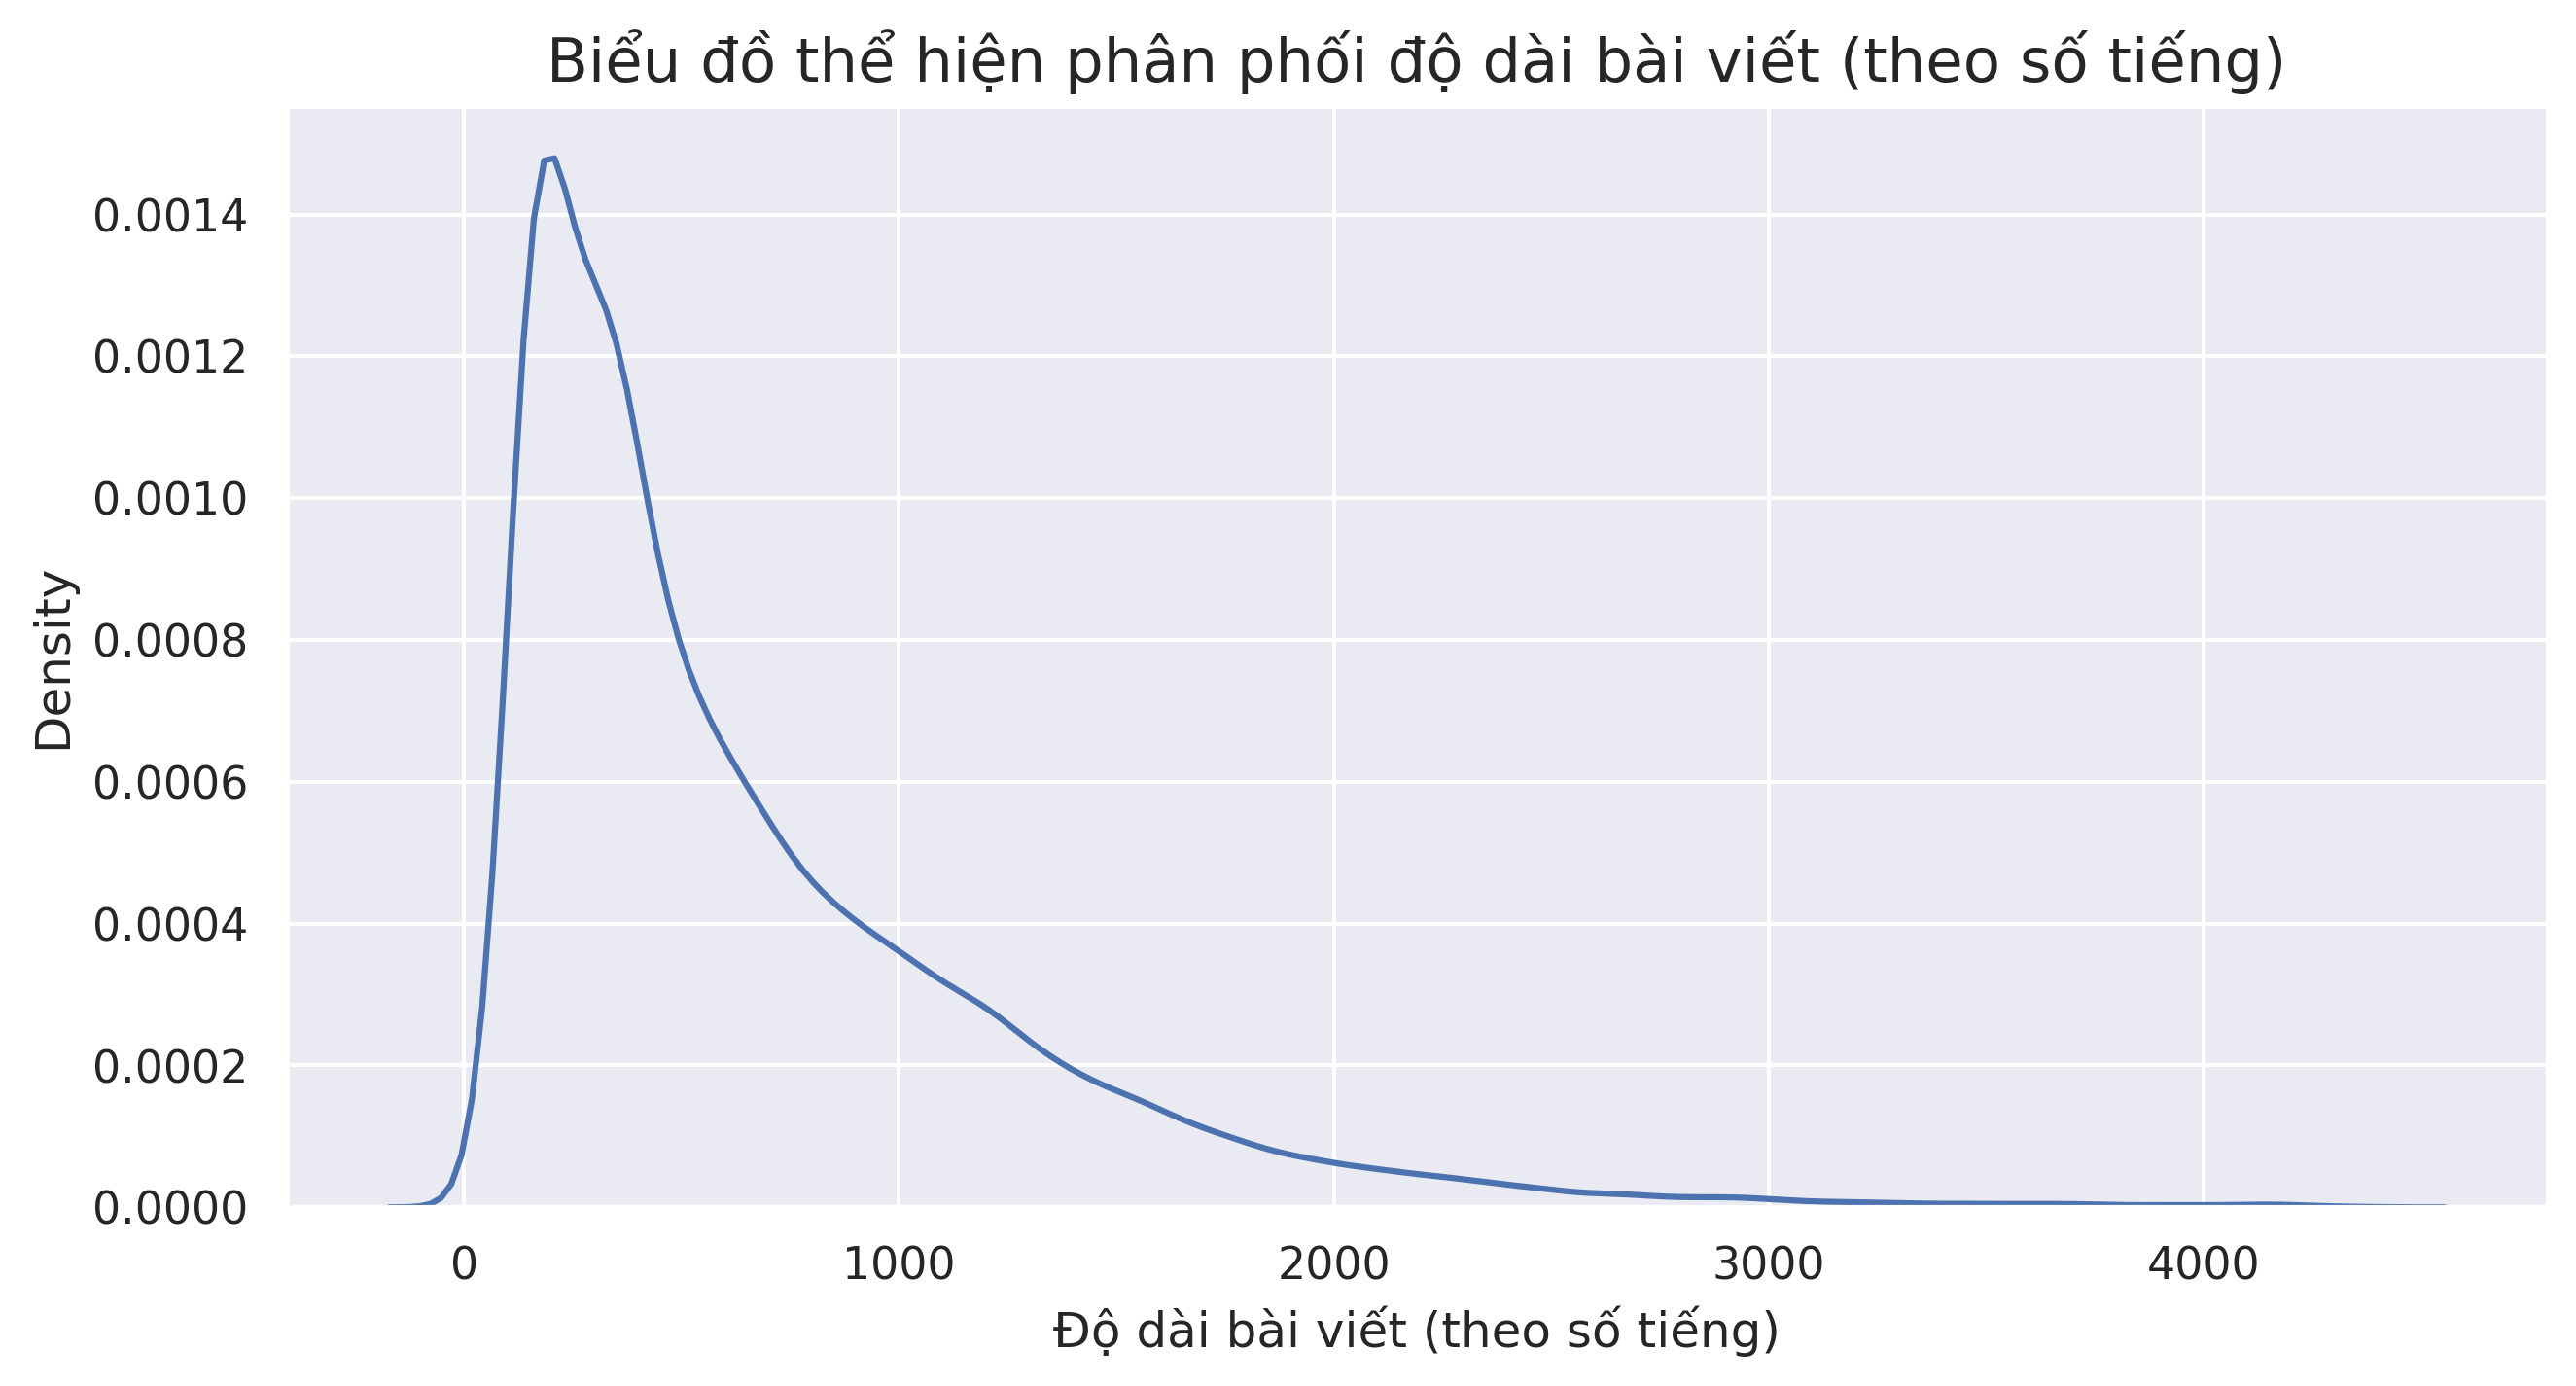

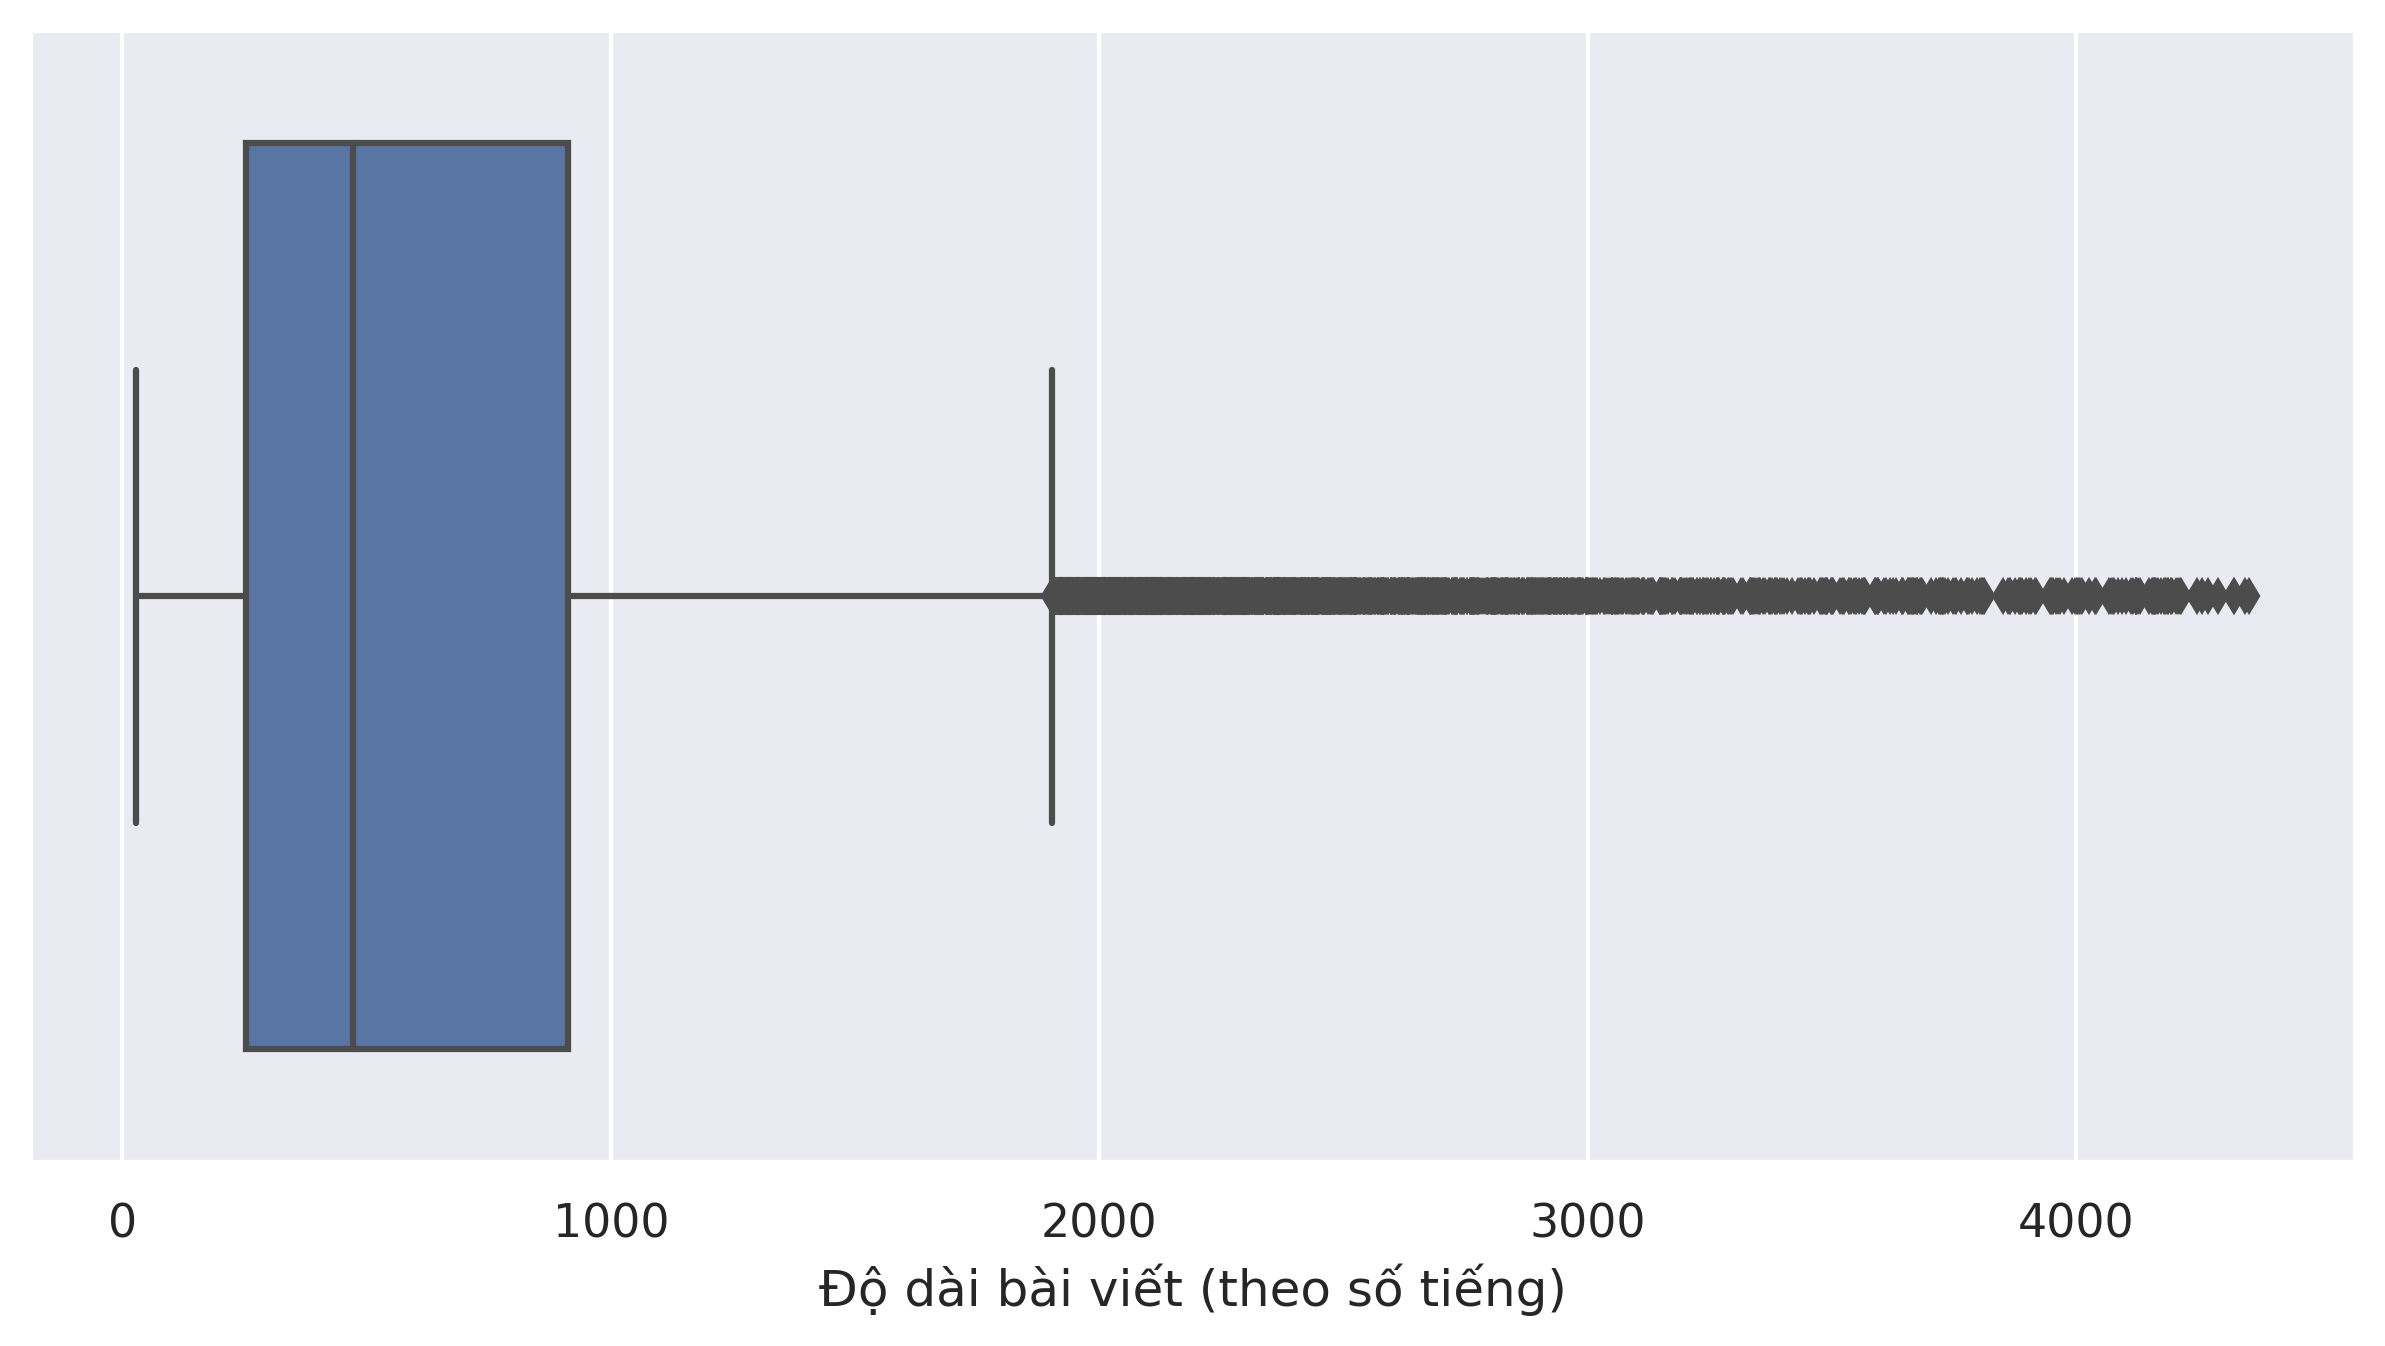

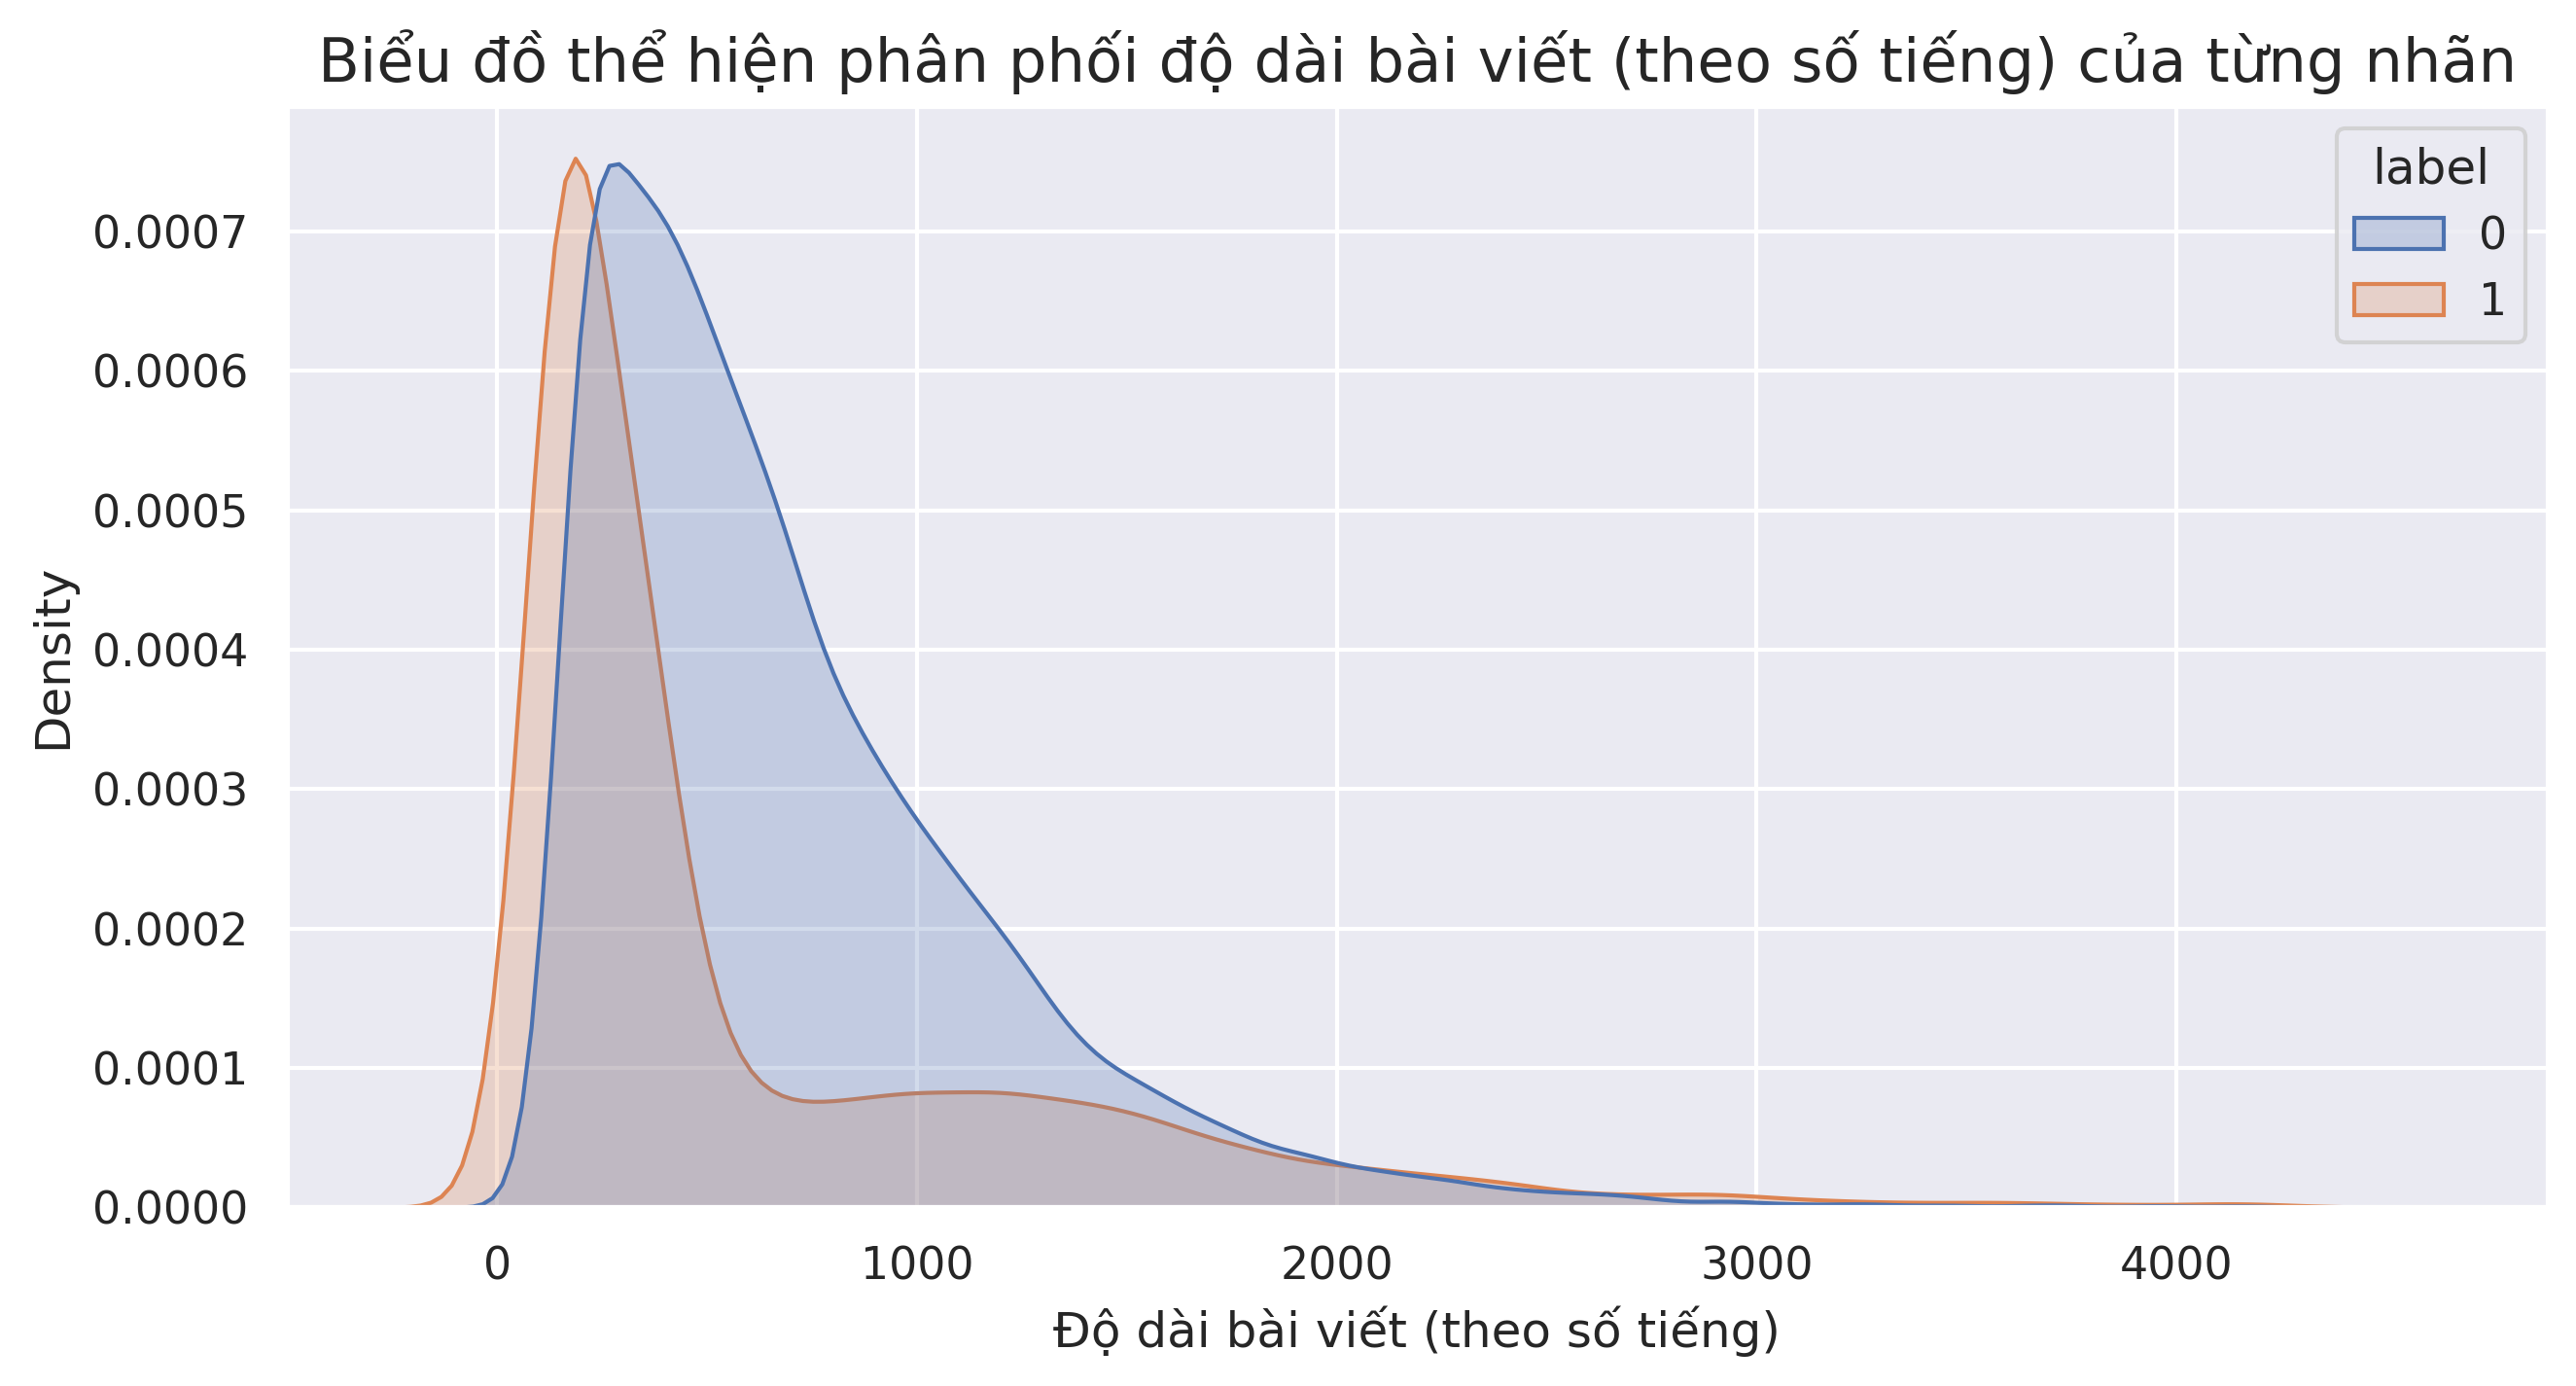

471.0
253.0
913.0


In [ ]:
sns.kdeplot(df['syl_length'])
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo số tiếng)', fontsize = 15)
plt.xlabel('Độ dài bài viết (theo số tiếng)')
plt.show()

sns.boxplot(data = df, x = 'syl_length')
plt.xlabel('Độ dài bài viết (theo số tiếng)')
plt.show()

sns.kdeplot(df['syl_length'], fill = True, hue = df['label'])
plt.xlabel('Độ dài bài viết (theo số tiếng)')
plt.title('Biểu đồ thể hiện phân phối độ dài bài viết (theo số tiếng) của từng nhãn', fontsize = 15)
plt.show()

print(df['syl_length'].median())
print(df['syl_length'].quantile(0.25))
print(df['syl_length'].quantile(0.75))

# Tổng số câu, từ, tiếng

In [ ]:
stopwords = set(line.strip() for line in open('resources/stopwords.txt'))

In [ ]:
df['word_sep']
df['syl_sep']

0        [THẦY, GIÁO, THỂ, HIỆN, VĂN, HÓA, ĐẢNGKhoảng, ...
1        [Nguyễn, Đình, Cống3, giờ, ·THƯ, TRẢ, LỜI, CỦA...
2        [Kế, hoạchÔNG, BIẾT, Ngân, hàngỤC, SAO, CÒN, T...
3        [TUOITREViệt, NamHàng, ngàn, người, tiễn, biệt...
4        [Lý, thuyết, cai, trị, dân, bằng, bạo, lực, "c...
                               ...                        
10178    [Acecook, phát, triển, bền, vững, bằng, triết,...
10179    [Vietnam, Airlines, xin, Chính, phủ, hỗ, trợ, ...
10180    [Bộ, Công, an, phản, đối, chuyển, condotel,, o...
10181    [Tỷ, phú, pin, nắm, giữ, tương, lai, Tesla, tạ...
10182    [Lãi, tiết, kiệm, kỳ, hạn, một, tháng, còn, 3%...
Name: syl_sep, Length: 49517, dtype: object

In [ ]:
vocab = {}
vocab_nstopwords = {}
for x in df['word_sep']:
    for word in x:
        if len(word) > 0 and word != ':' and word != '-' and not word.isdigit():
            word = word.replace('_', ' ')
            if word not in vocab:
                vocab[word] = 1
                if word not in stopwords:
                    vocab_nstopwords[word] = 1
            else:
                vocab[word] += 1
                if word not in stopwords:
                    vocab_nstopwords[word] += 1

In [ ]:
vocab_syl = {}
vocab_syl_nstopwords = {}

for x in df['syl_sep']:
    for word in x:
        if len(word) > 0 and word != ':' and word != '-' and not word.isdigit():
            word = word.replace('_', ' ')
            word = word.lower()
            if word not in vocab_syl:
                vocab_syl[word] = 1
                if word not in stopwords:
                    vocab_syl_nstopwords[word] = 1
            else:
                vocab_syl[word] += 1
                if word not in stopwords:
                    vocab_syl_nstopwords[word] += 1

In [ ]:
vocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse = True))
vocab_nstopwords = dict(sorted(vocab_nstopwords.items(), key=lambda item: item[1], reverse = True))
vocab_syl = dict(sorted(vocab_syl.items(), key=lambda item: item[1], reverse = True))
vocab_syl_nstopwords = dict(sorted(vocab_syl_nstopwords.items(), key=lambda item: item[1], reverse = True))

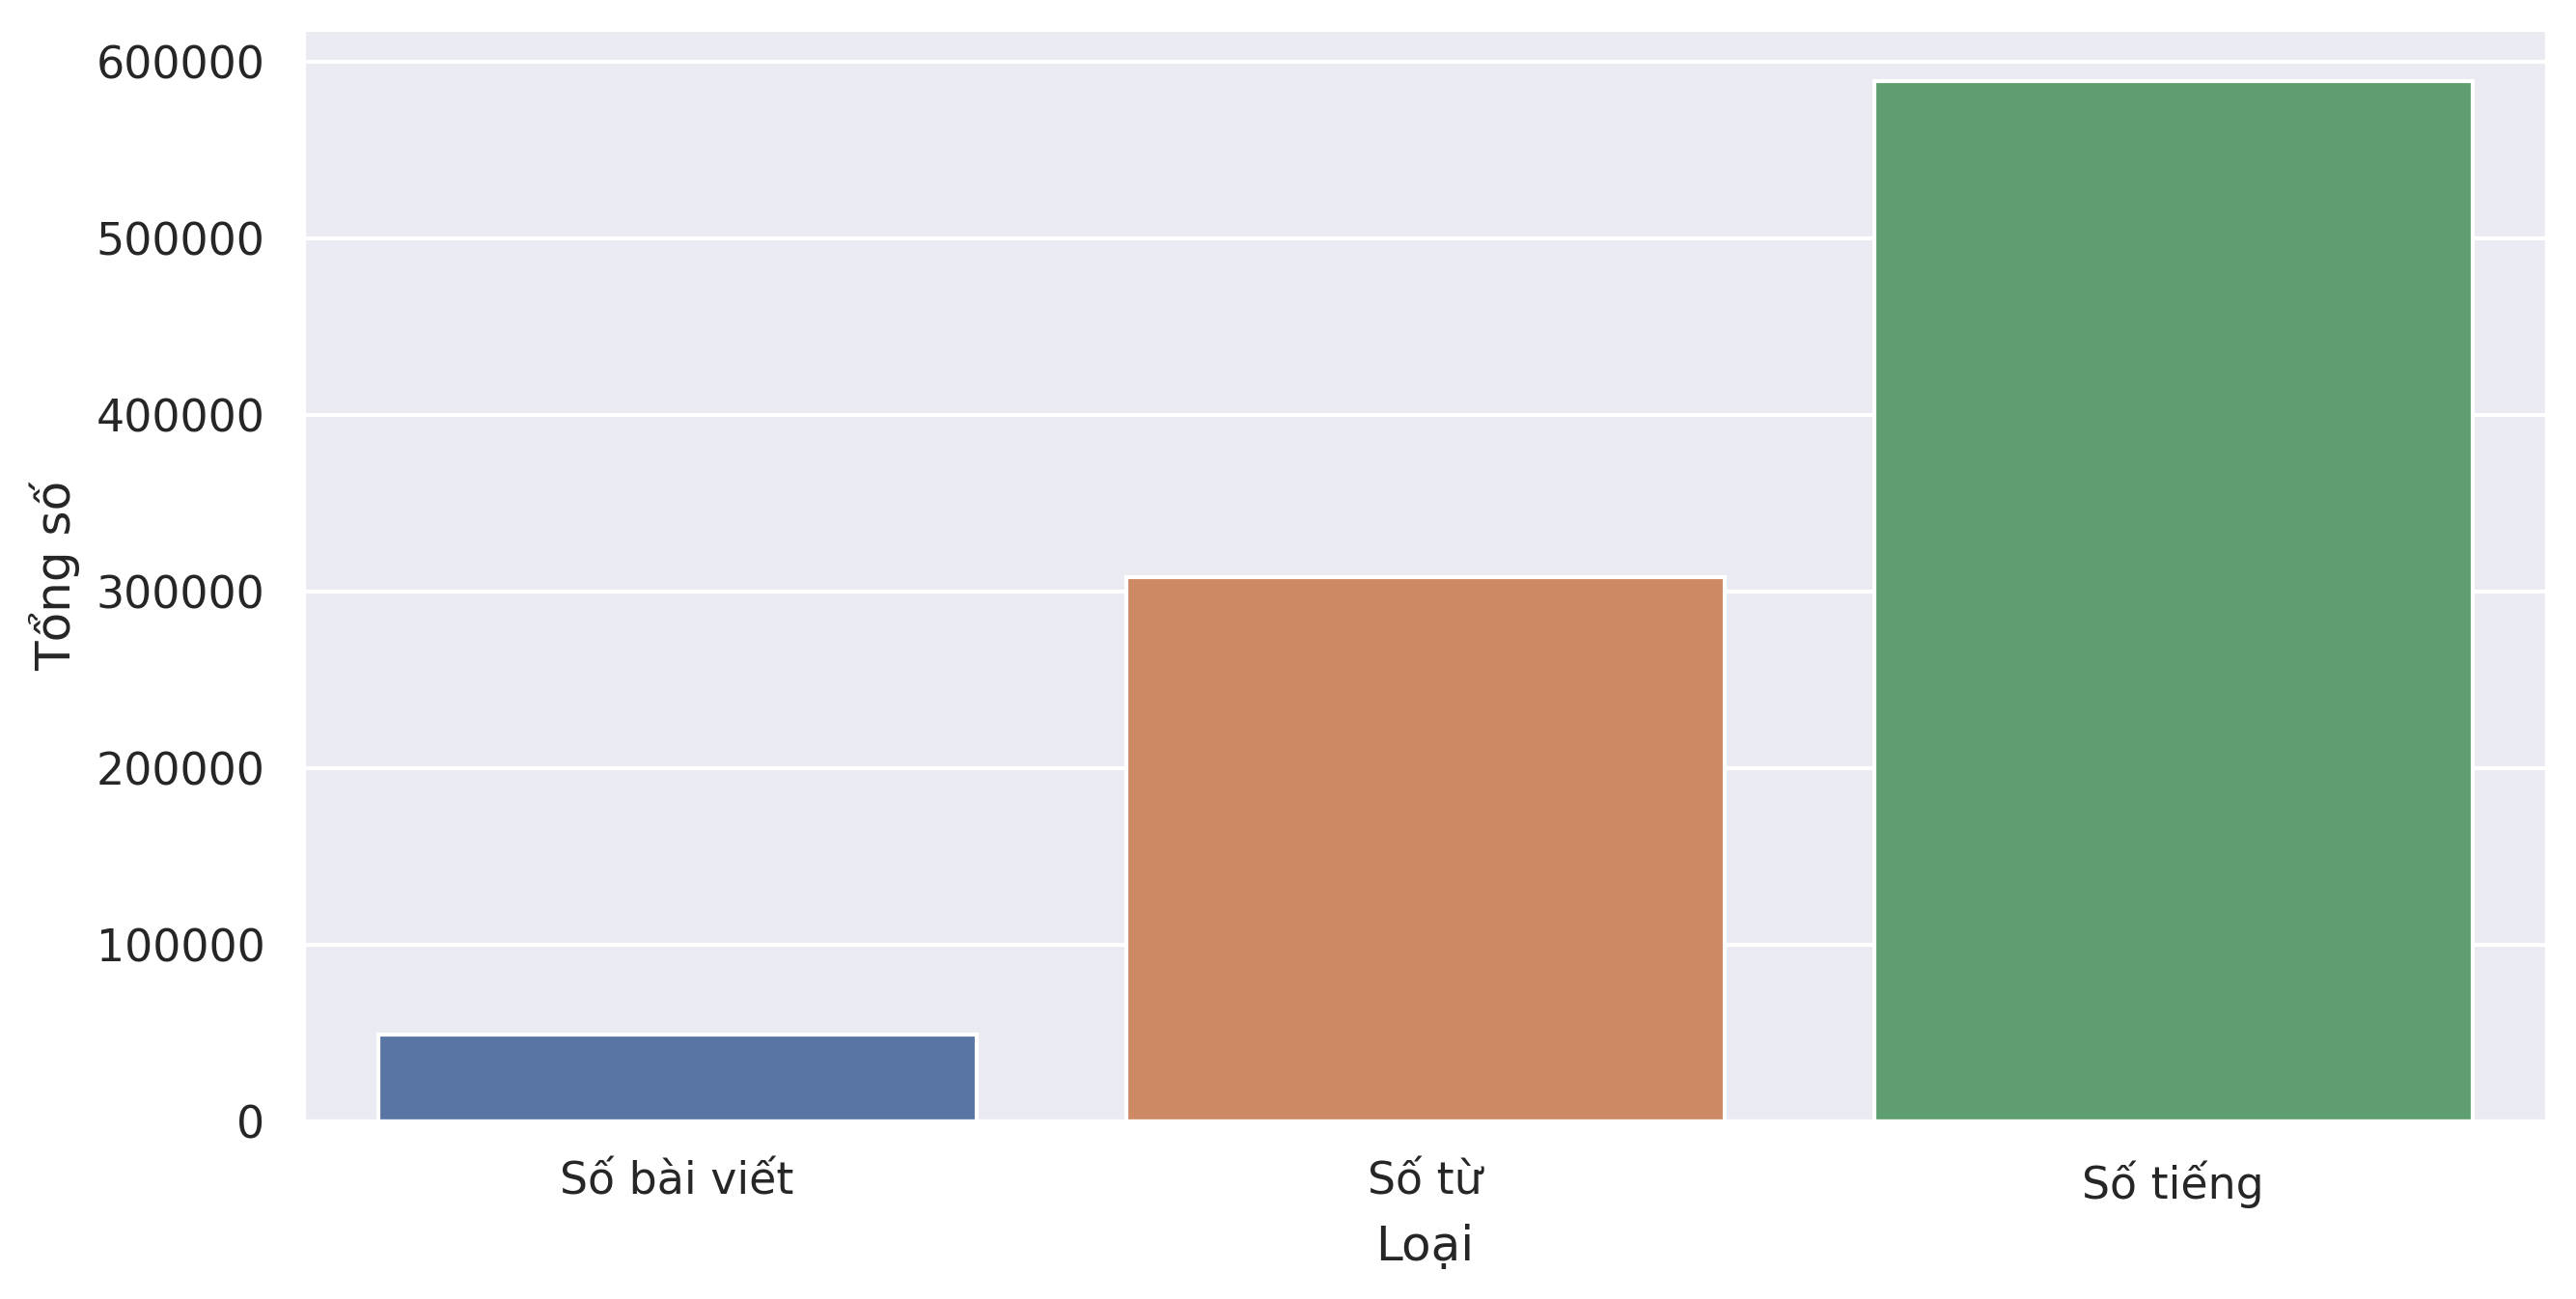

Số bài viết:  49517
Số câu:  2340869
Số từ:  307990
Số tiếng:  589102


In [ ]:
temp = {'Loại': ['Số bài viết', 'Số từ', 'Số tiếng'], 'Tổng số': [df.shape[0], len(vocab), len(vocab_syl)]}
temp = pd.DataFrame(temp)
sns.barplot(x = 'Loại', y = 'Tổng số', data = temp)
plt.show()

print("Số bài viết: ", df.shape[0])
print("Số câu: ", df['sen_length'].sum())
print("Số từ: ", len(vocab))
print("Số tiếng: ", len(vocab_syl))

# Số từ, tiếng cấu tạo nên 1 bài viết

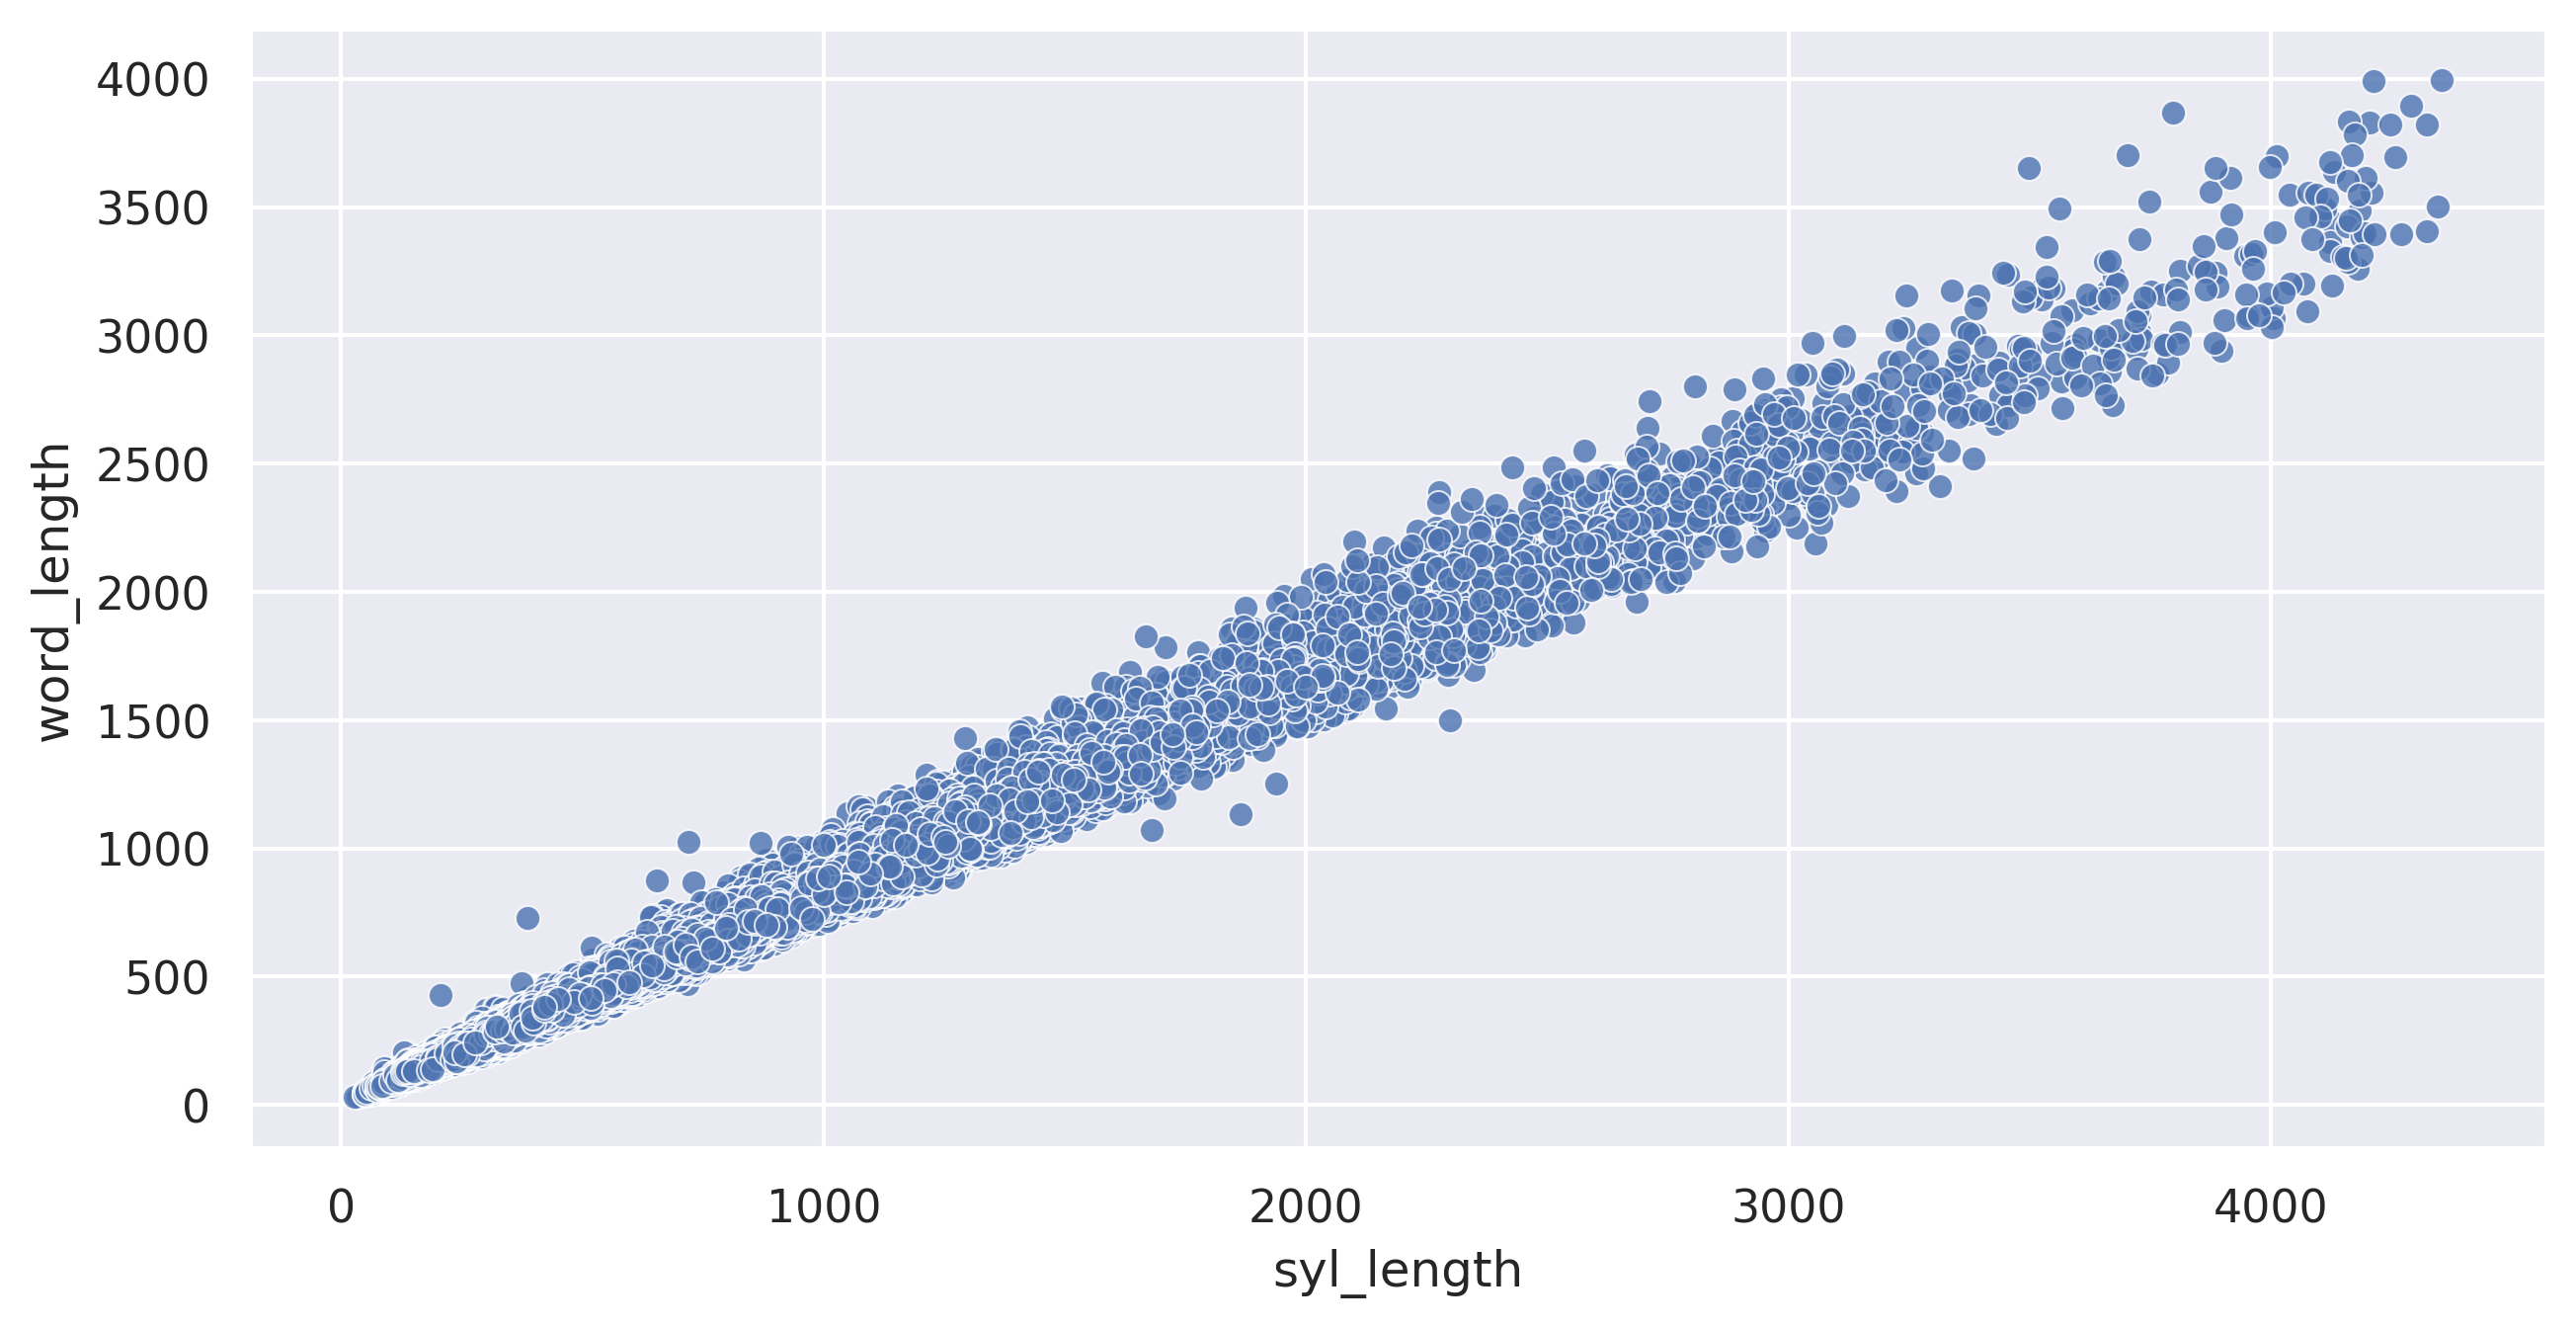

In [ ]:
sns.scatterplot(x = 'syl_length', y = 'word_length', data = df, alpha= .8)
plt.show()

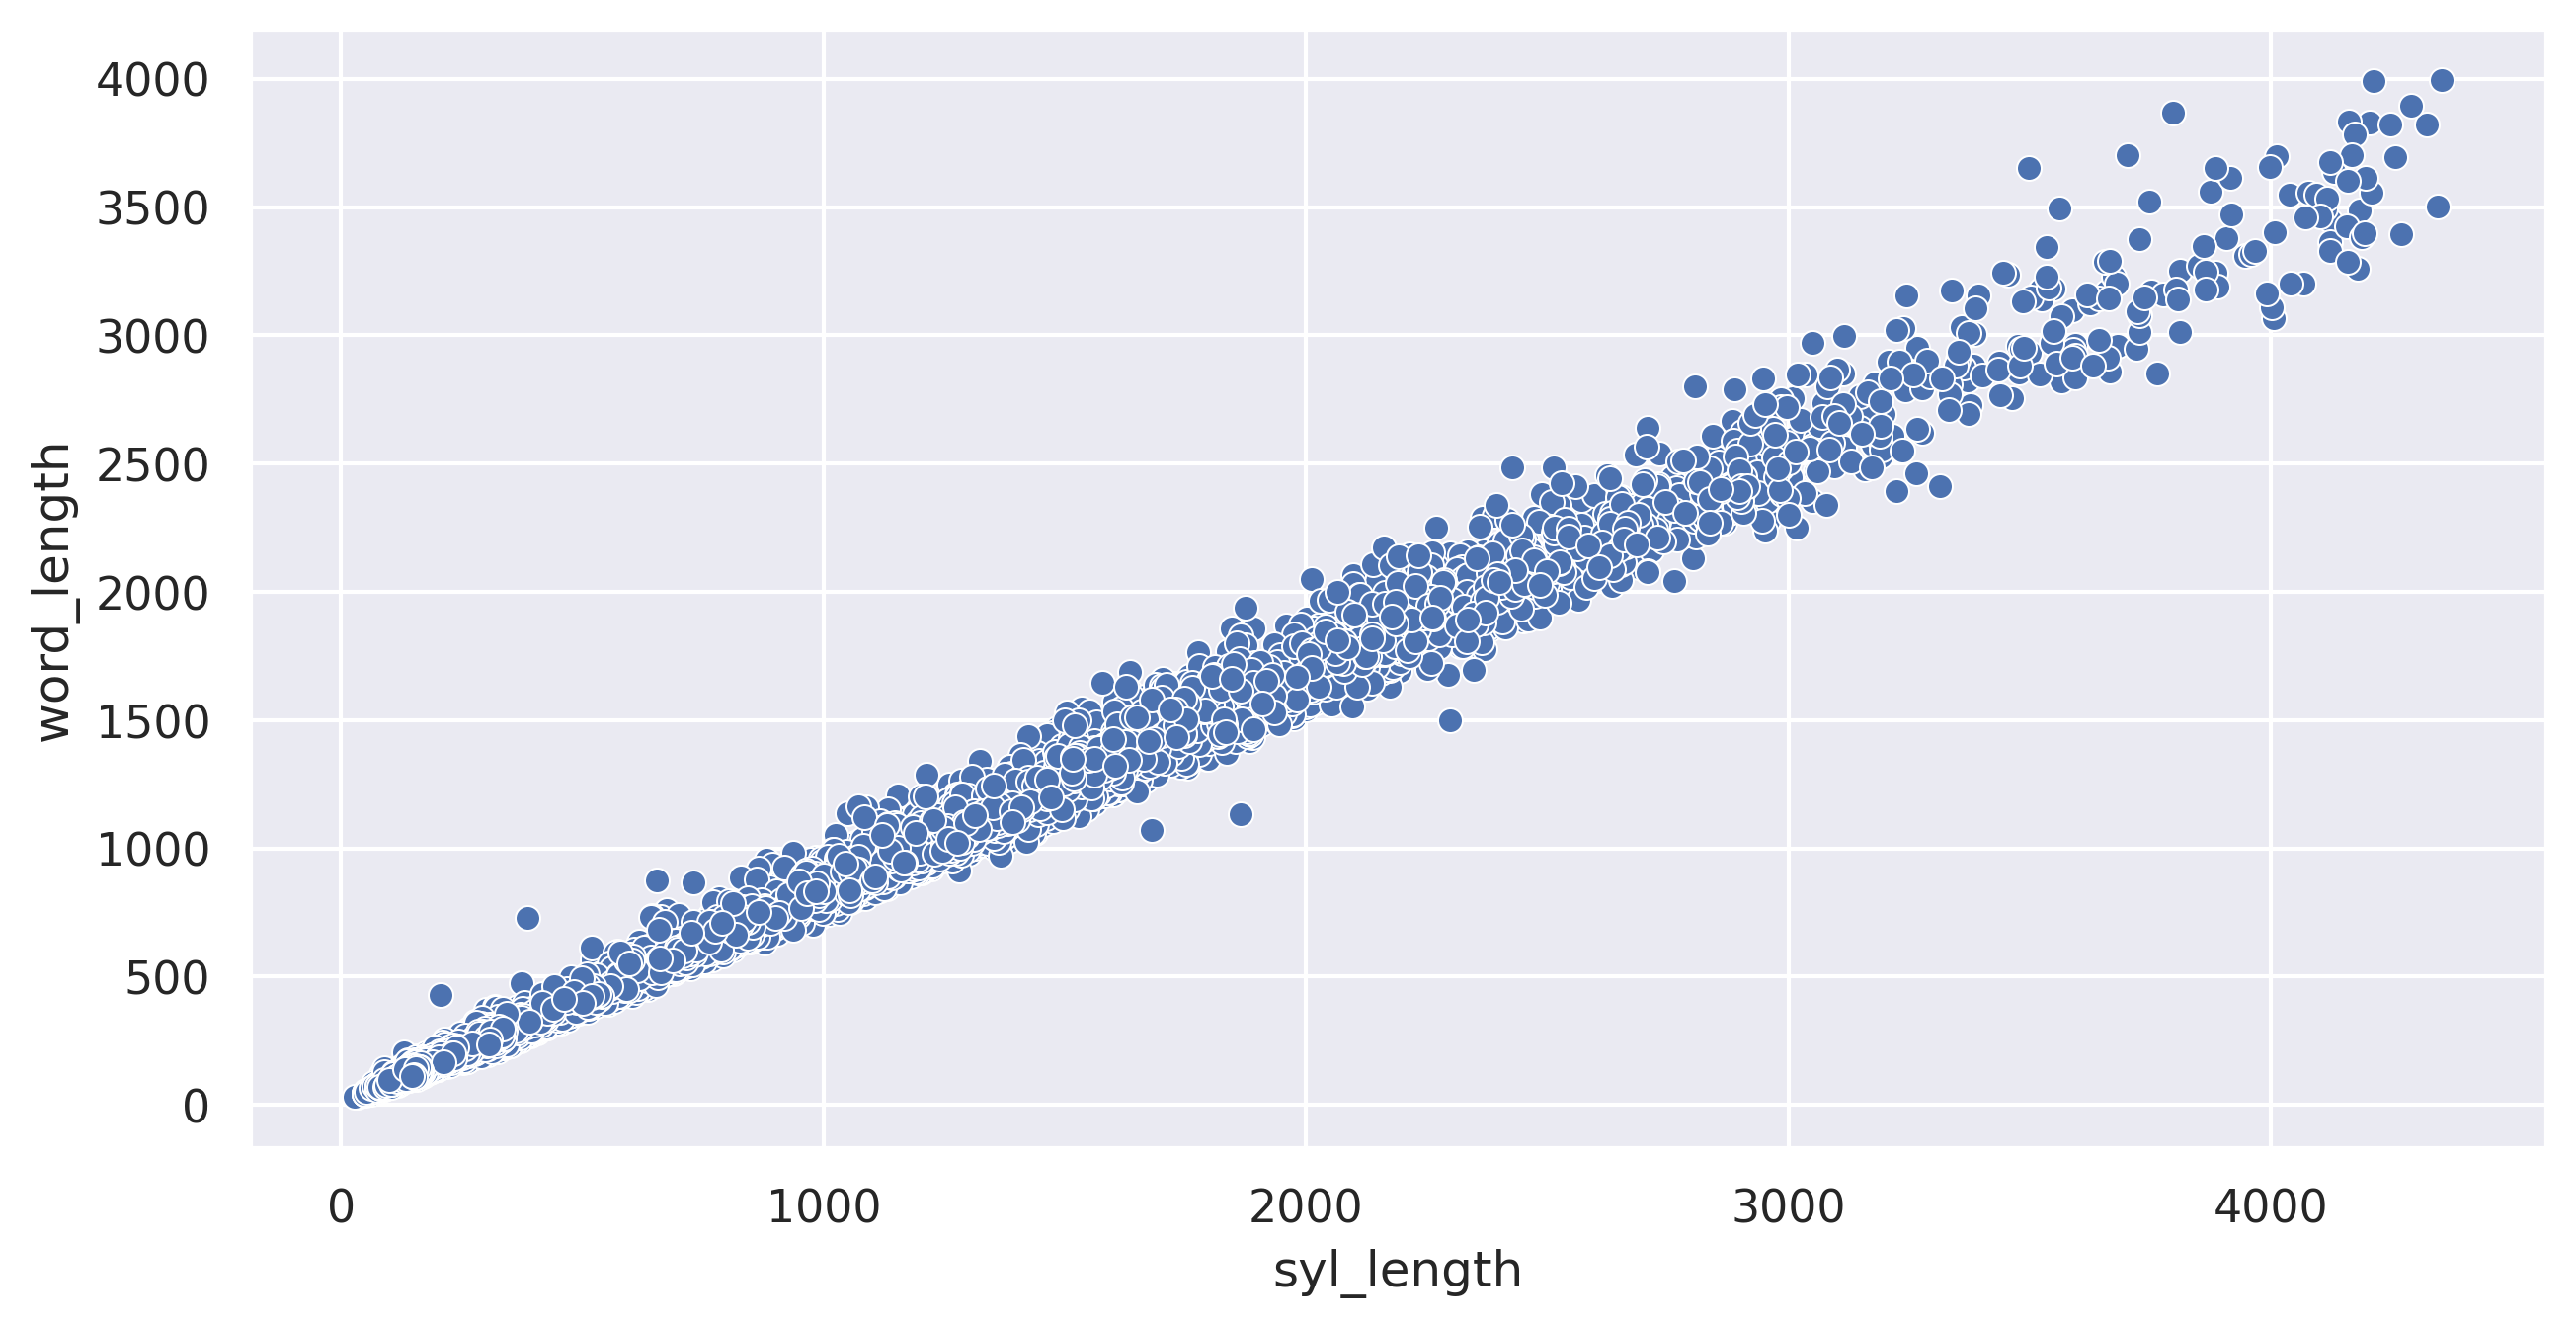

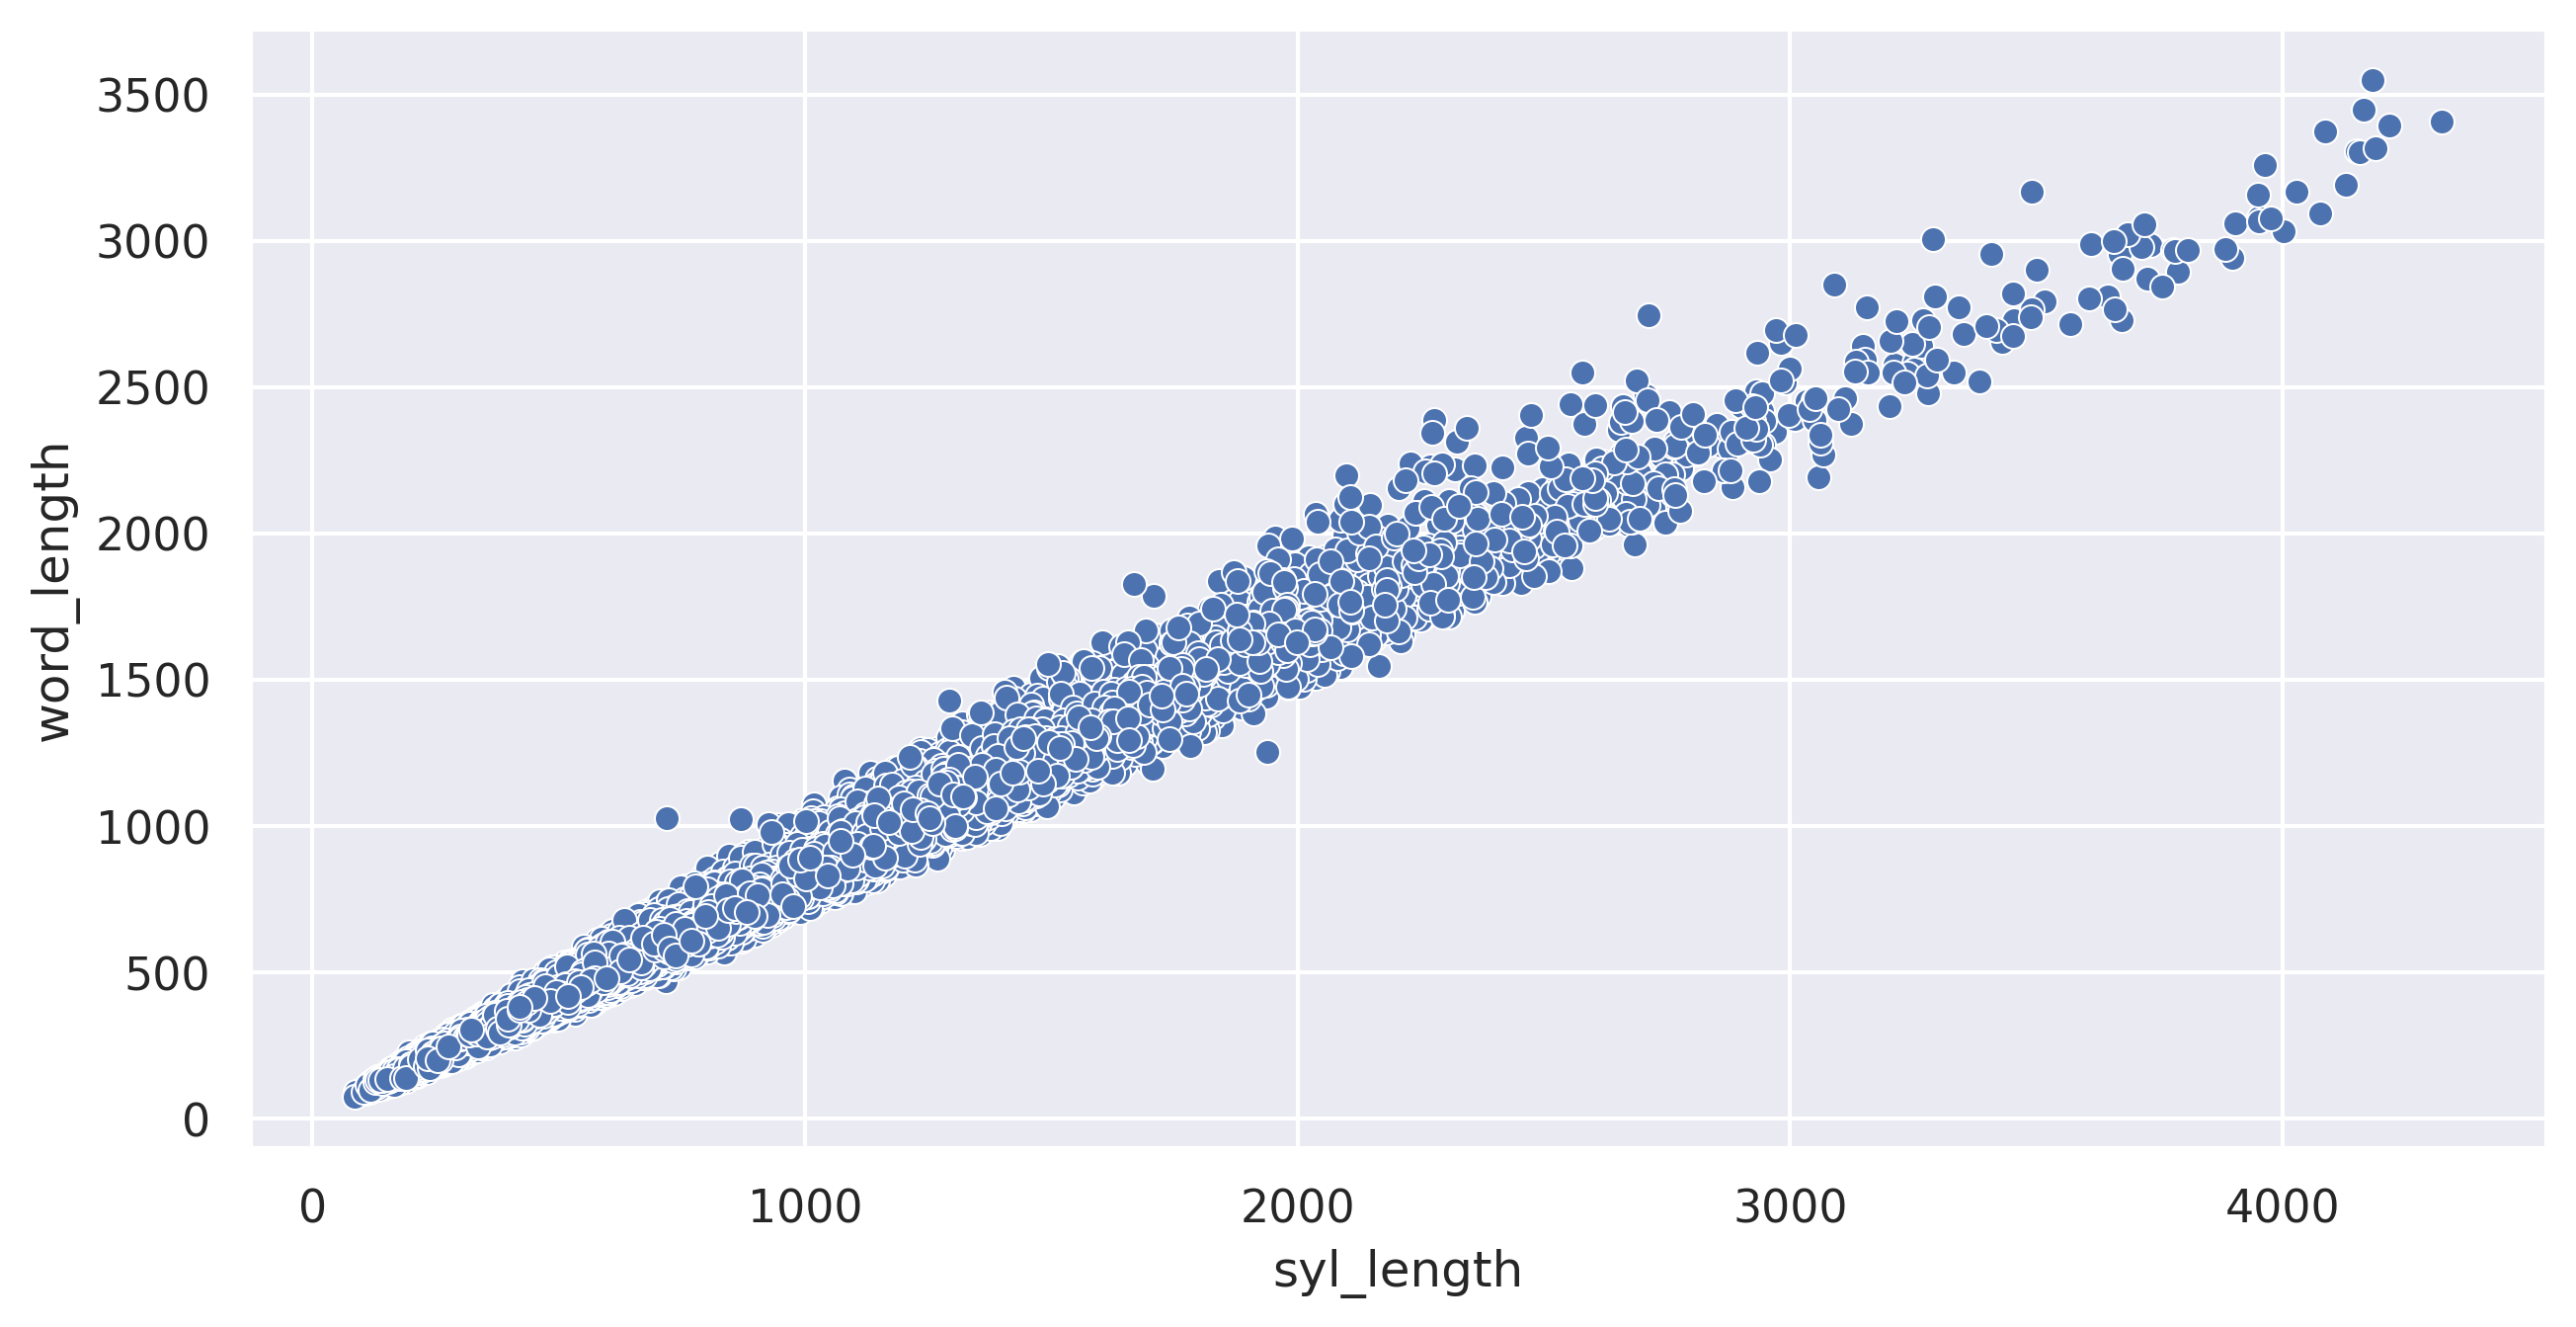

In [ ]:
sns.scatterplot(x = 'syl_length', y = 'word_length', data = df[df.label == 1])
plt.show()
sns.scatterplot(x = 'syl_length', y = 'word_length', data = df[df.label == 0])
plt.show()

# Top các từ phổ biến

## n - tiếng

### toàn bộ data

In [ ]:
def tuple_2_lists(ls):
    ind = []
    val = []
    n_temp = 0

    for x in ls:
        n_temp += int(x[1])

    
    for x in ls:
        ind.append(x[0])
        val.append(x[1] / n_temp)
    
    return ind, val

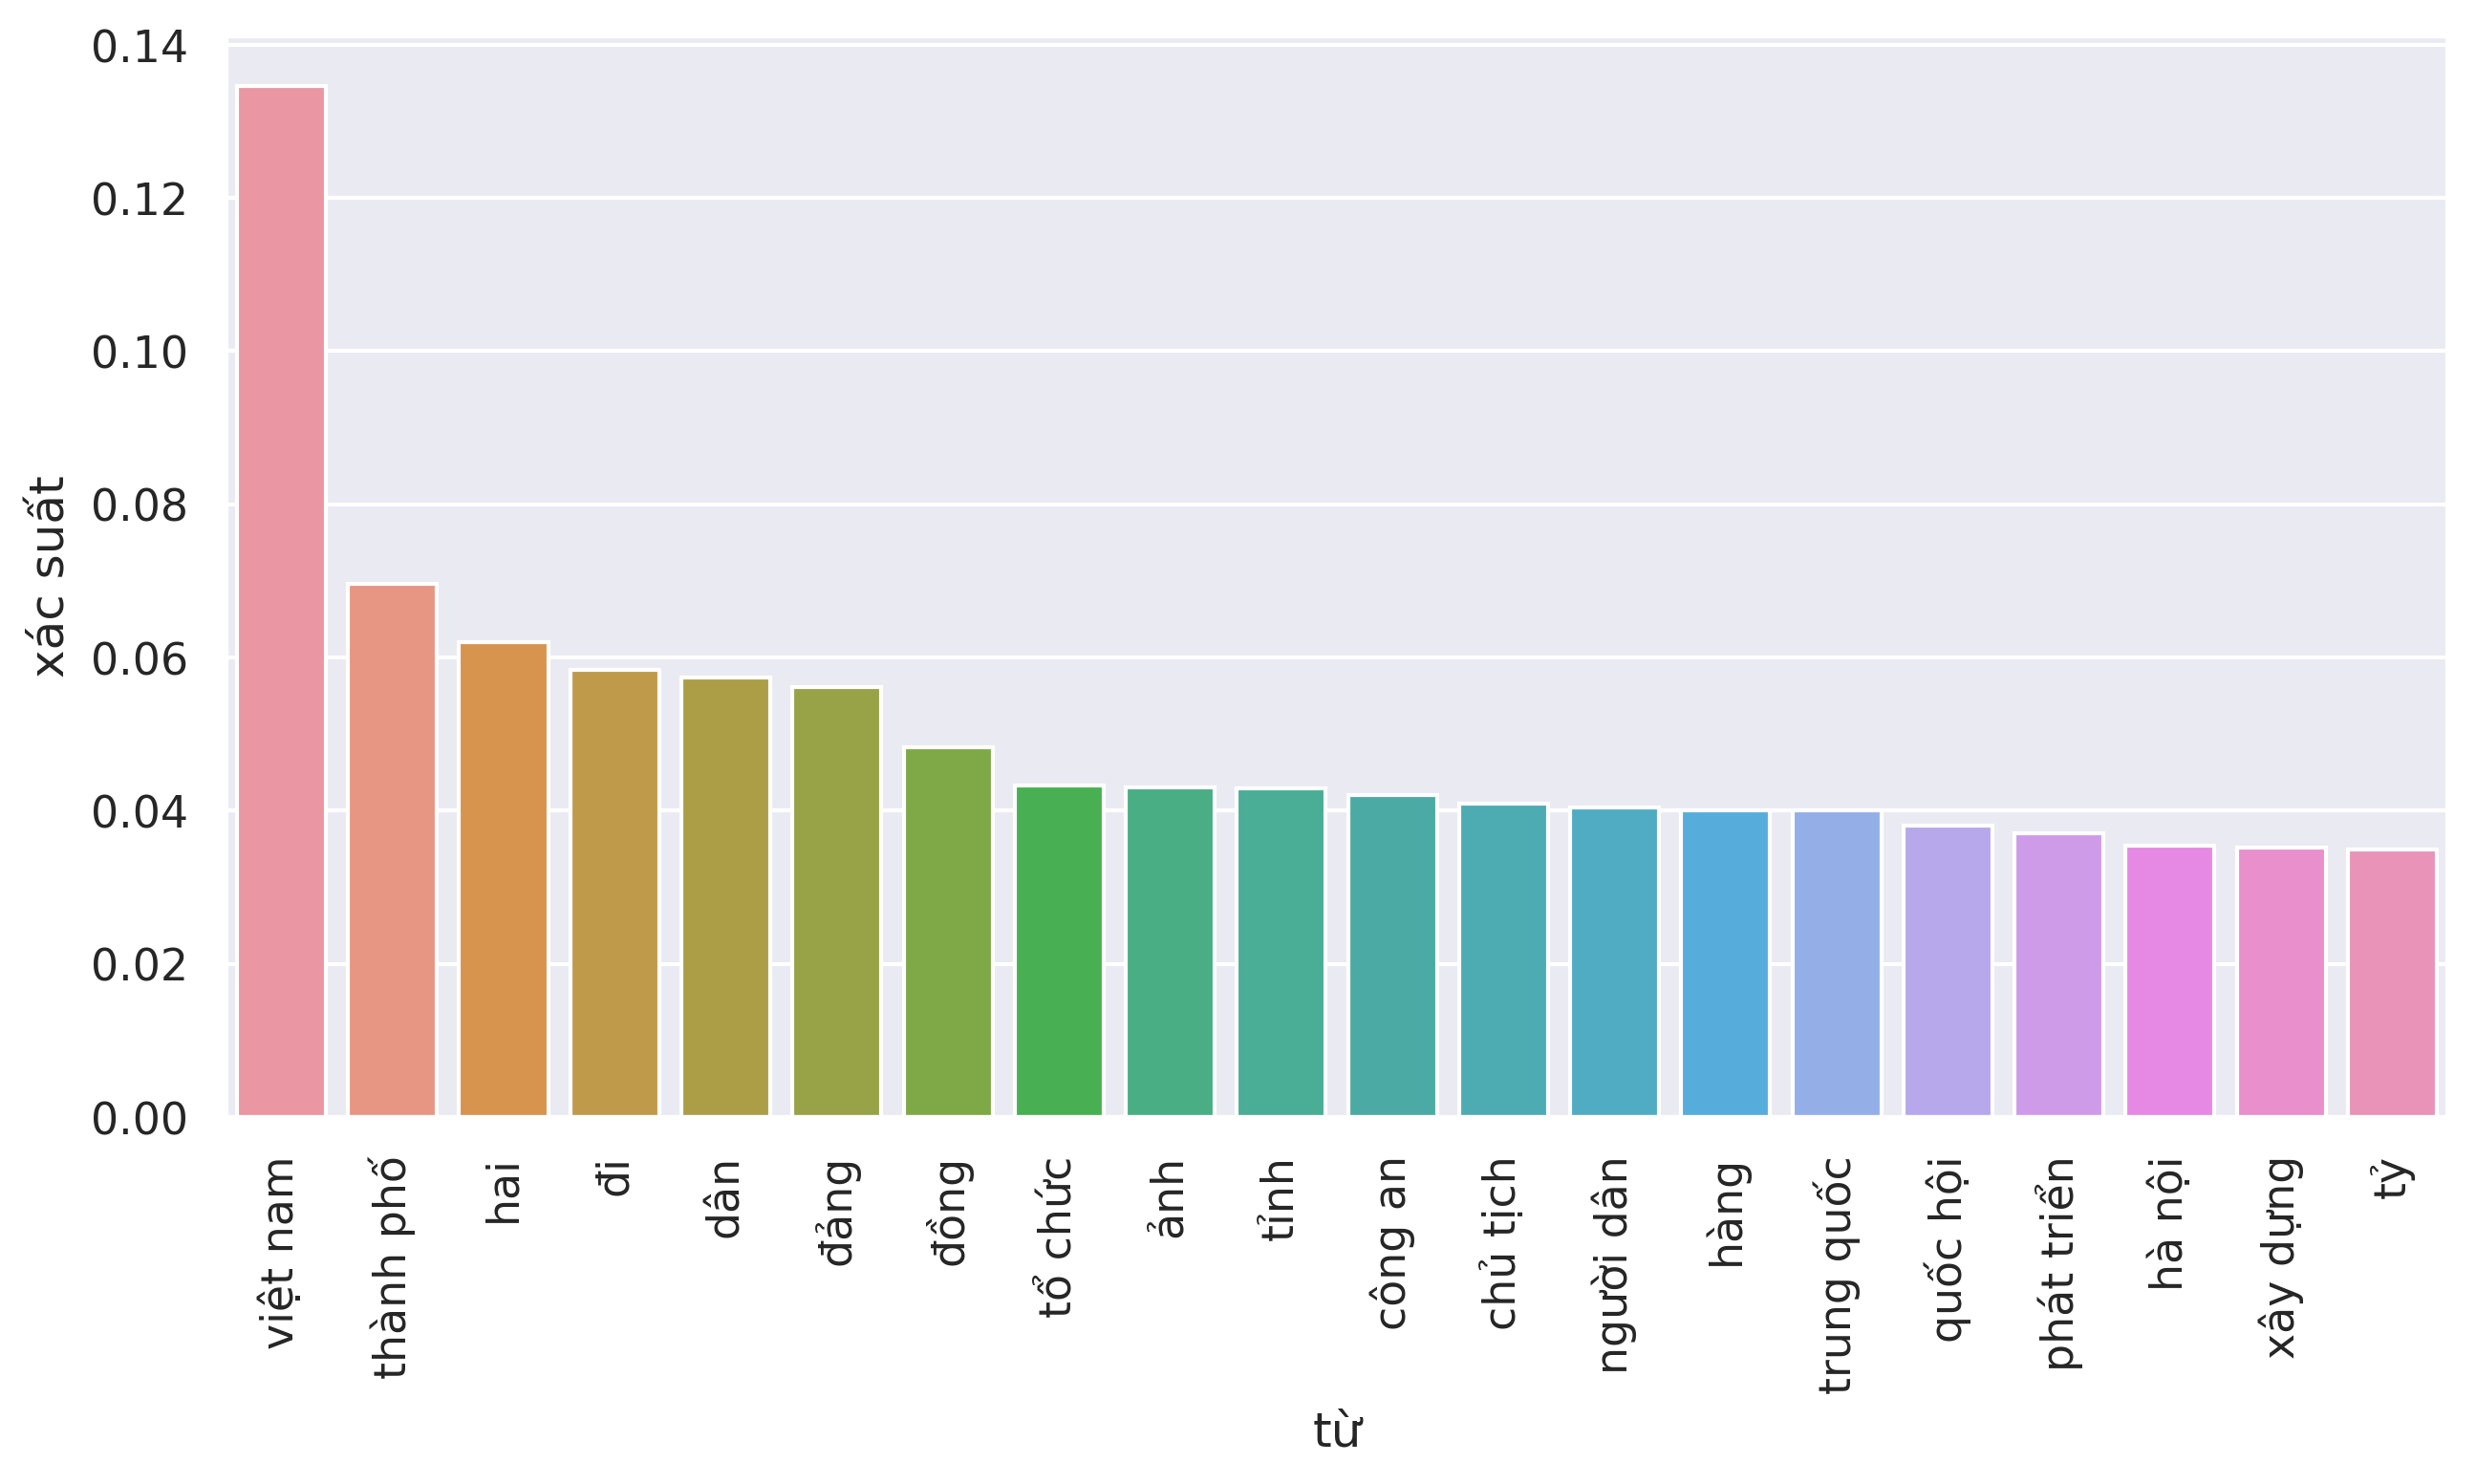

In [ ]:
temp = list(vocab_nstopwords.items())[:20]

ind, val = tuple_2_lists(temp)



temp = pd.DataFrame({'từ': ind, 'xác suất': val})
sns.barplot(x = 'từ', y = 'xác suất', data = temp)
plt.xticks(rotation = 90)
plt.show()

### Chỉ cho nhãn phản động

In [ ]:
vocab_nstopwords_1 = {}

for x in df[df['label'] == 1]['word_sep']:
    for word in x:
        if len(word) > 0 and word != '…' and word != '–' and word != '...' and word != '-' and not word.isdigit():
            word = word.replace('_', ' ')
            if word not in vocab_nstopwords_1:
                if word not in stopwords:
                    vocab_nstopwords_1[word] = 1
            else:
                if word not in stopwords:
                    vocab_nstopwords_1[word] += 1

vocab_nstopwords_1 = dict(sorted(vocab_nstopwords_1.items(), key=lambda item: item[1], reverse = True))

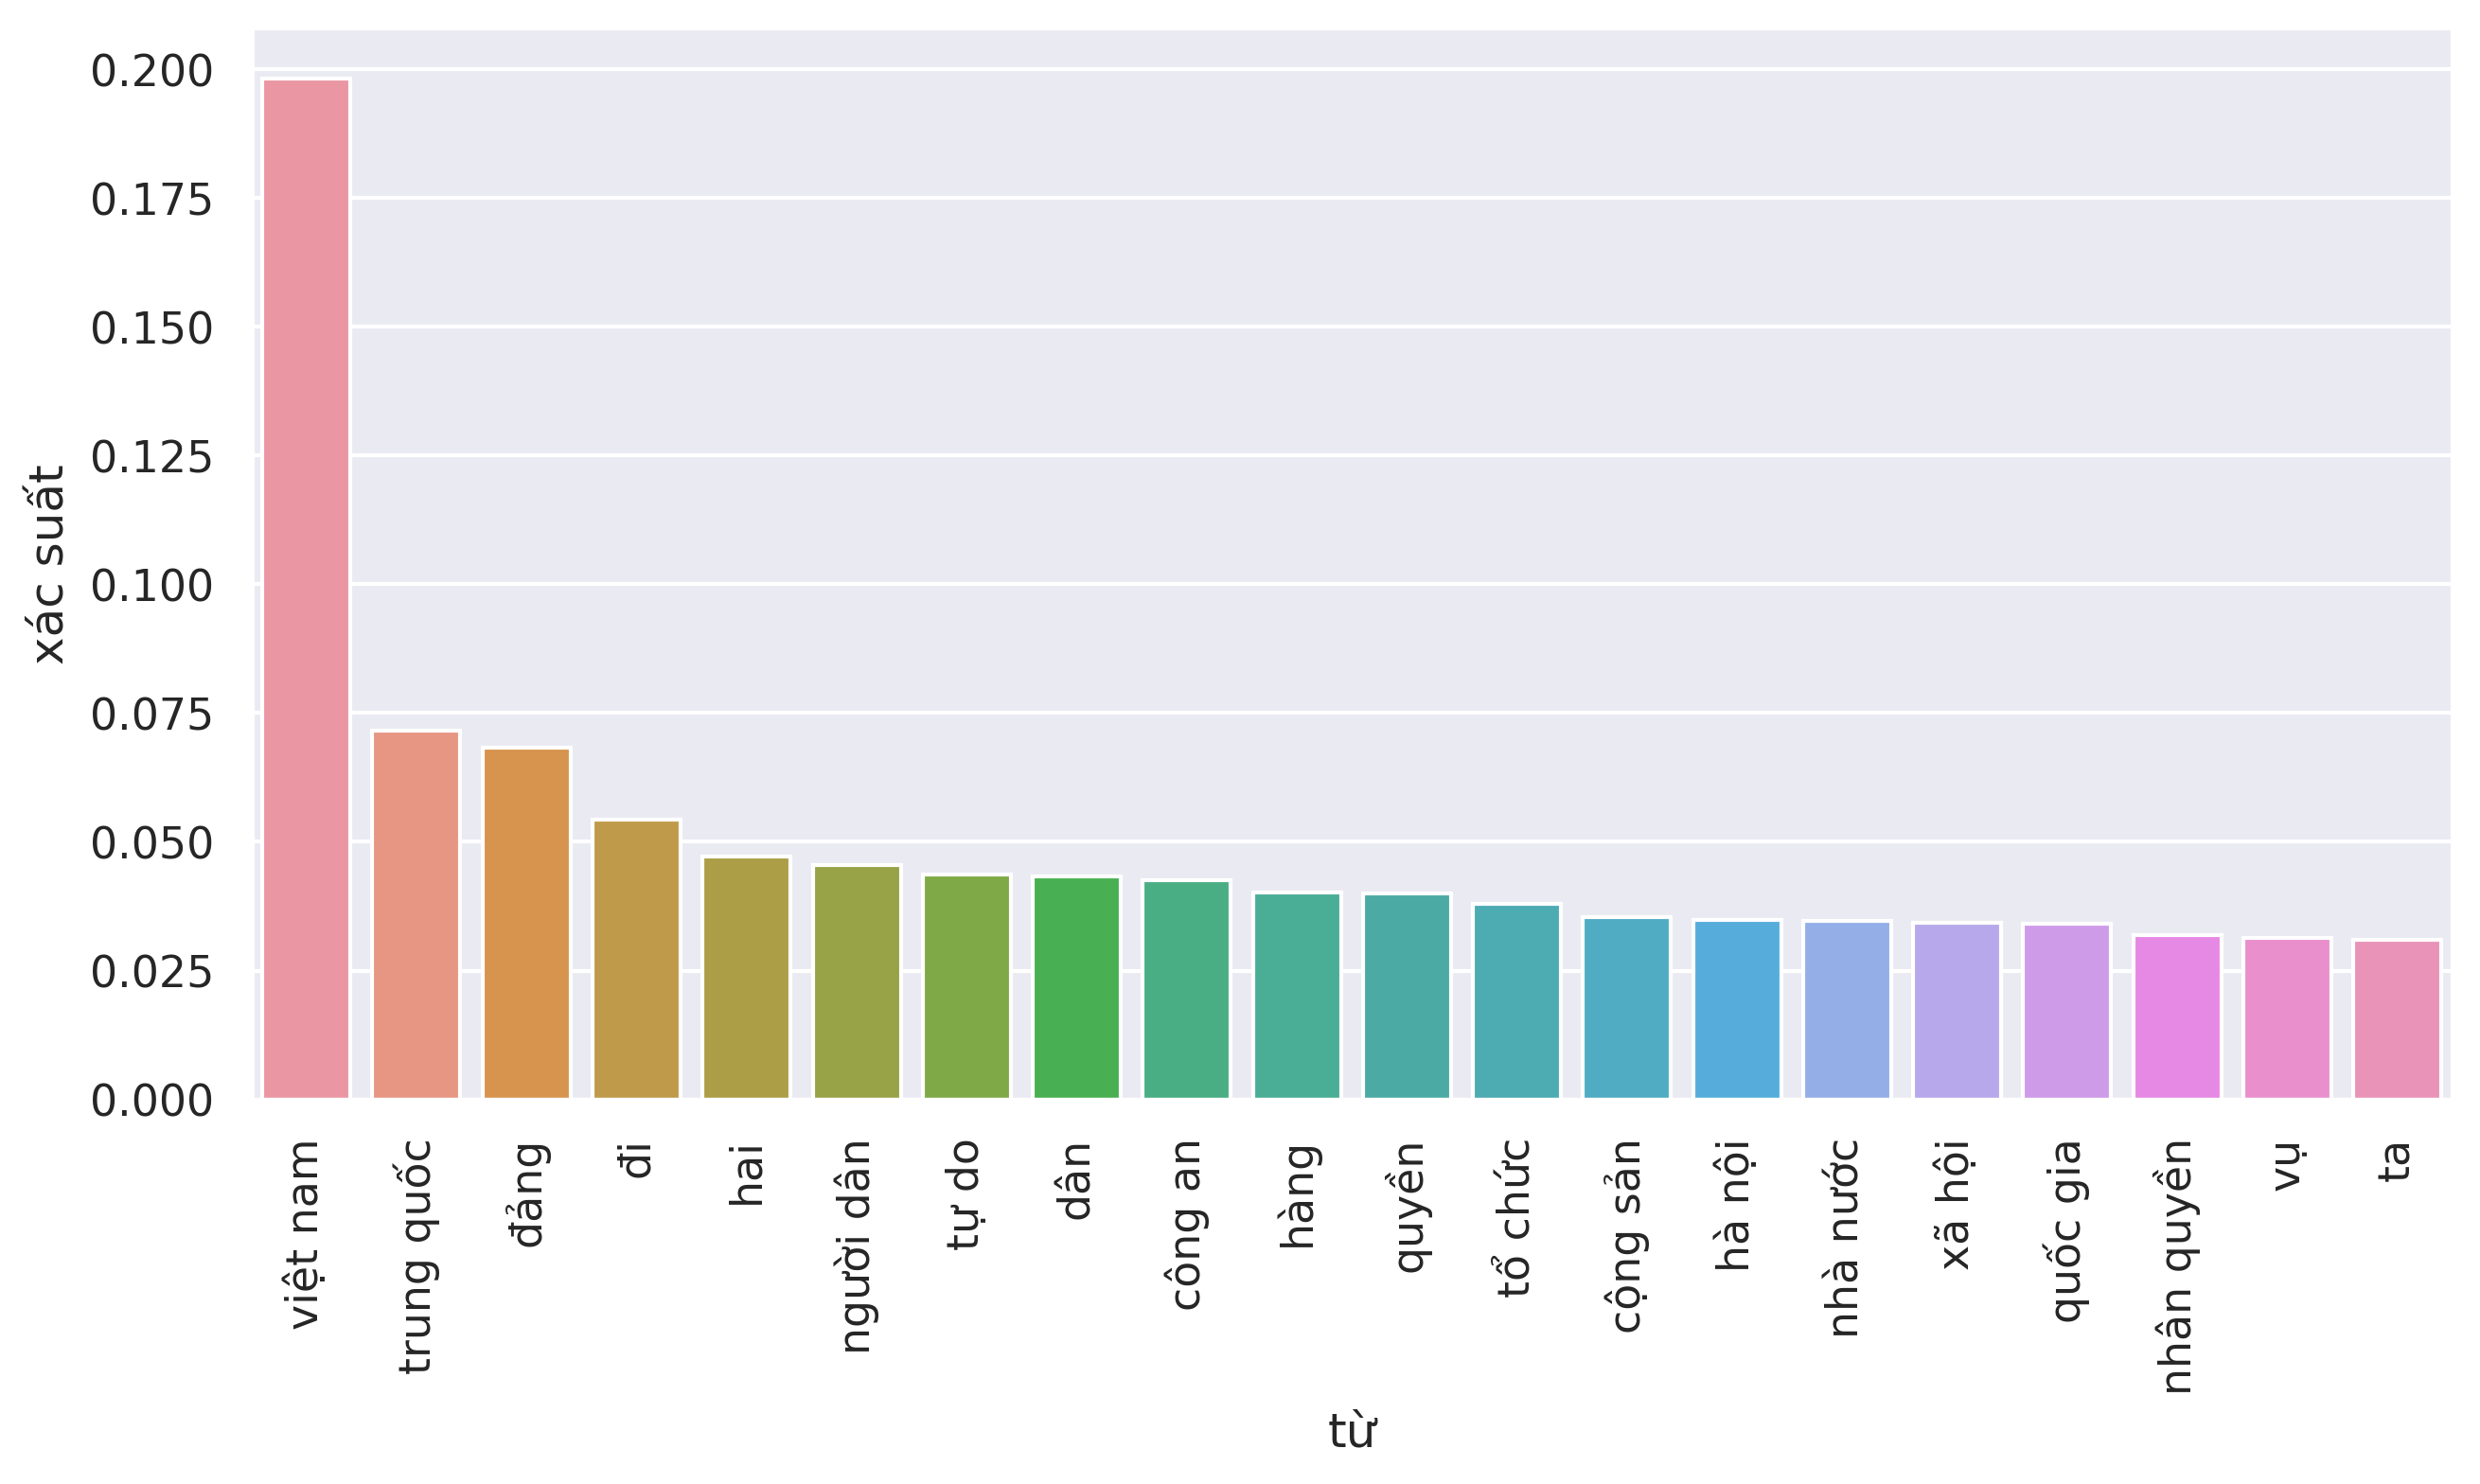

In [ ]:
temp = list(vocab_nstopwords_1.items())[:20]

ind, val = tuple_2_lists(temp)

temp = pd.DataFrame({'từ': ind, 'xác suất': val})
sns.barplot(x = 'từ', y = 'xác suất', data = temp)
plt.xticks(rotation = 90)
plt.show()

## 1-tiếng

In [ ]:
def get_vocab_ngrams(df, ngrams = 1, only_label_1 = False):
    vocab_nstopwords = {}
    loops = df[df['label'] == 1]['word_sep'] if only_label_1 else df['word_sep']

    for x in loops:
        for word in x:
            word = word.strip()
            if word.count('_') != ngrams - 1:
                continue

            if word == 'thành_phốhồ_chí_minh':
                word = 'thành_phố_hồ_chí_minh'

            if len(word) > 0 and word != '…' and word != '–' and word != '...' and word != '-' and not word.isdigit():
                word = word.replace('_', ' ')
                if word not in vocab_nstopwords:
                    if word not in stopwords:
                        vocab_nstopwords[word] = 1
                else:
                    if word not in stopwords:
                        vocab_nstopwords[word] += 1

    vocab_nstopwords = dict(sorted(vocab_nstopwords.items(), key=lambda item: item[1], reverse = True))
    vocab_nstopwords = list(vocab_nstopwords.items())[:20]
    return vocab_nstopwords

def plot_vocab(temp):
    ind, val = tuple_2_lists(temp)
    temp = pd.DataFrame({'từ': ind, 'xác suất': val})
    sns.barplot(x = 'từ', y = 'xác suất', data = temp, )
    plt.xticks(rotation = 90)
    plt.show()

### toàn bộ data

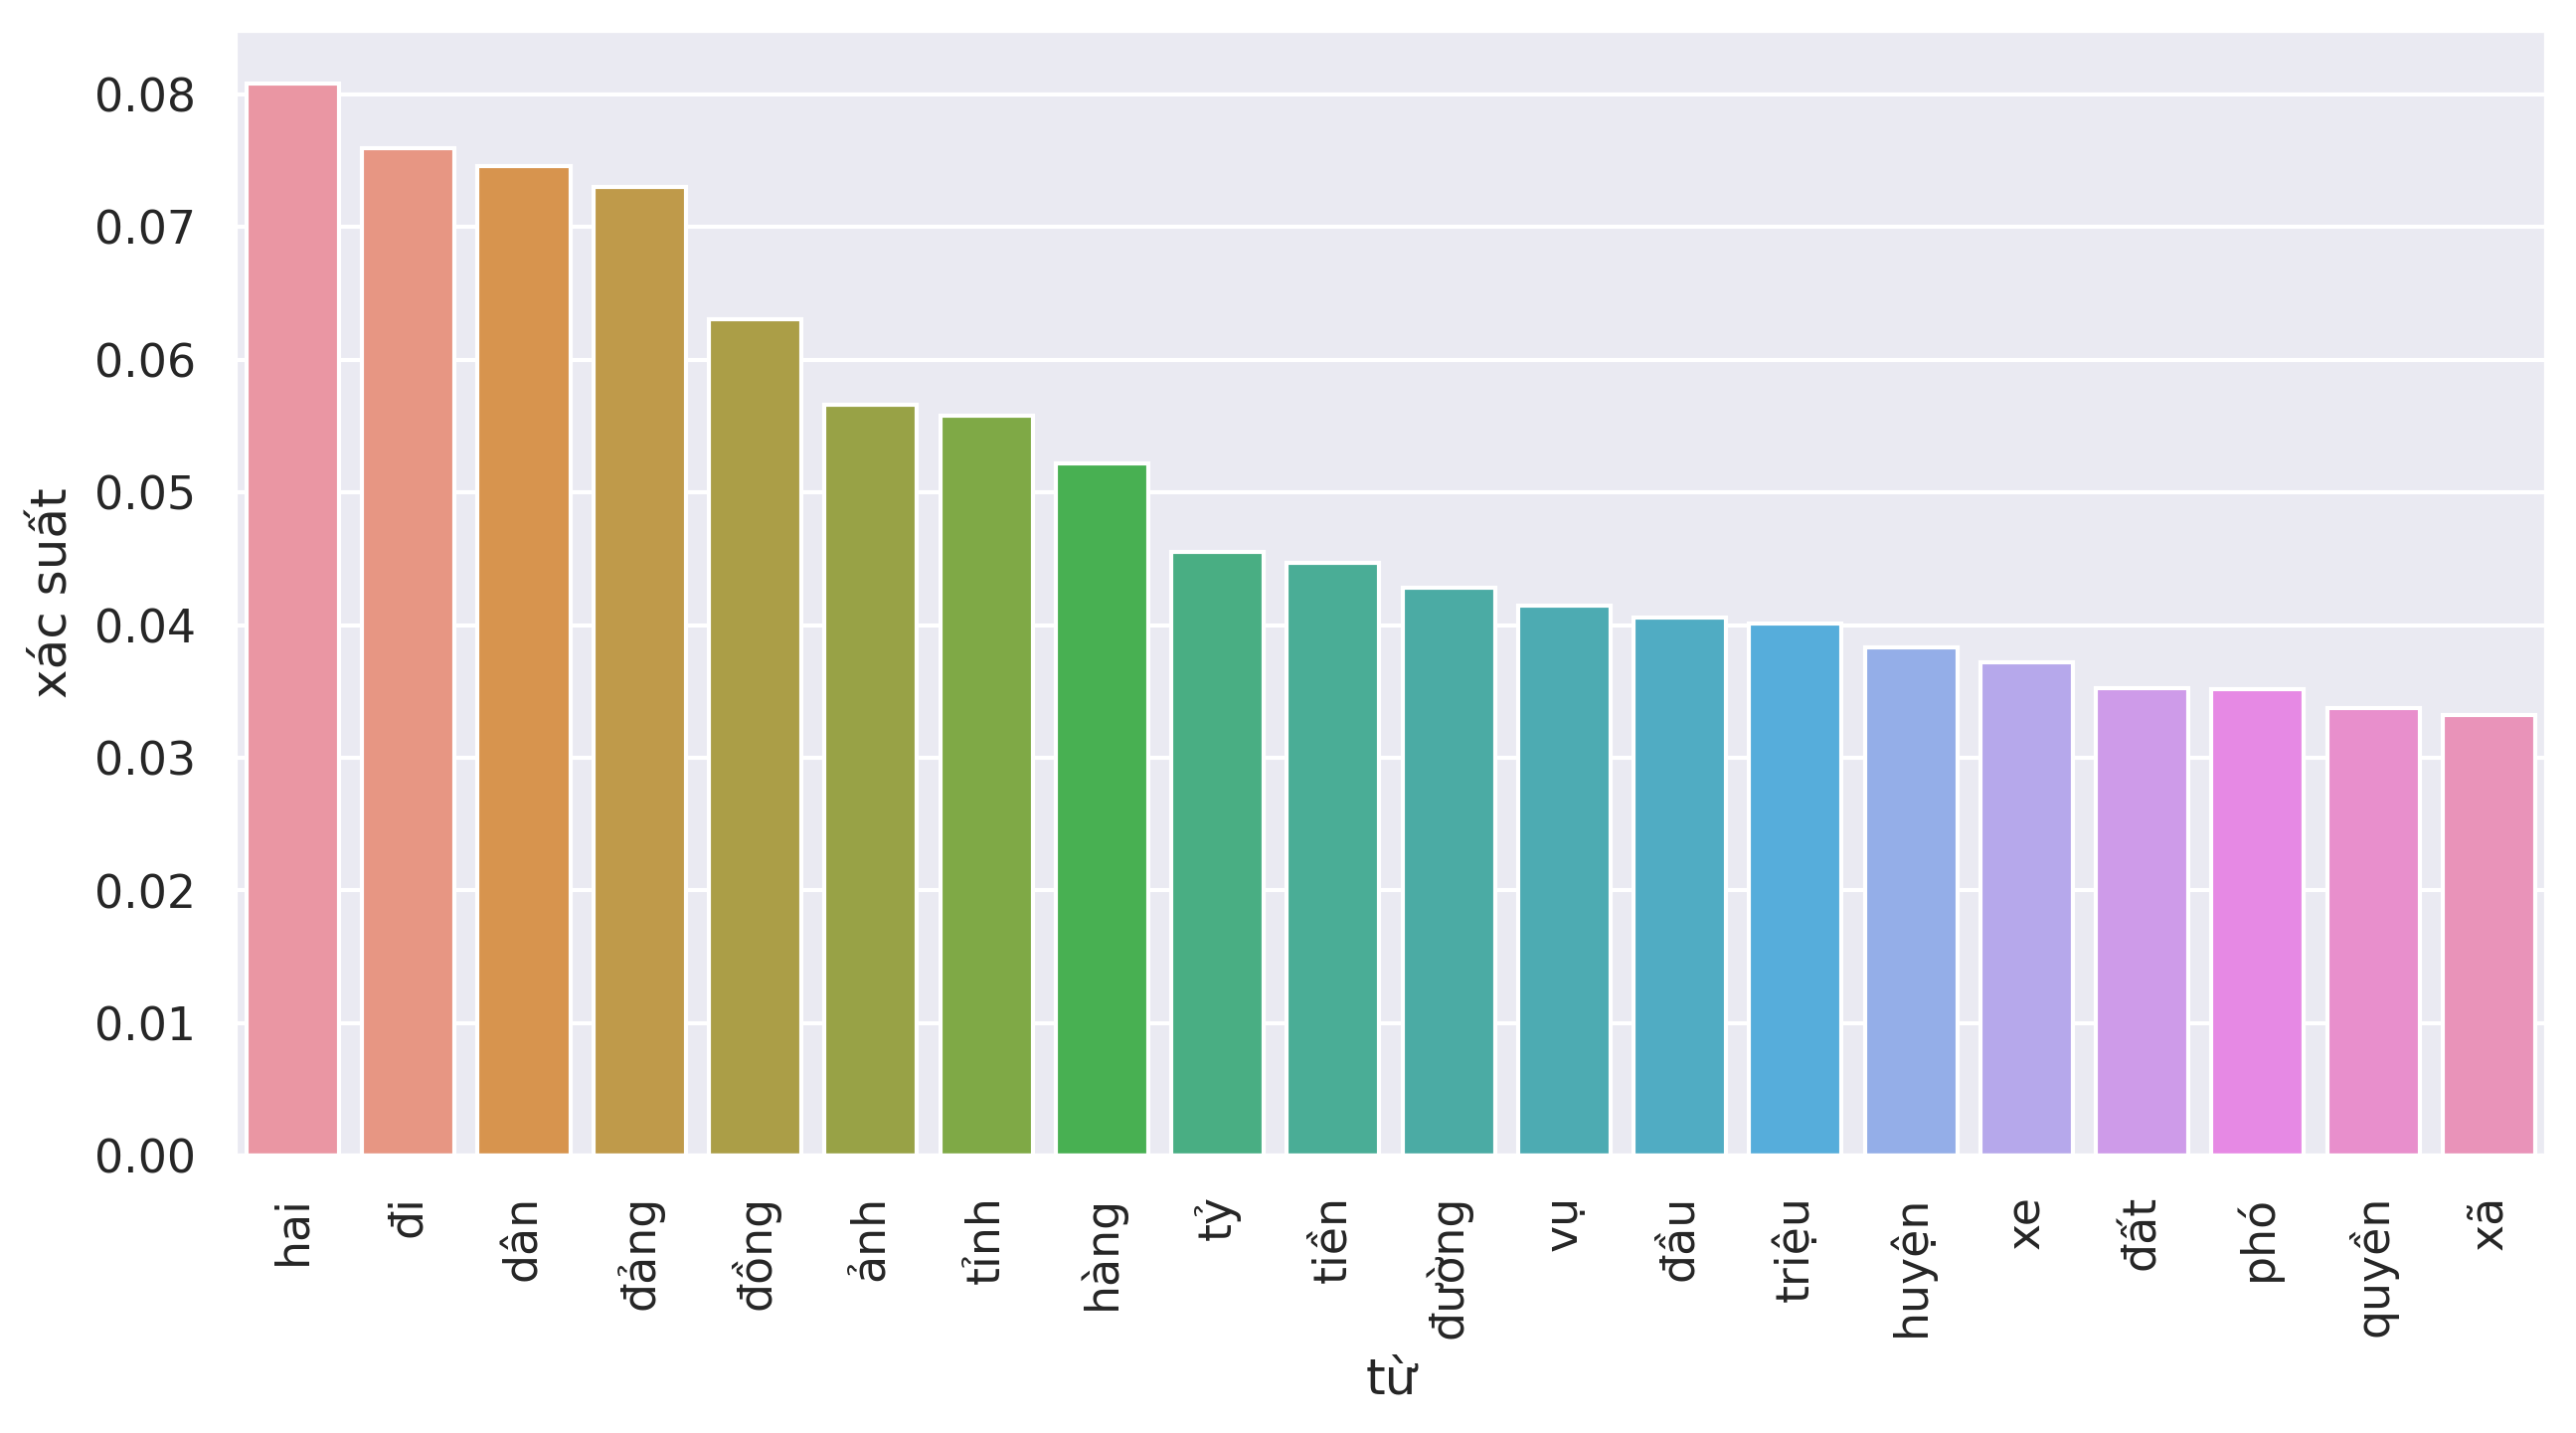

In [ ]:
vocab_nstopwords_1 = get_vocab_ngrams(df, 1)
plot_vocab(vocab_nstopwords_1)

### Chỉ cho nhãn phản động

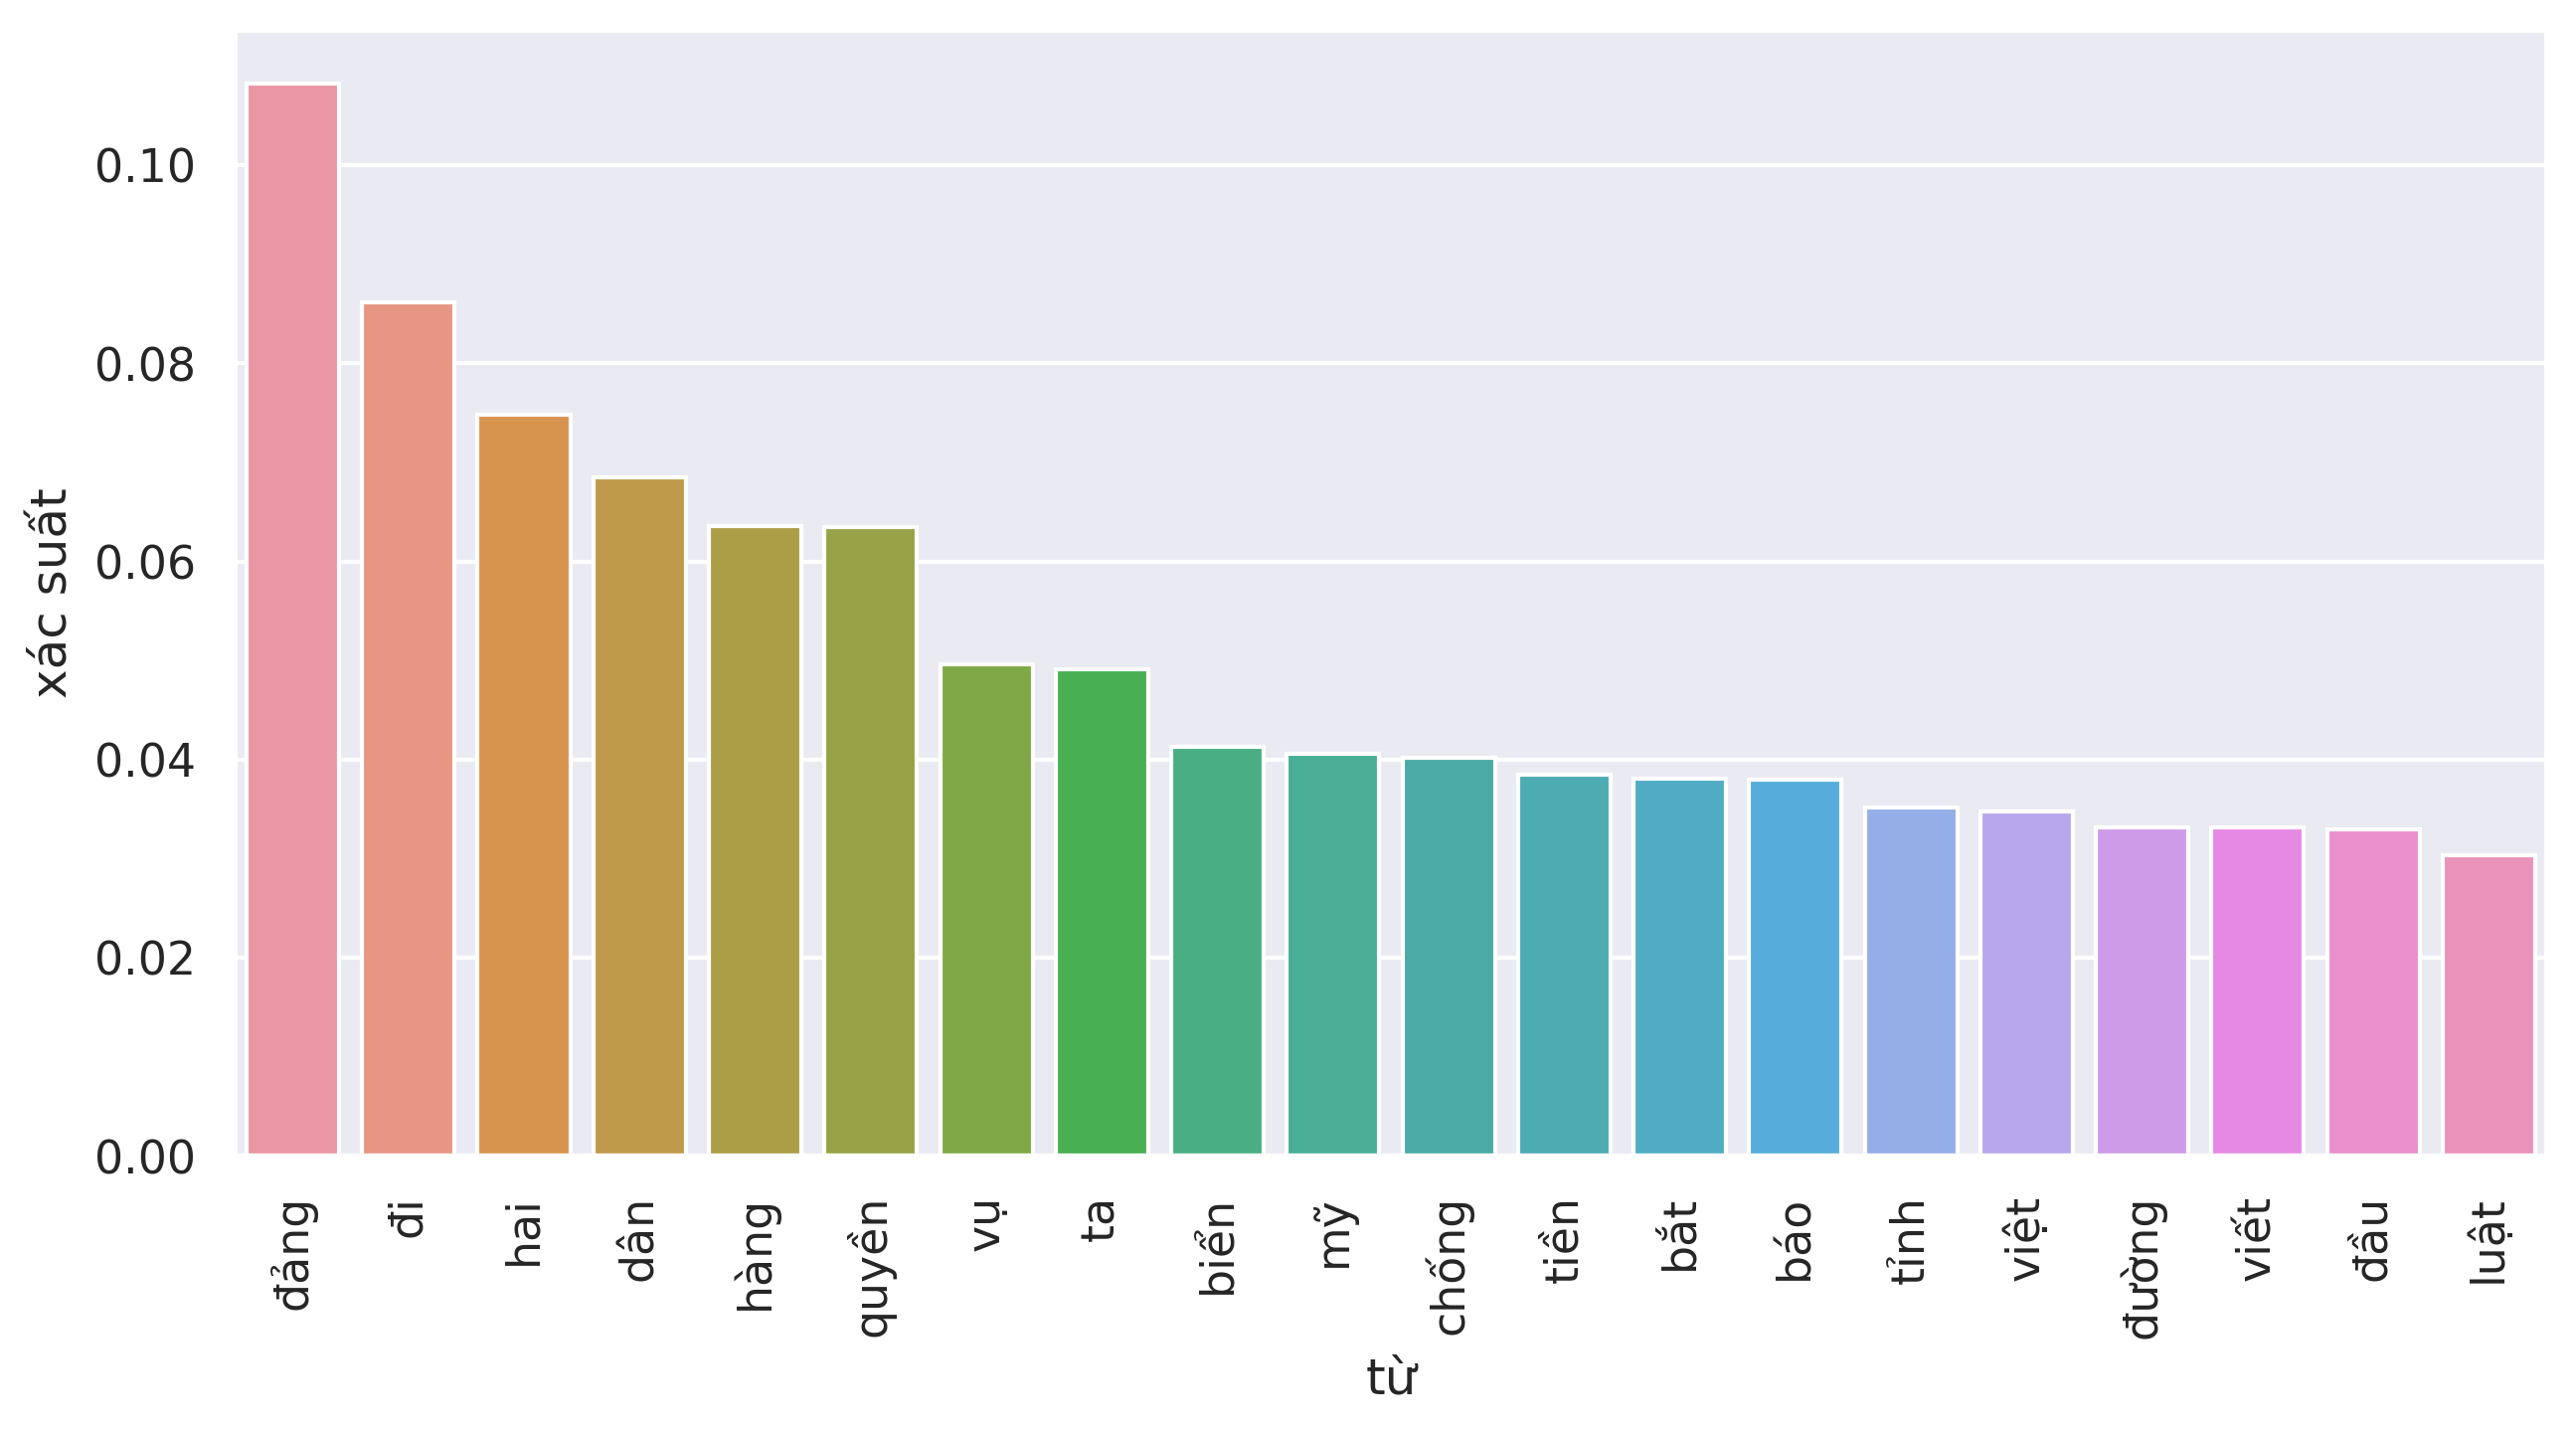

In [ ]:
vocab_nstopwords_1 = get_vocab_ngrams(df, 1, True)
plot_vocab(vocab_nstopwords_1)

## 2-tiếng

### toàn bộ data

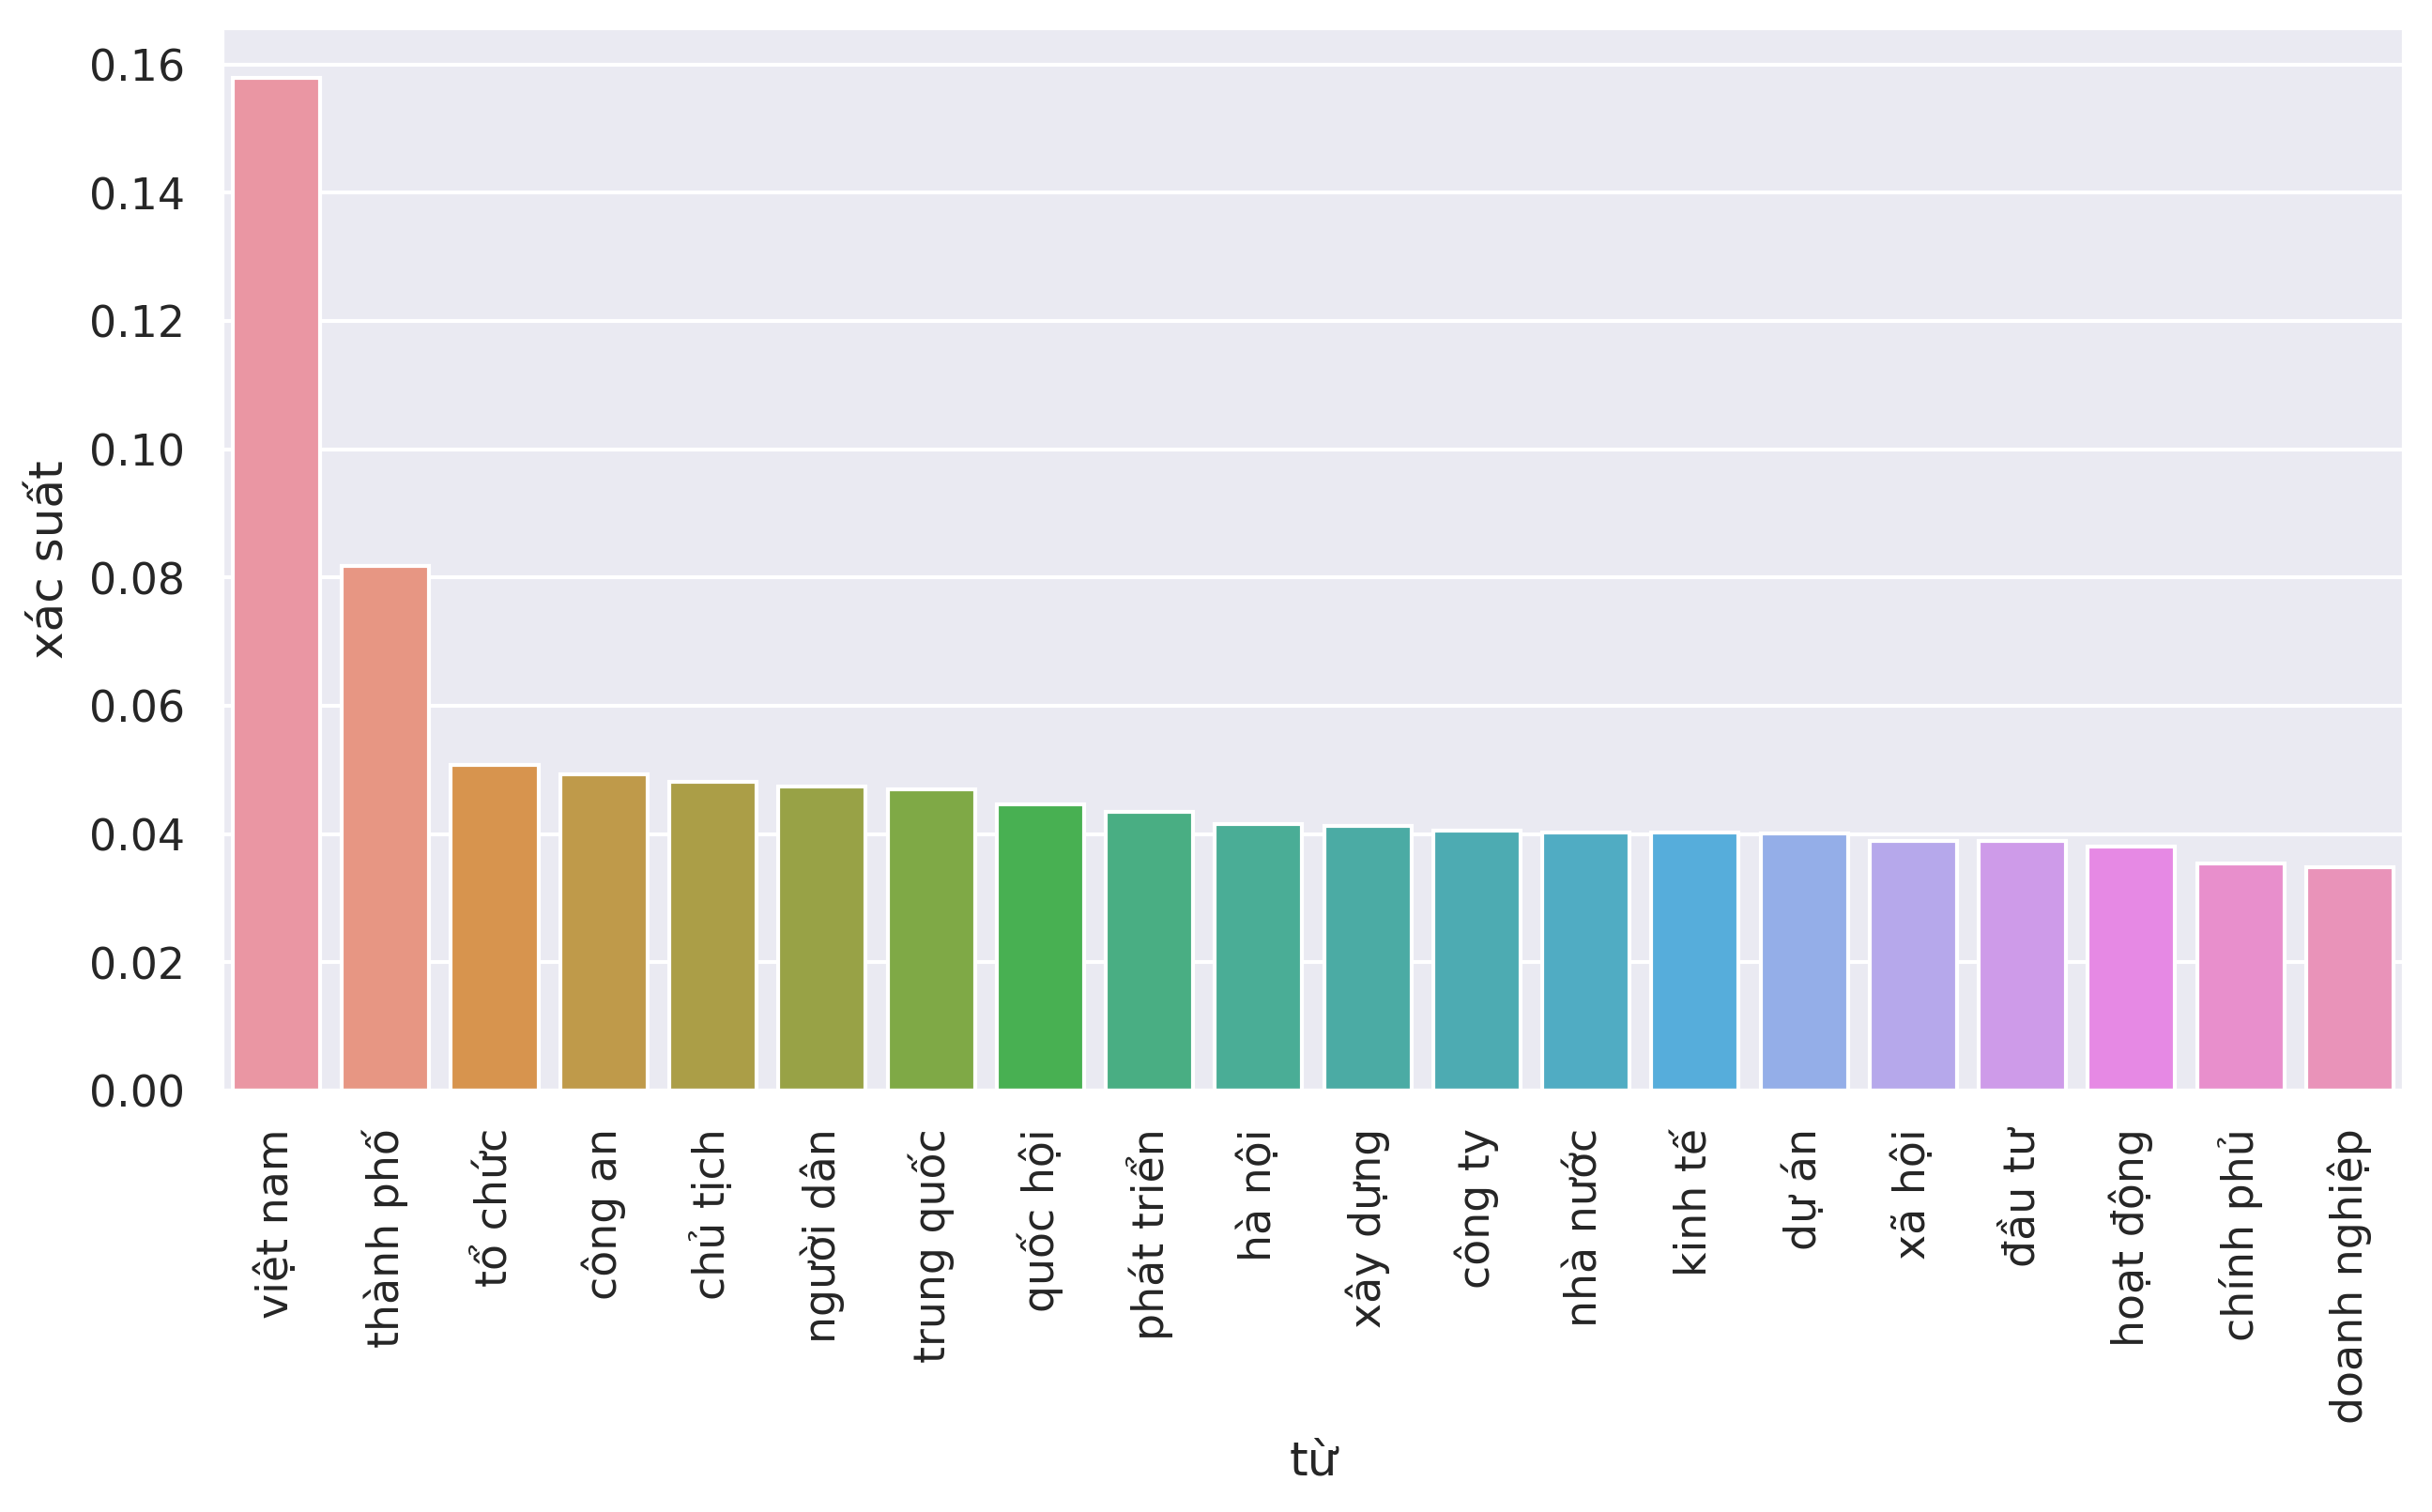

In [ ]:
vocab_nstopwords_2 = get_vocab_ngrams(df, 2)
plot_vocab(vocab_nstopwords_2)

### Chỉ cho nhãn phản động

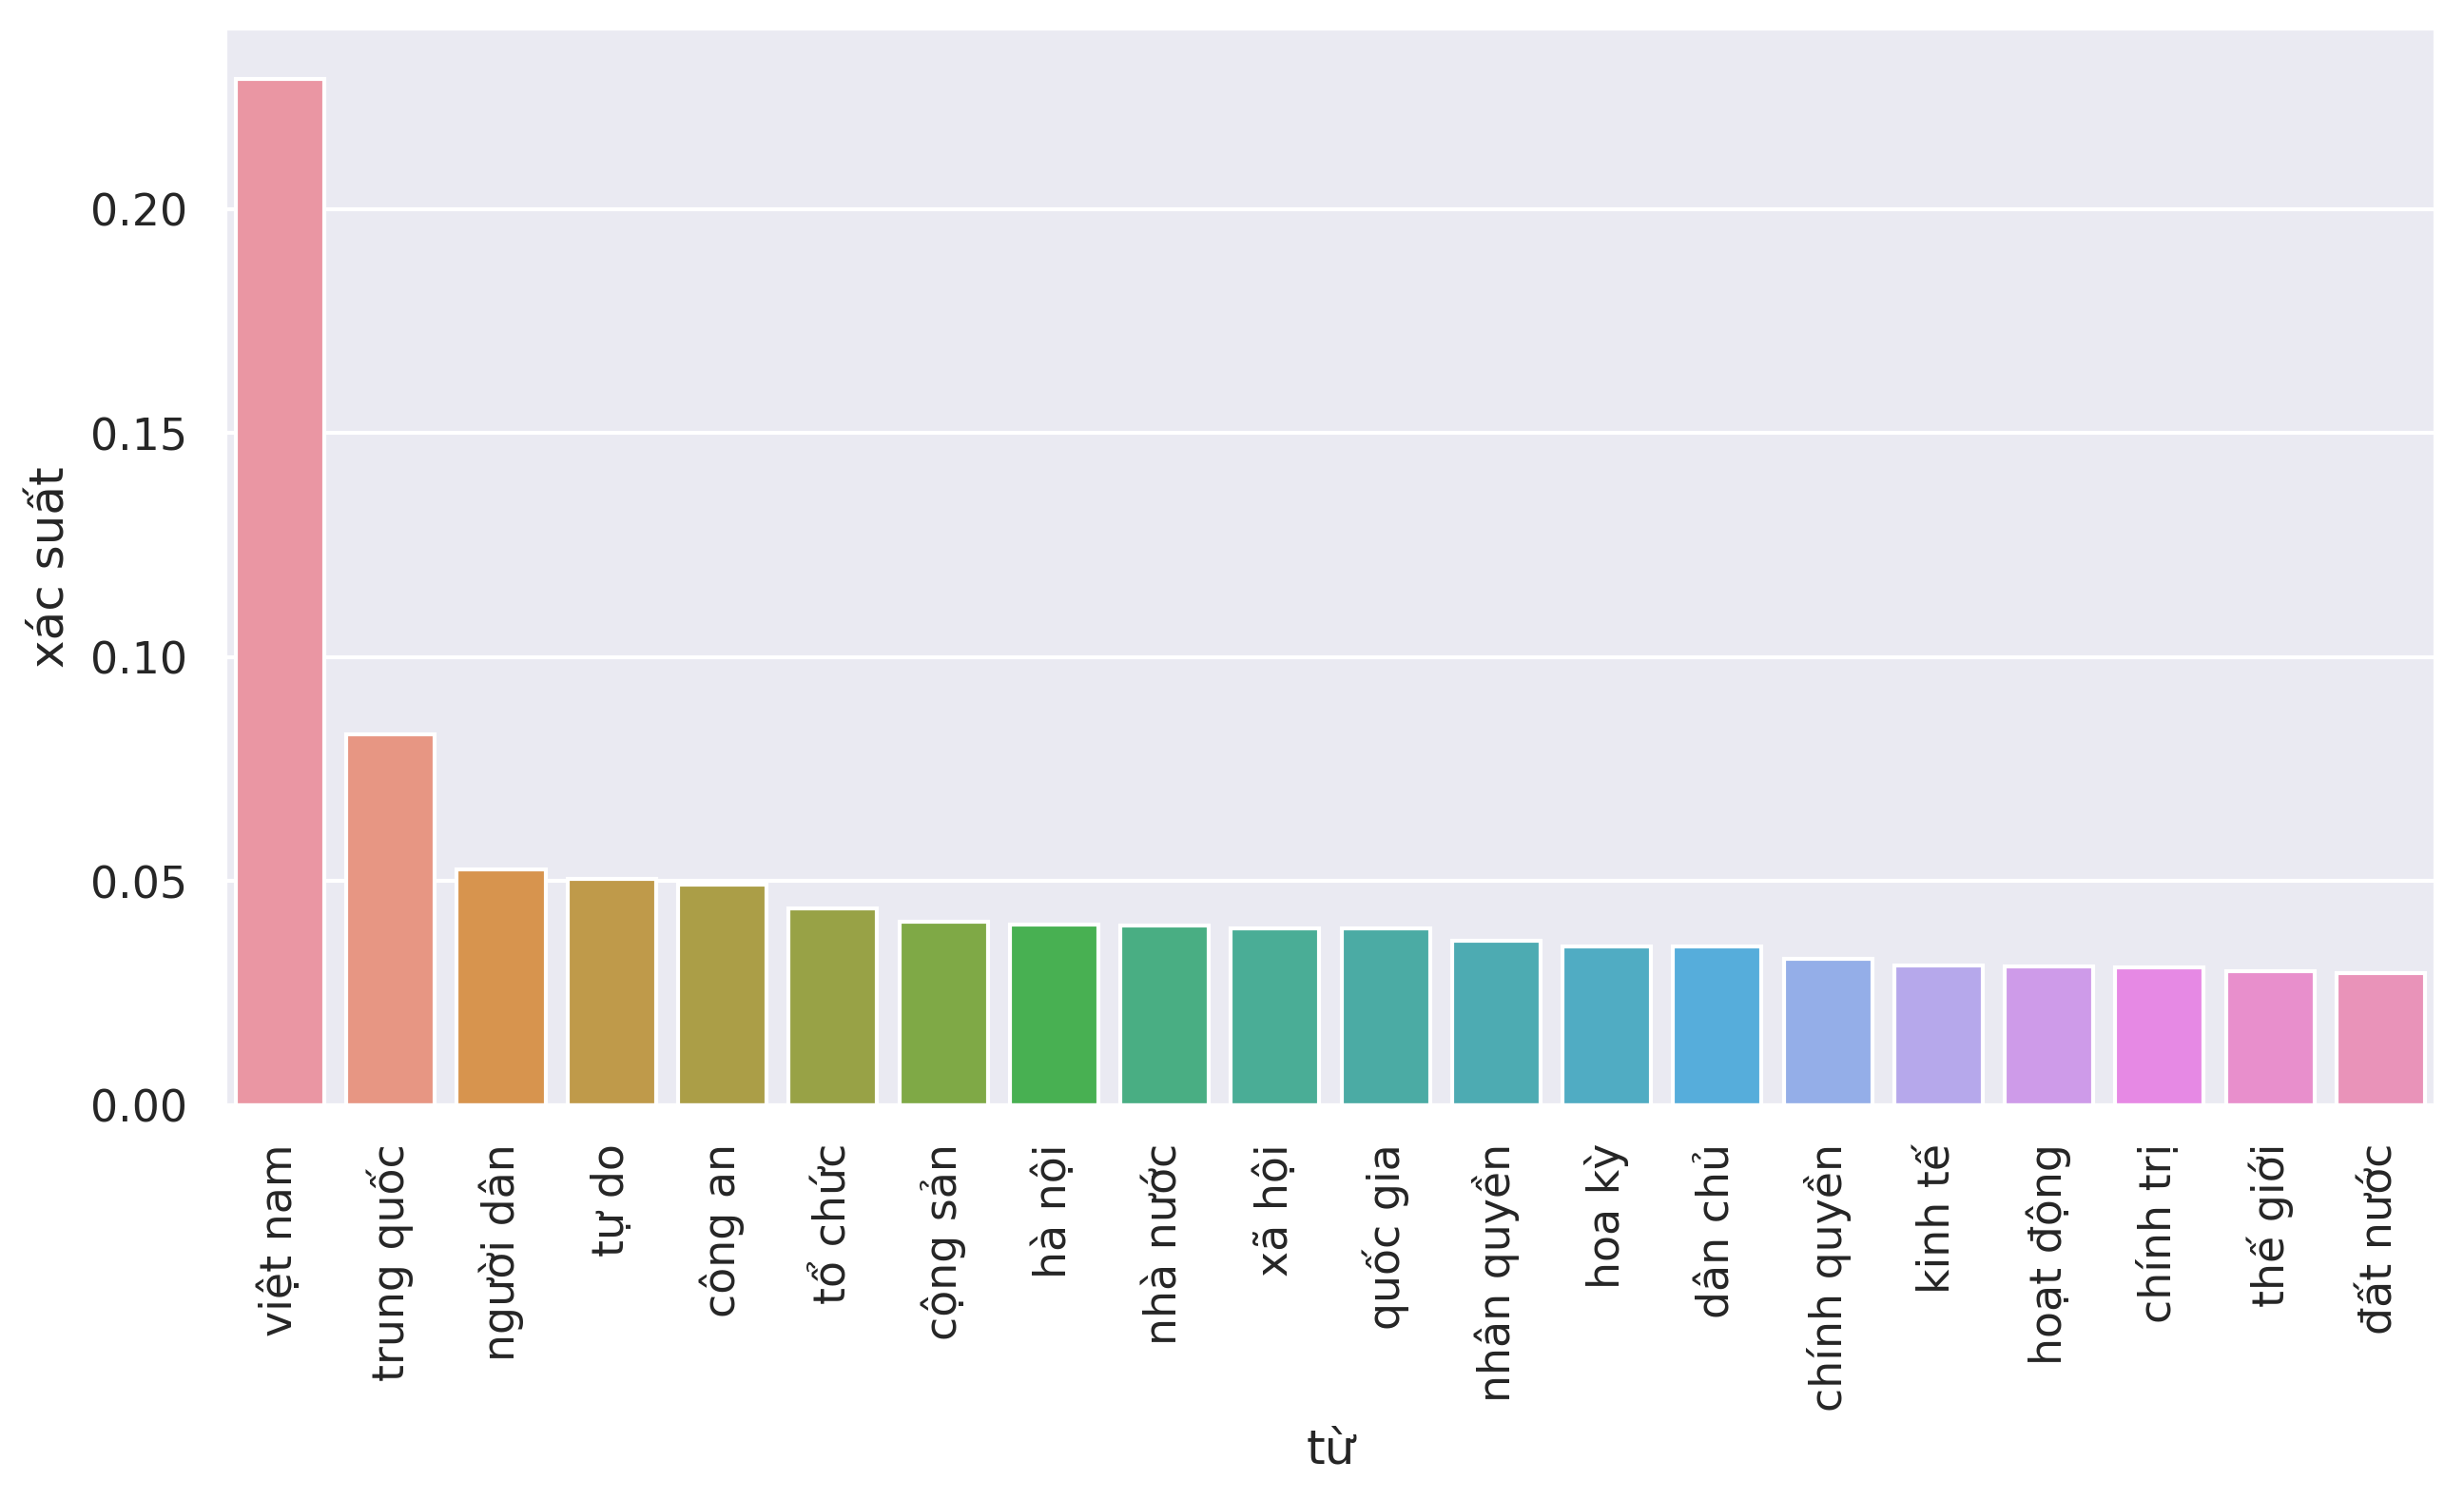

In [ ]:
vocab_nstopwords_2 = get_vocab_ngrams(df, 2, True)
plot_vocab(vocab_nstopwords_2)

## 3-tiếng

### toàn bộ data

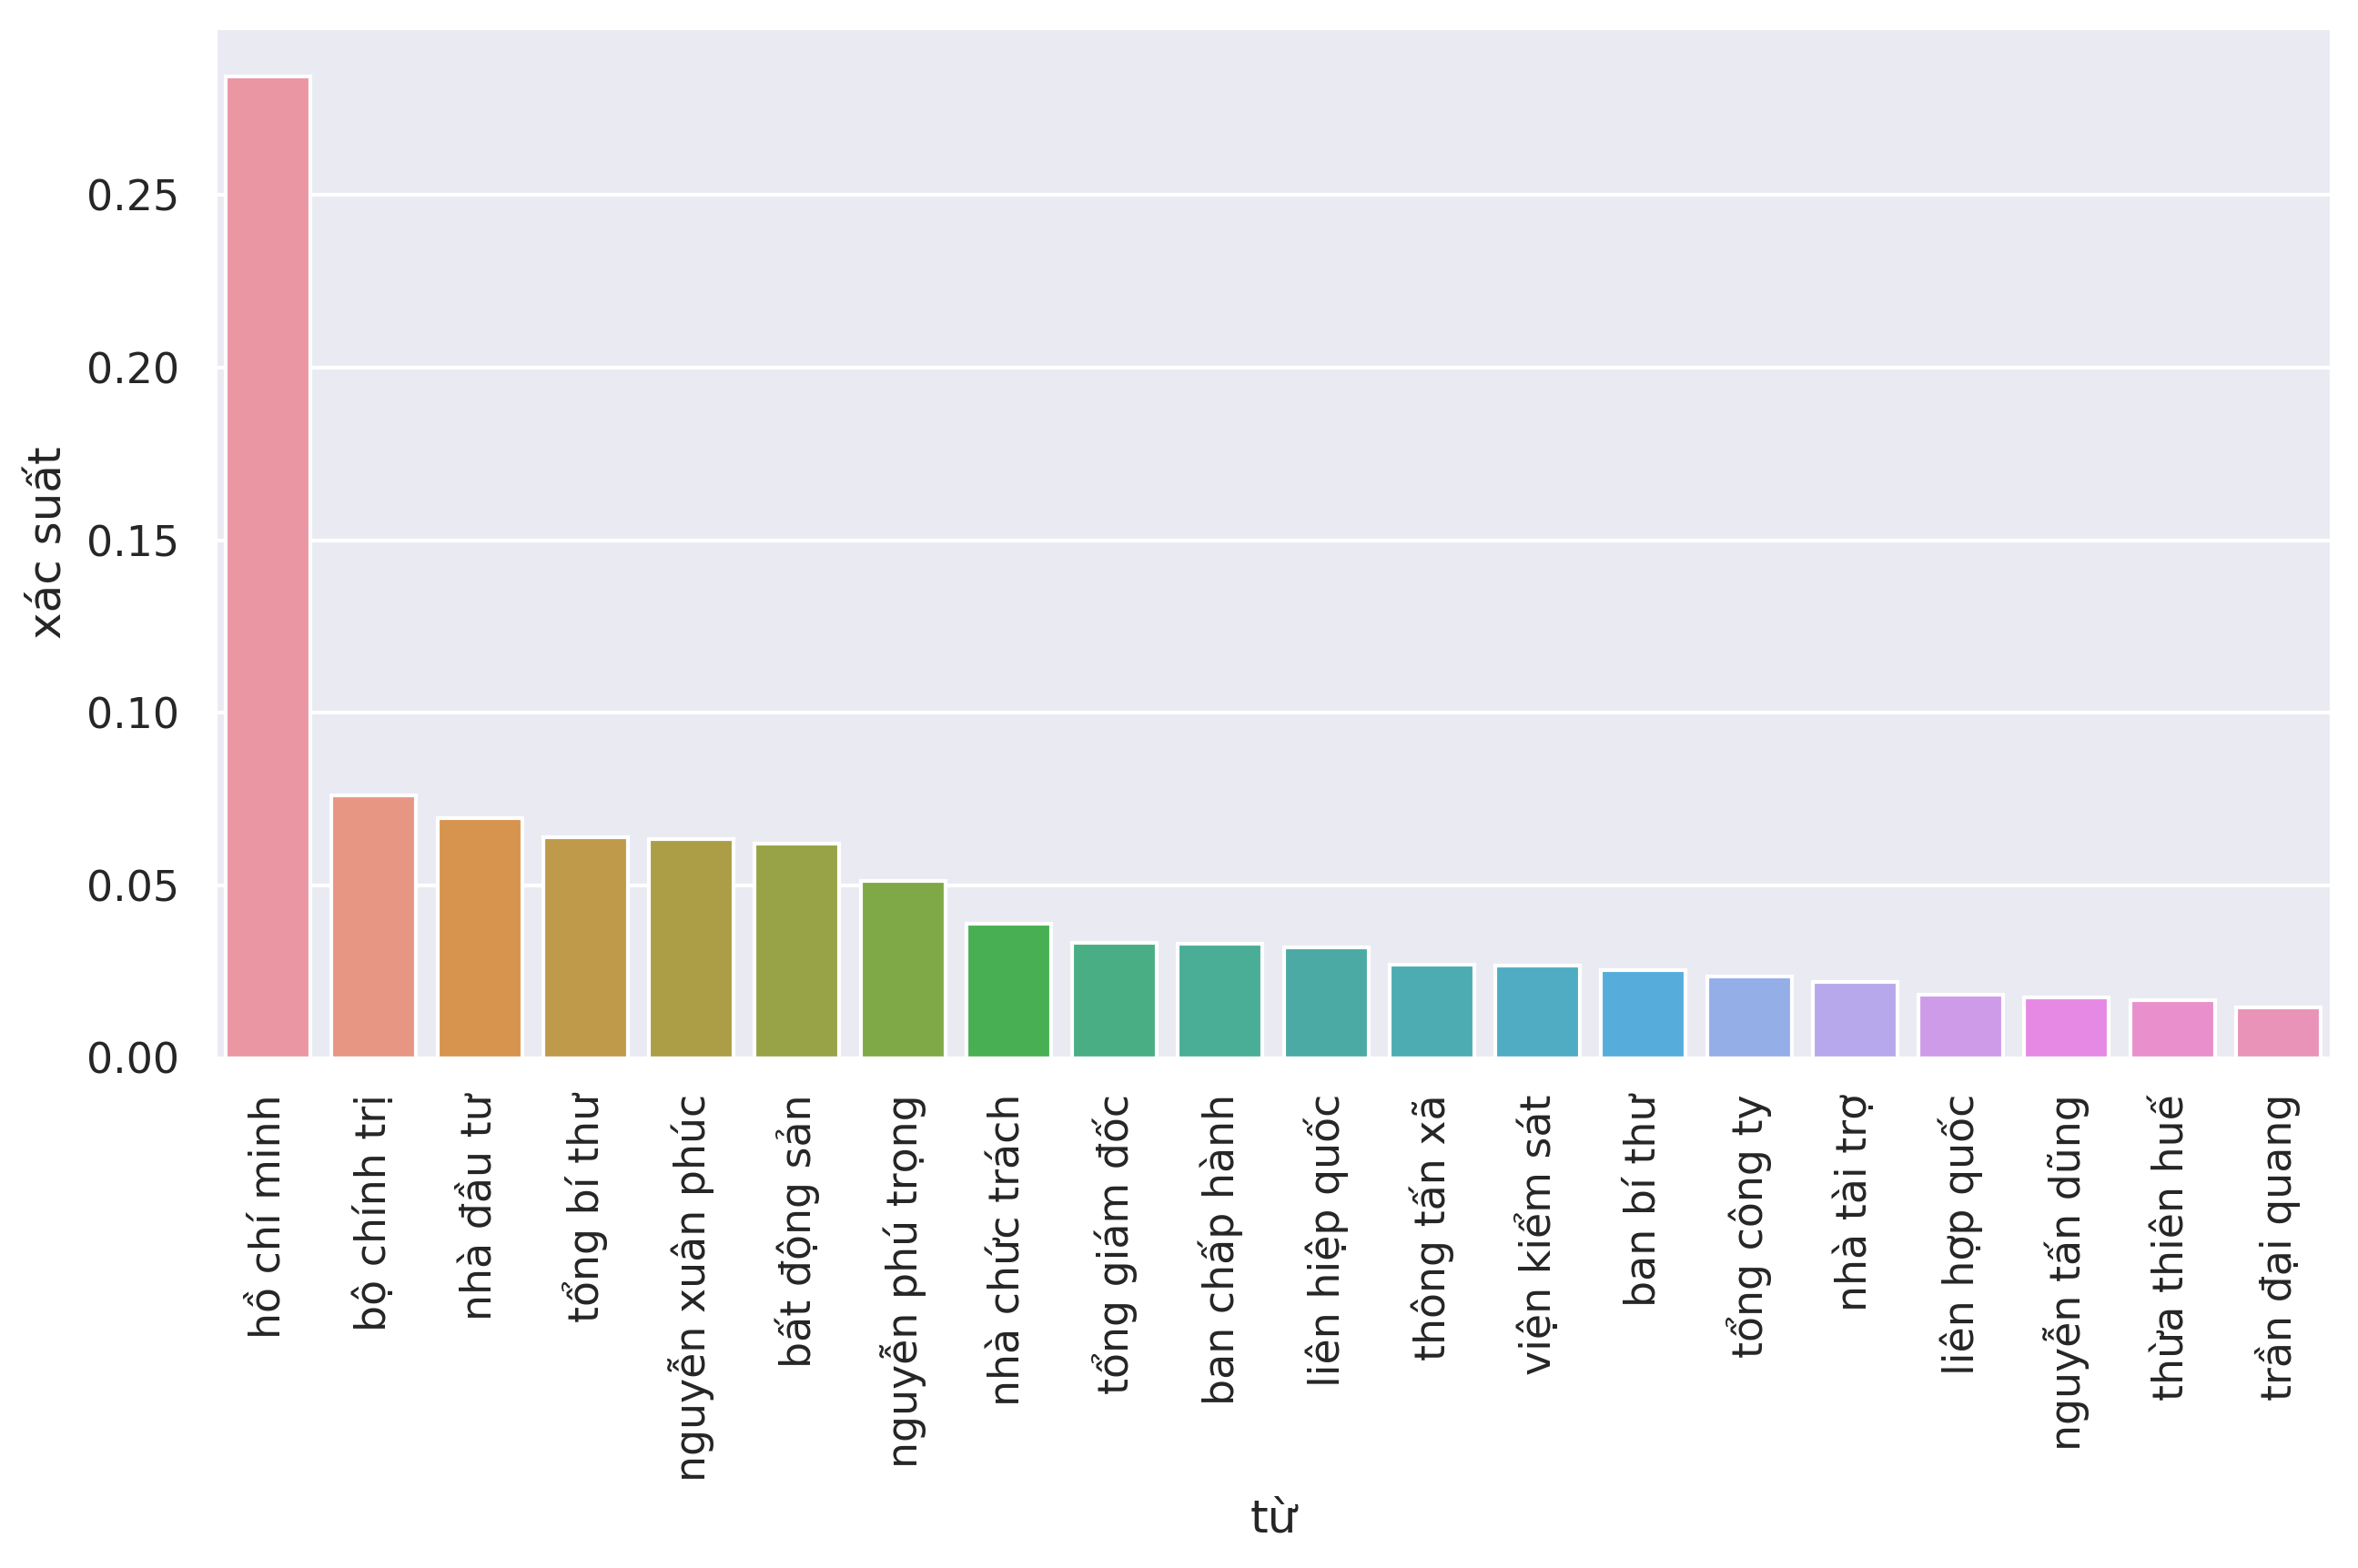

In [ ]:
vocab_nstopwords_3 = get_vocab_ngrams(df, 3)
plot_vocab(vocab_nstopwords_3)

### Chỉ cho nhãn phản động

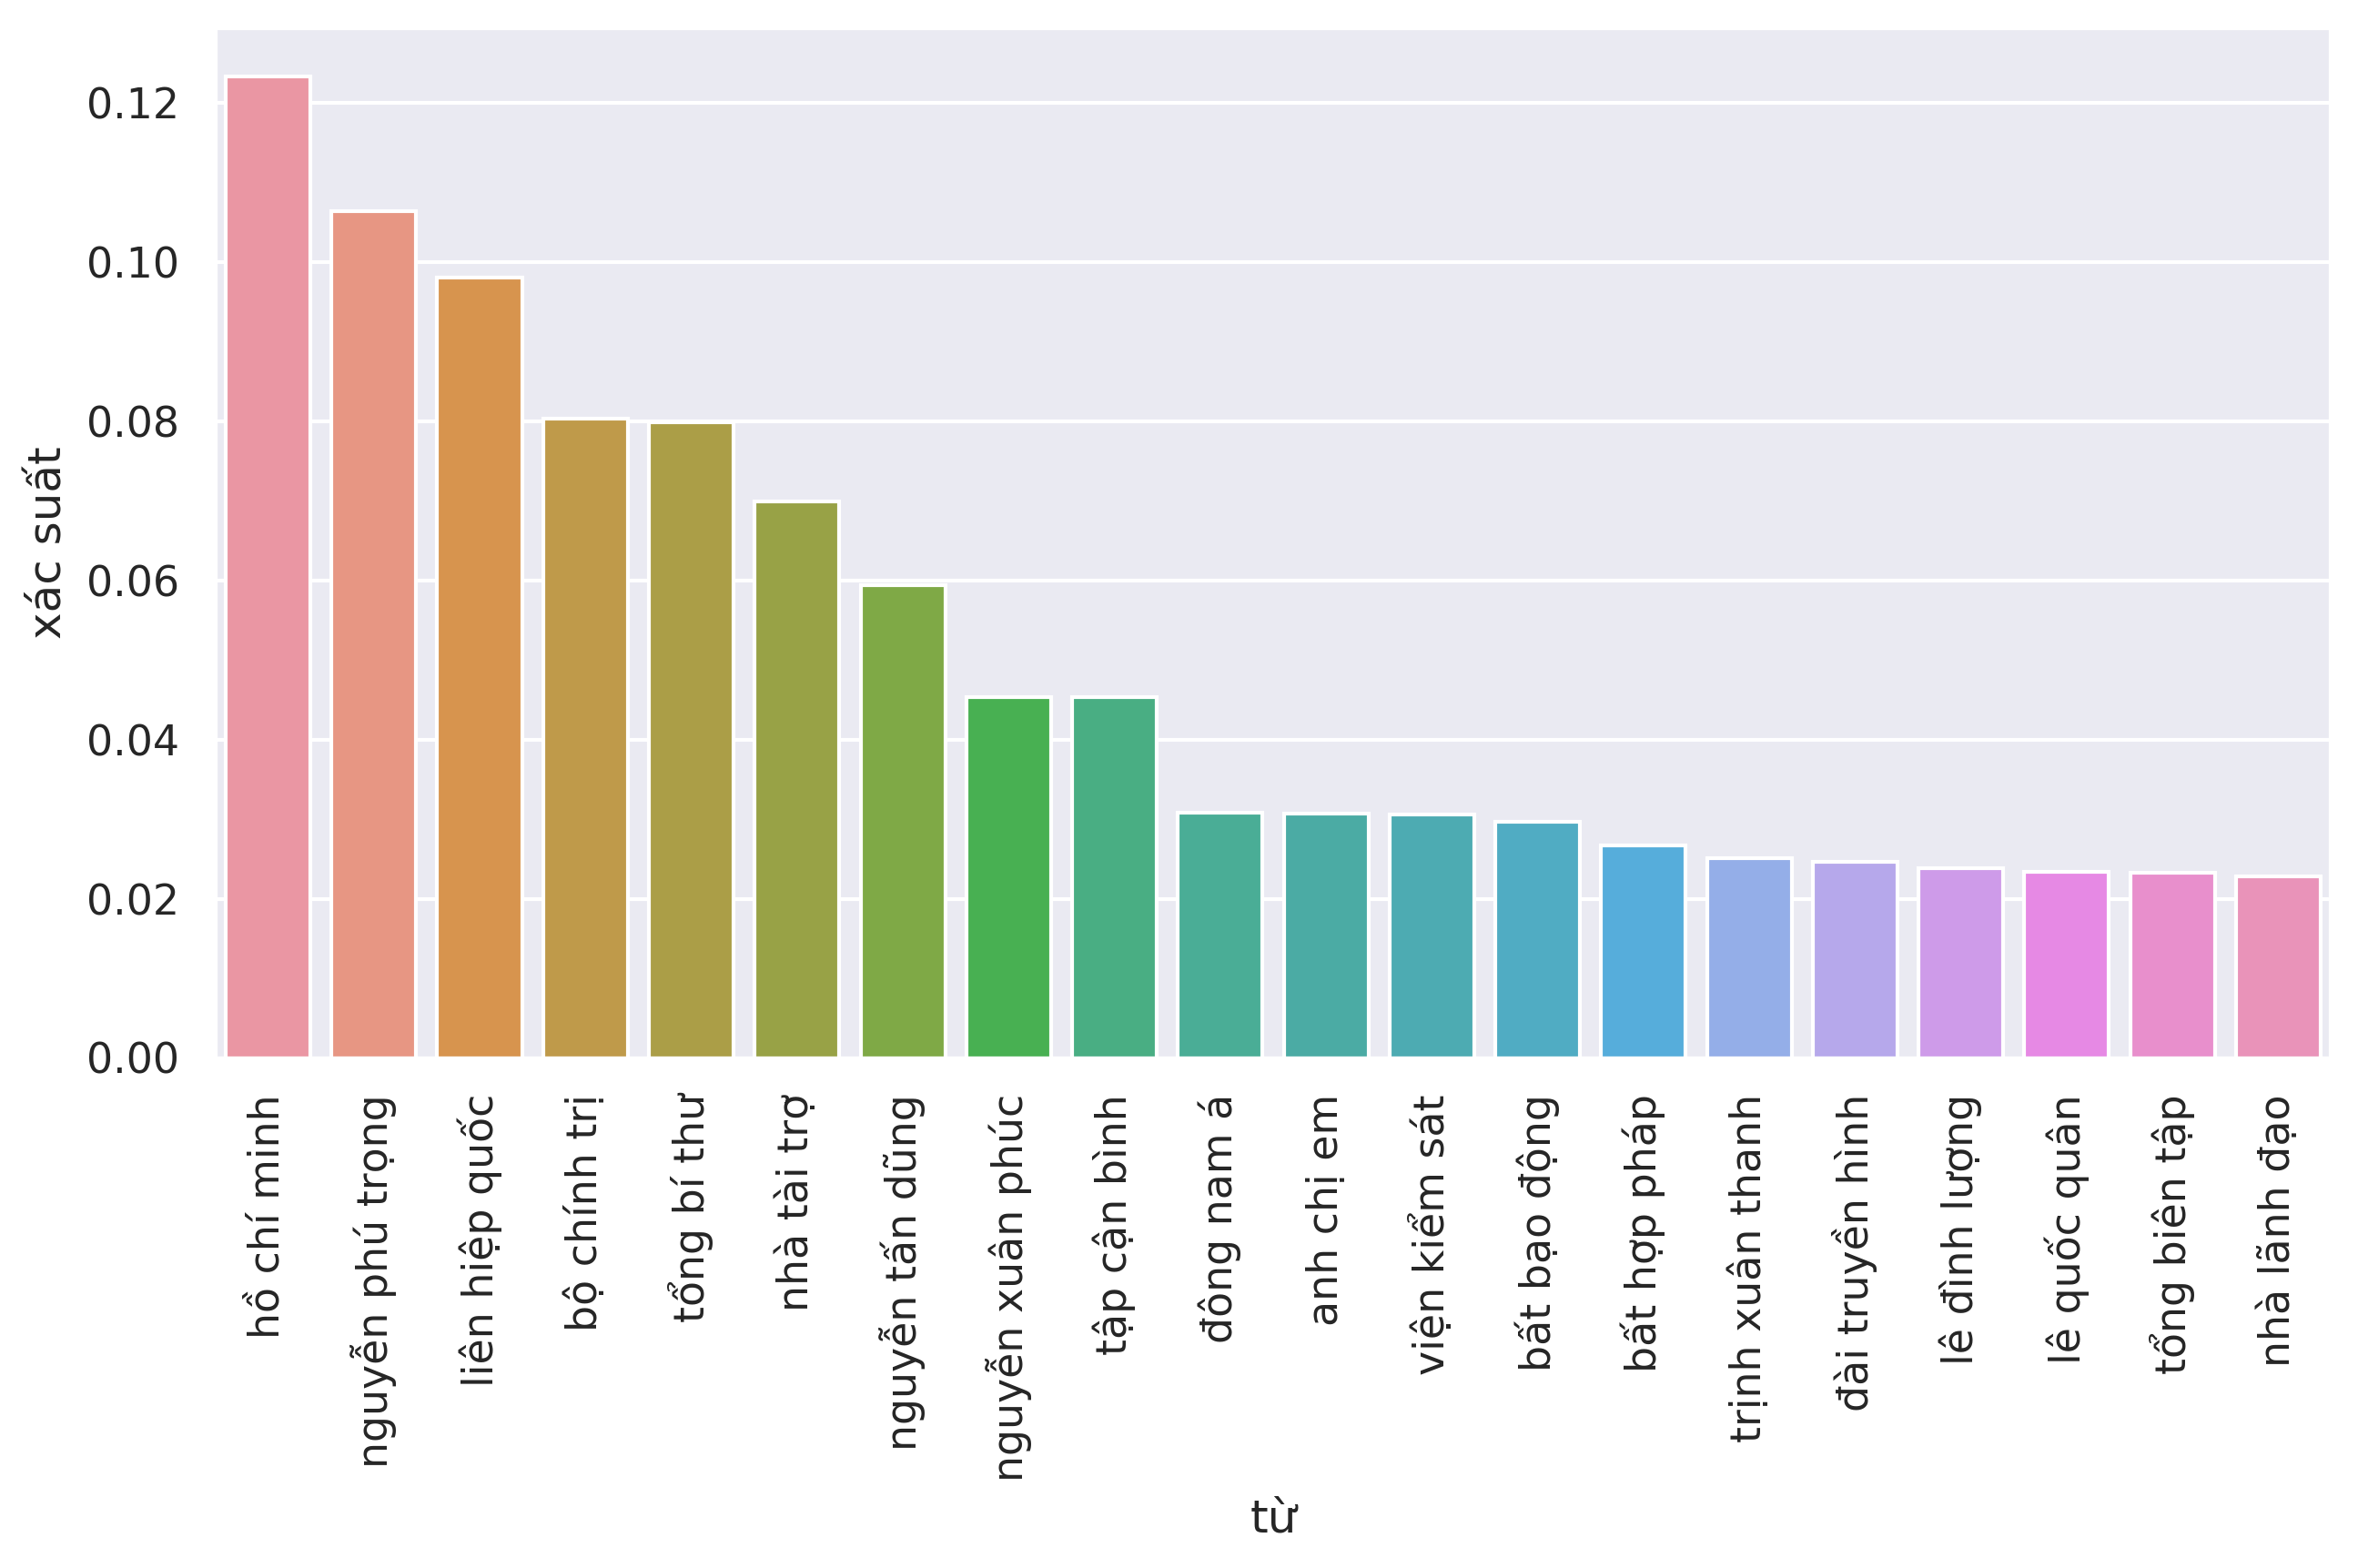

In [ ]:
vocab_nstopwords_3 = get_vocab_ngrams(df, 3, True)
plot_vocab(vocab_nstopwords_3)

## 4-tiếng

### toàn bộ data

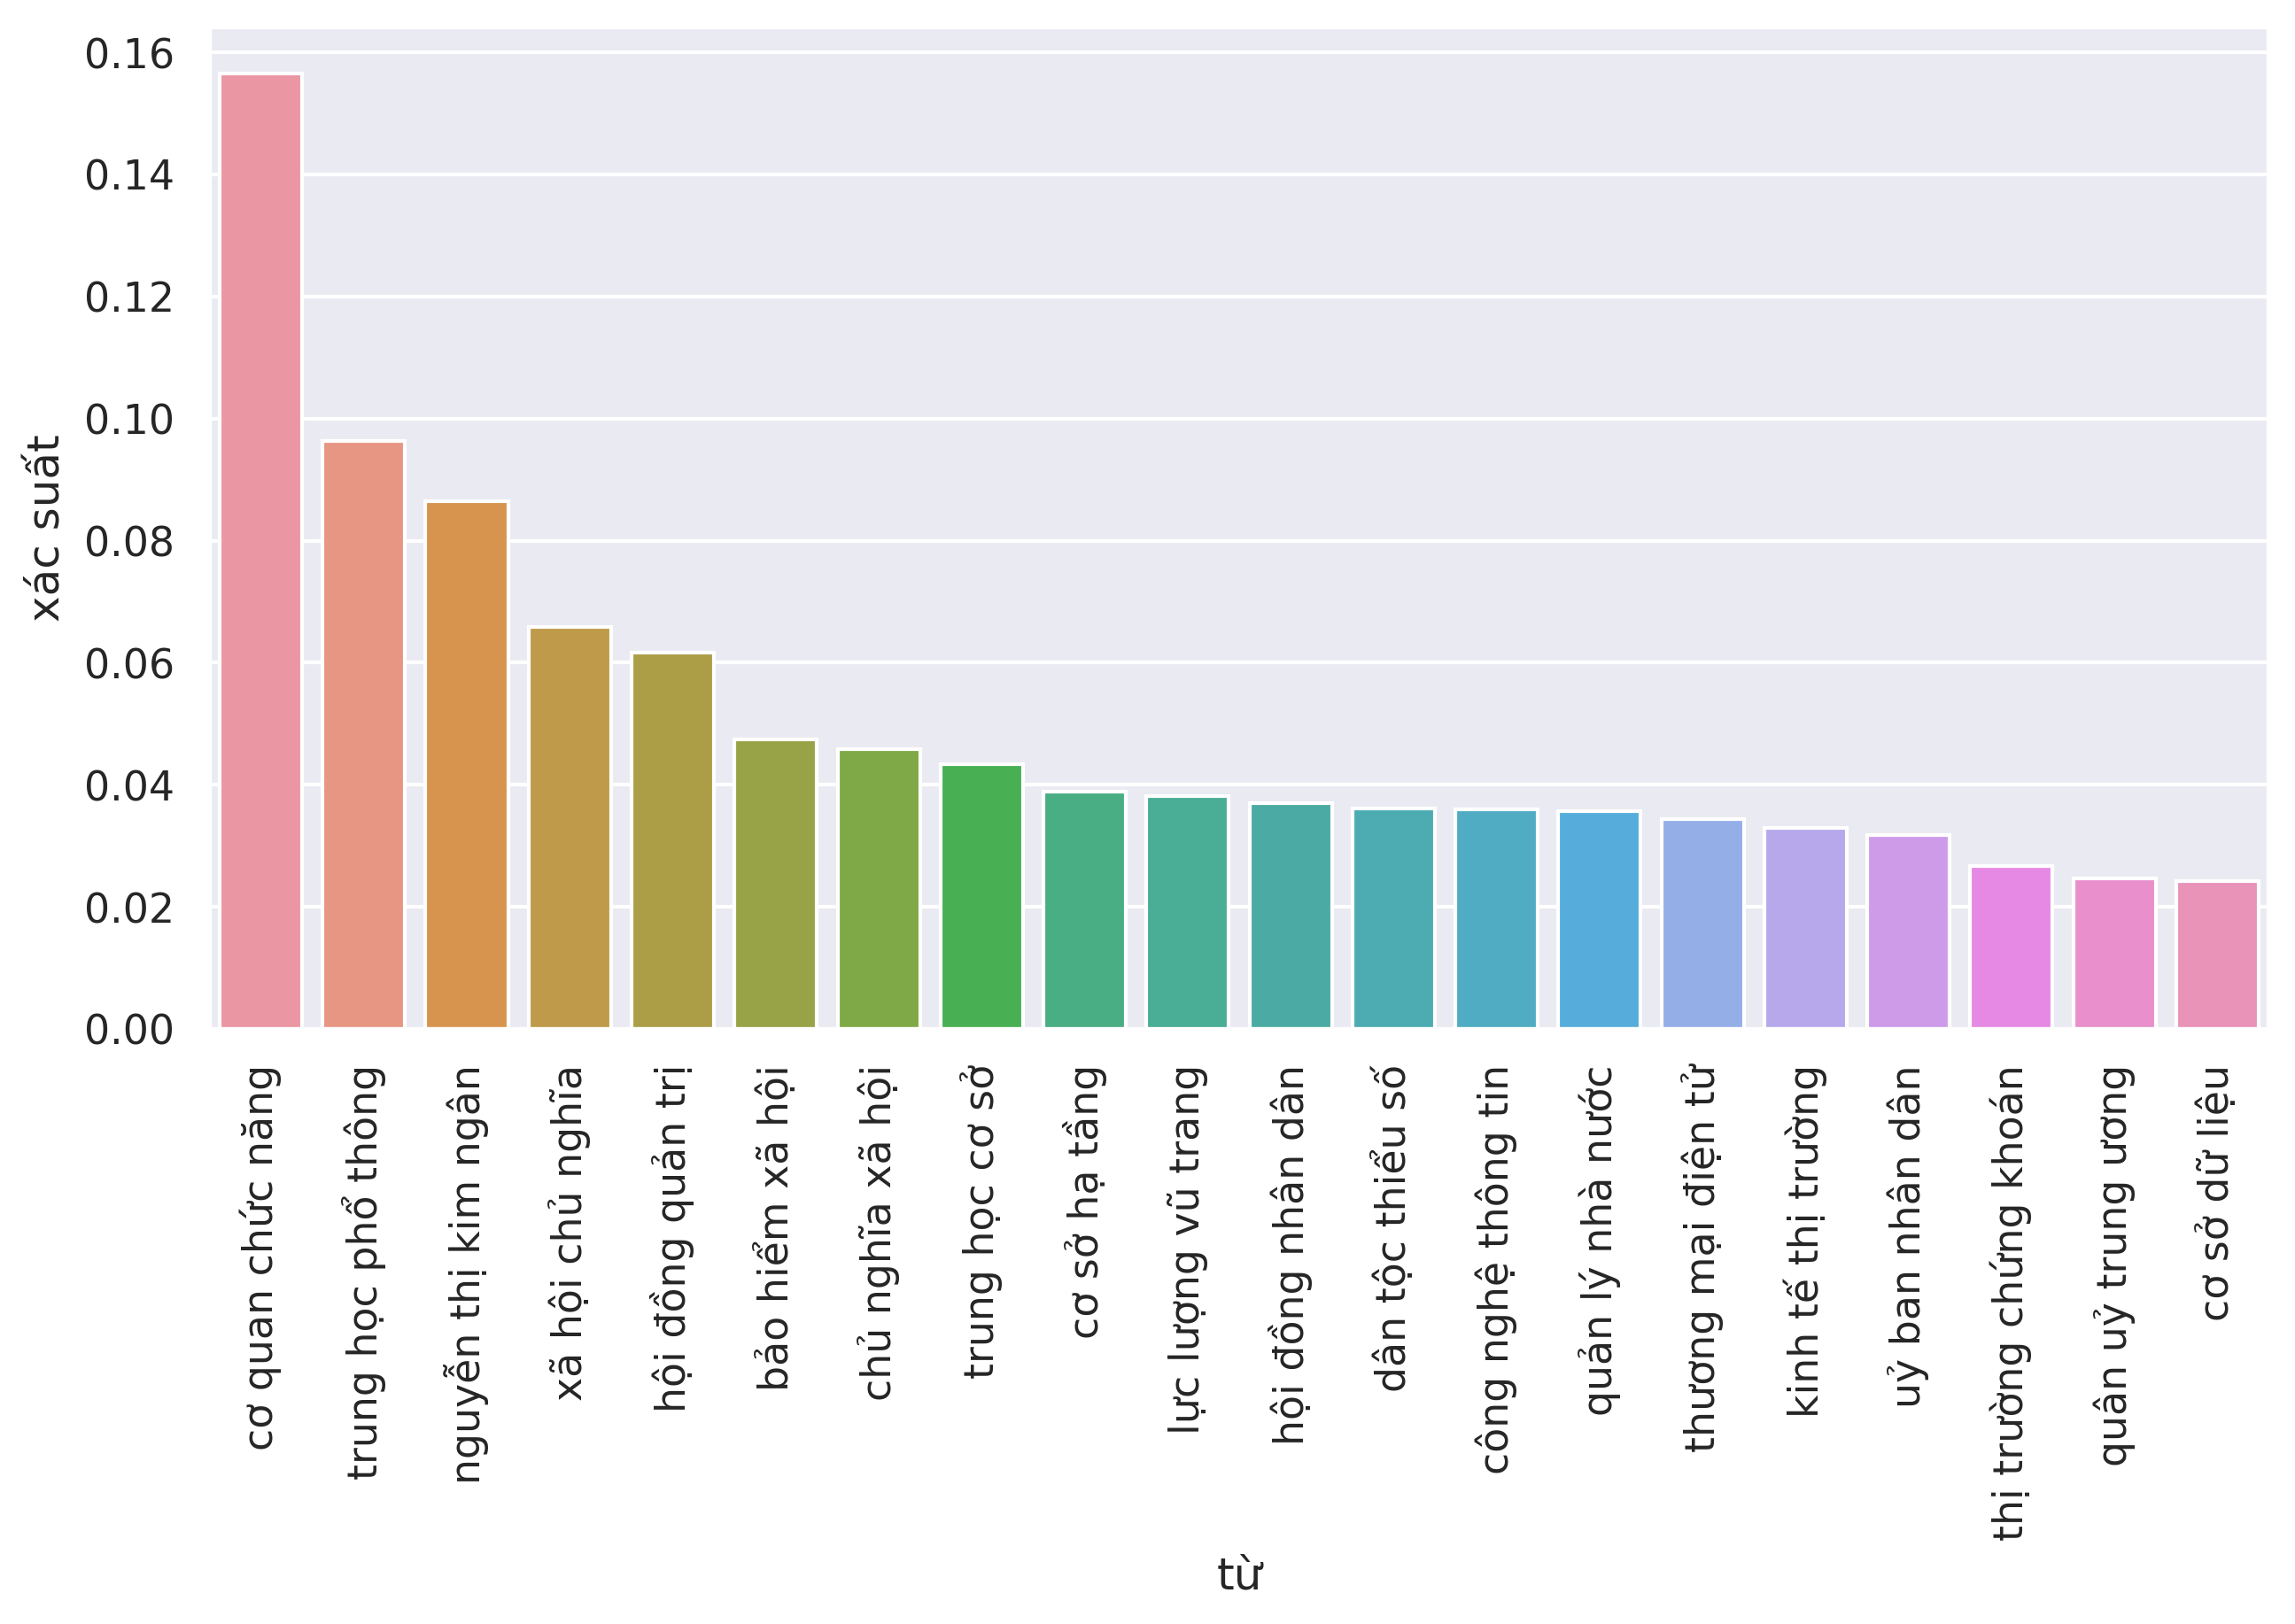

In [ ]:
vocab_nstopwords_4 = get_vocab_ngrams(df, 4)
plot_vocab(vocab_nstopwords_4)

### Chỉ cho nhãn phản động

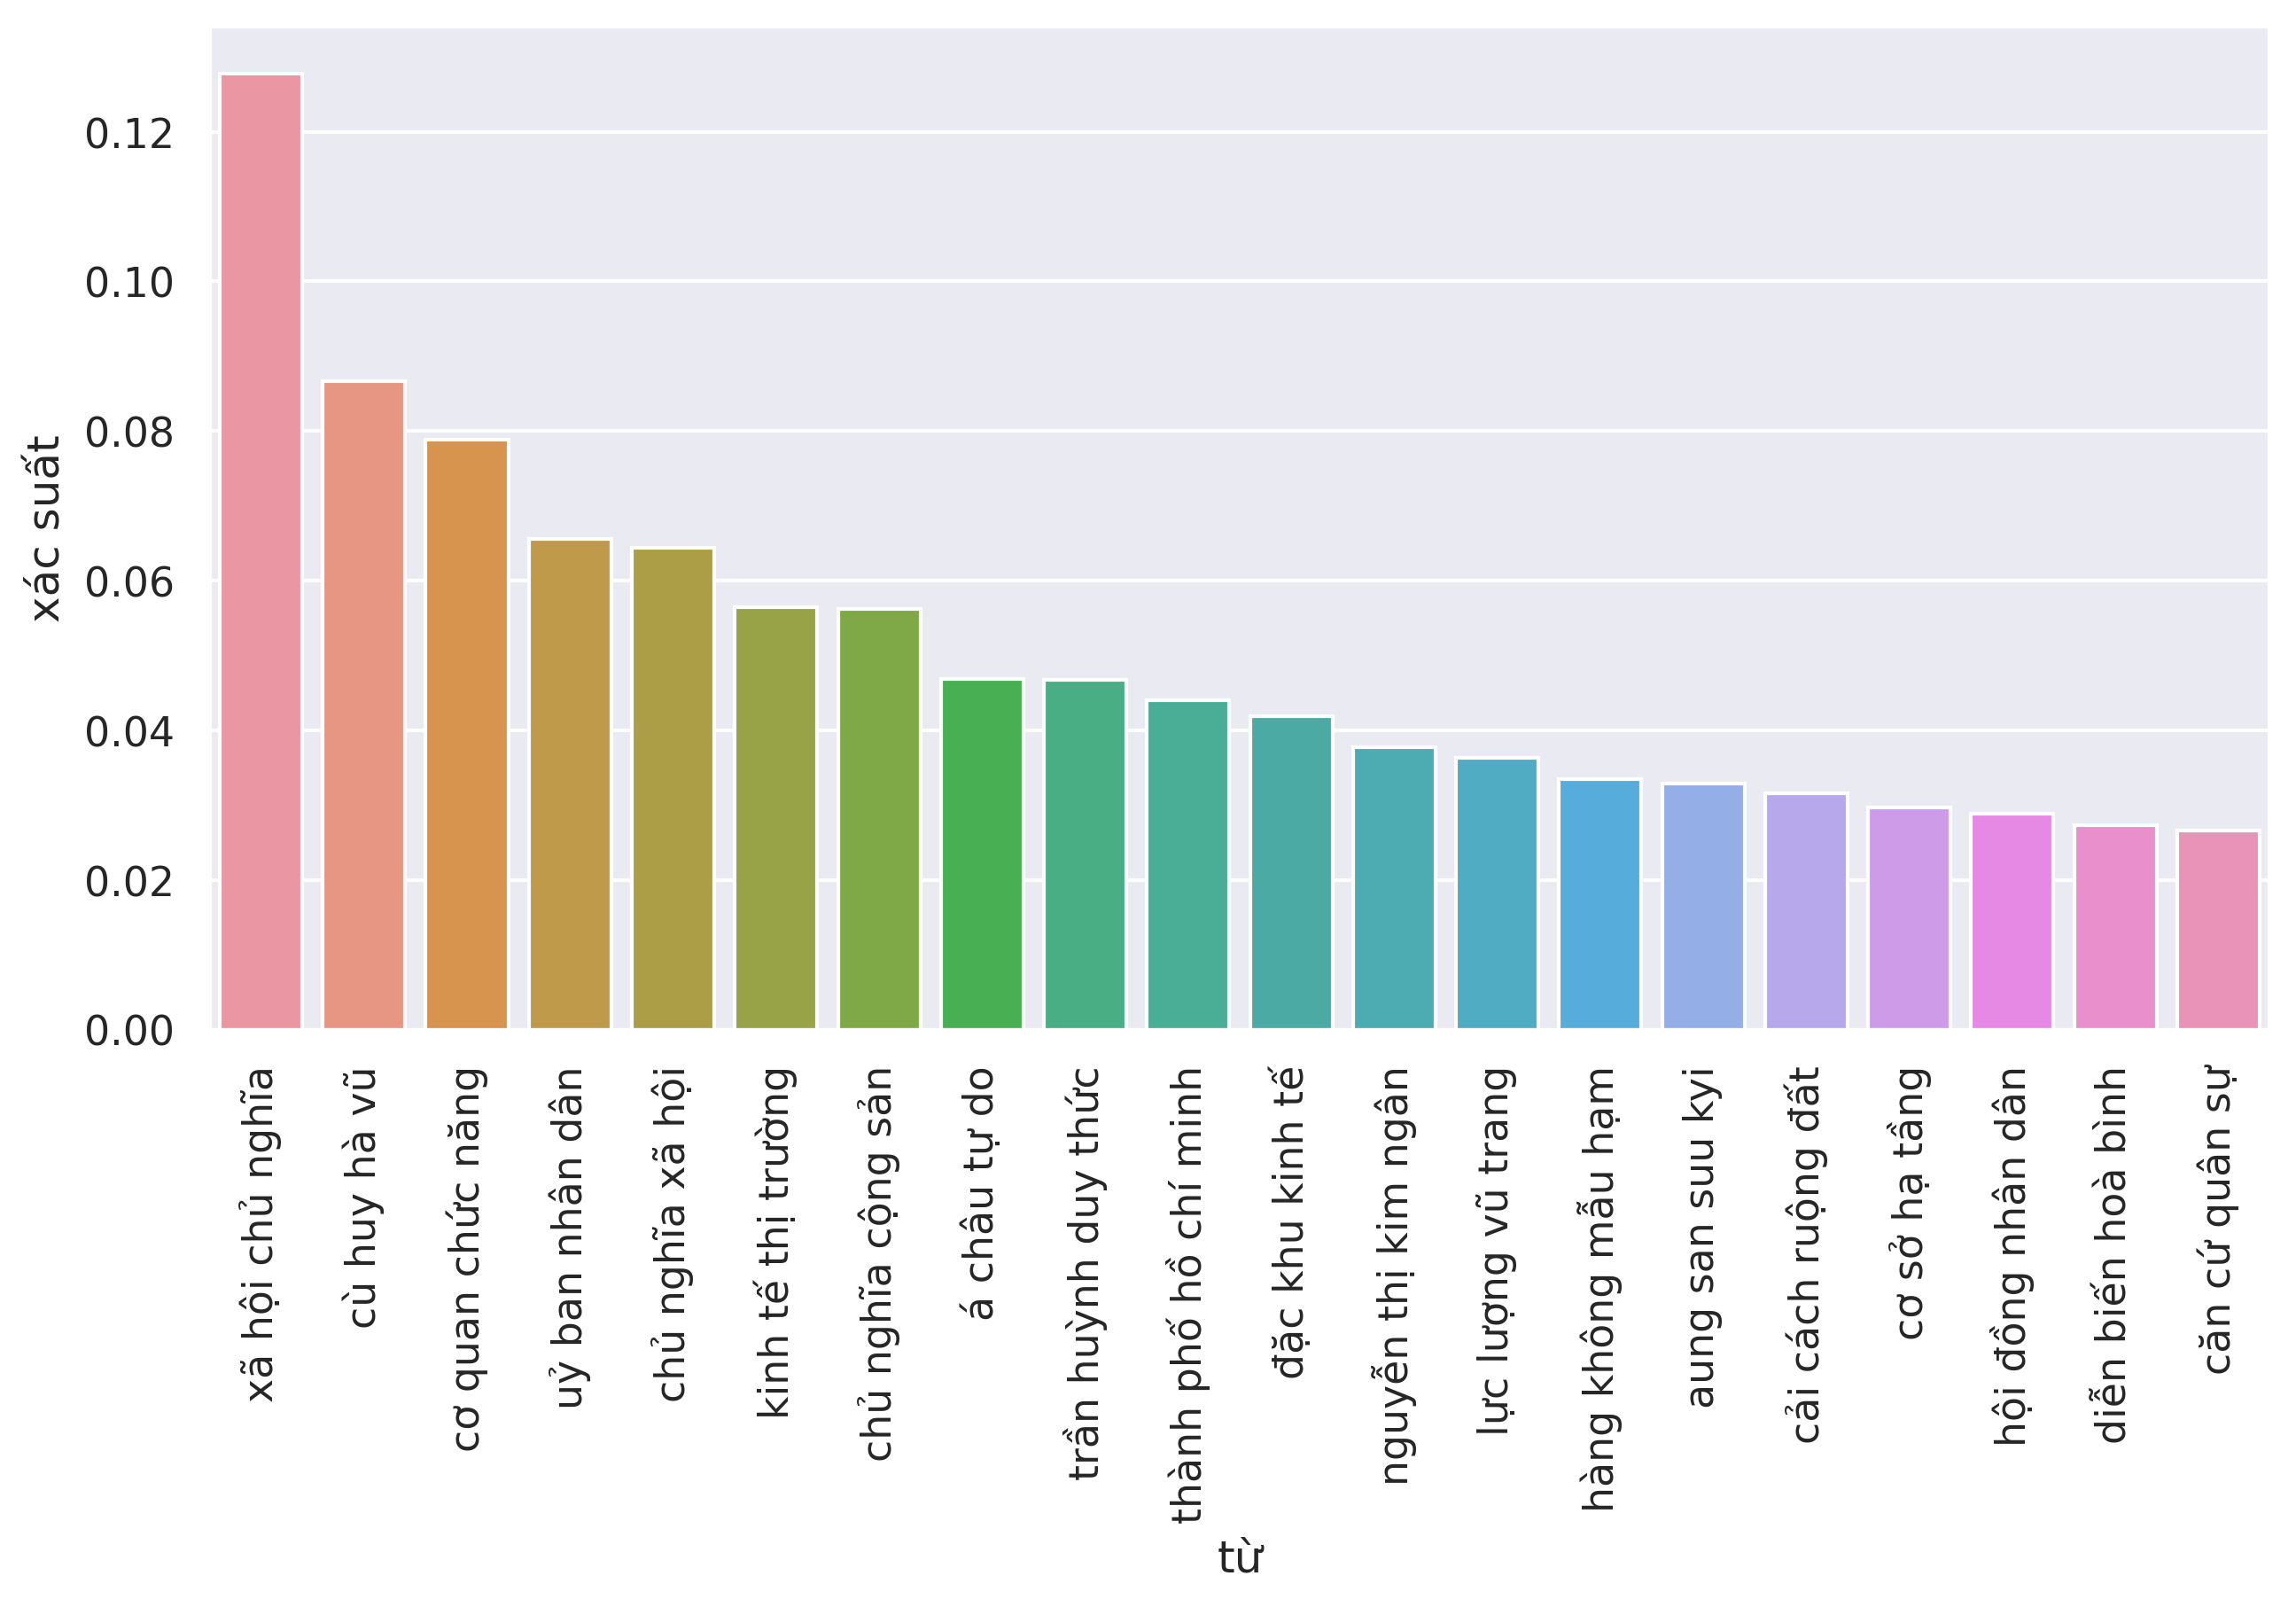

In [ ]:
vocab_nstopwords_4 = get_vocab_ngrams(df, 4, True)
plot_vocab(vocab_nstopwords_4)

# Phân cụm Topic modeling

## Clean memory

In [ ]:
df = df.drop(['avg_length', 'word_sep', 'word_length', 'sen_length', 'syl_sep', 'syl_length'], axis = 1)

In [ ]:
import gc

In [ ]:
del vocab
del vocab_nstopwords
del vocab_nstopwords_1 
del vocab_nstopwords_2 
del vocab_nstopwords_3 
del vocab_nstopwords_4
del vocab_syl
del vocab_syl_nstopwords

gc.collect()

45899

## Bag of words and LDA models (all datasets)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

### Bag of words

In [ ]:
df['sen_word_seg_lower'].str.replace('tp', 'thành phố')
tf_vectorizer = CountVectorizer(stop_words= list(stopwords))
tf = tf_vectorizer.fit_transform(df['sen_word_seg_lower'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bao', 'bay', 'biến', 'biệt', 'bây', 'bõm', 'bảo', 'bất', 'bẩy', 'bập', 'bắt', 'bội', 'chao', 'chi', 'chia', 'chu', 'chui', 'chuẩn', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'coi', 'cu', 'cá', 'câu', 'cóc', 'công', 'cạnh', 'cảm', 'cầu', 'cật', 'cắt', 'cổ', 'cụ', 'cục', 'cực', 'da', 'dà', 'dĩ', 'dưng', 'dần', 'dầu', 'dịp', 'dở', 'dụng', 'gian', 'giá', 'giác', 'giời', 'ha', 'hiện', 'hoàn', 'hèn', 'hình', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hỗ', 'hội', 'hợp', 'hự', 'khói', 'khô', 'khăn', 'khắc', 'khẳng', 'kia', 'kiện', 'kê', 'kì', 'kìa', 'kỳ', 'lai', 'le', 'liên', 'liệt', 'loạt', 'luận', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lập', 'lẽ', 'lị', 'lự', 'lực', 'mày', 'mòi', 'mù', 'mạng'

### LDA

In [ ]:
lda = LatentDirichletAllocation(n_components= 10,
                                learning_method='batch',
                                verbose = 3, n_jobs = 2)

lda_matrix = lda.fit_transform(tf)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   58.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   53.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   50.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   48.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   47.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   46.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   45.8s finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   40.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   40.0s finished


In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    """
    https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
    """
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i].replace('_', ' ') for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


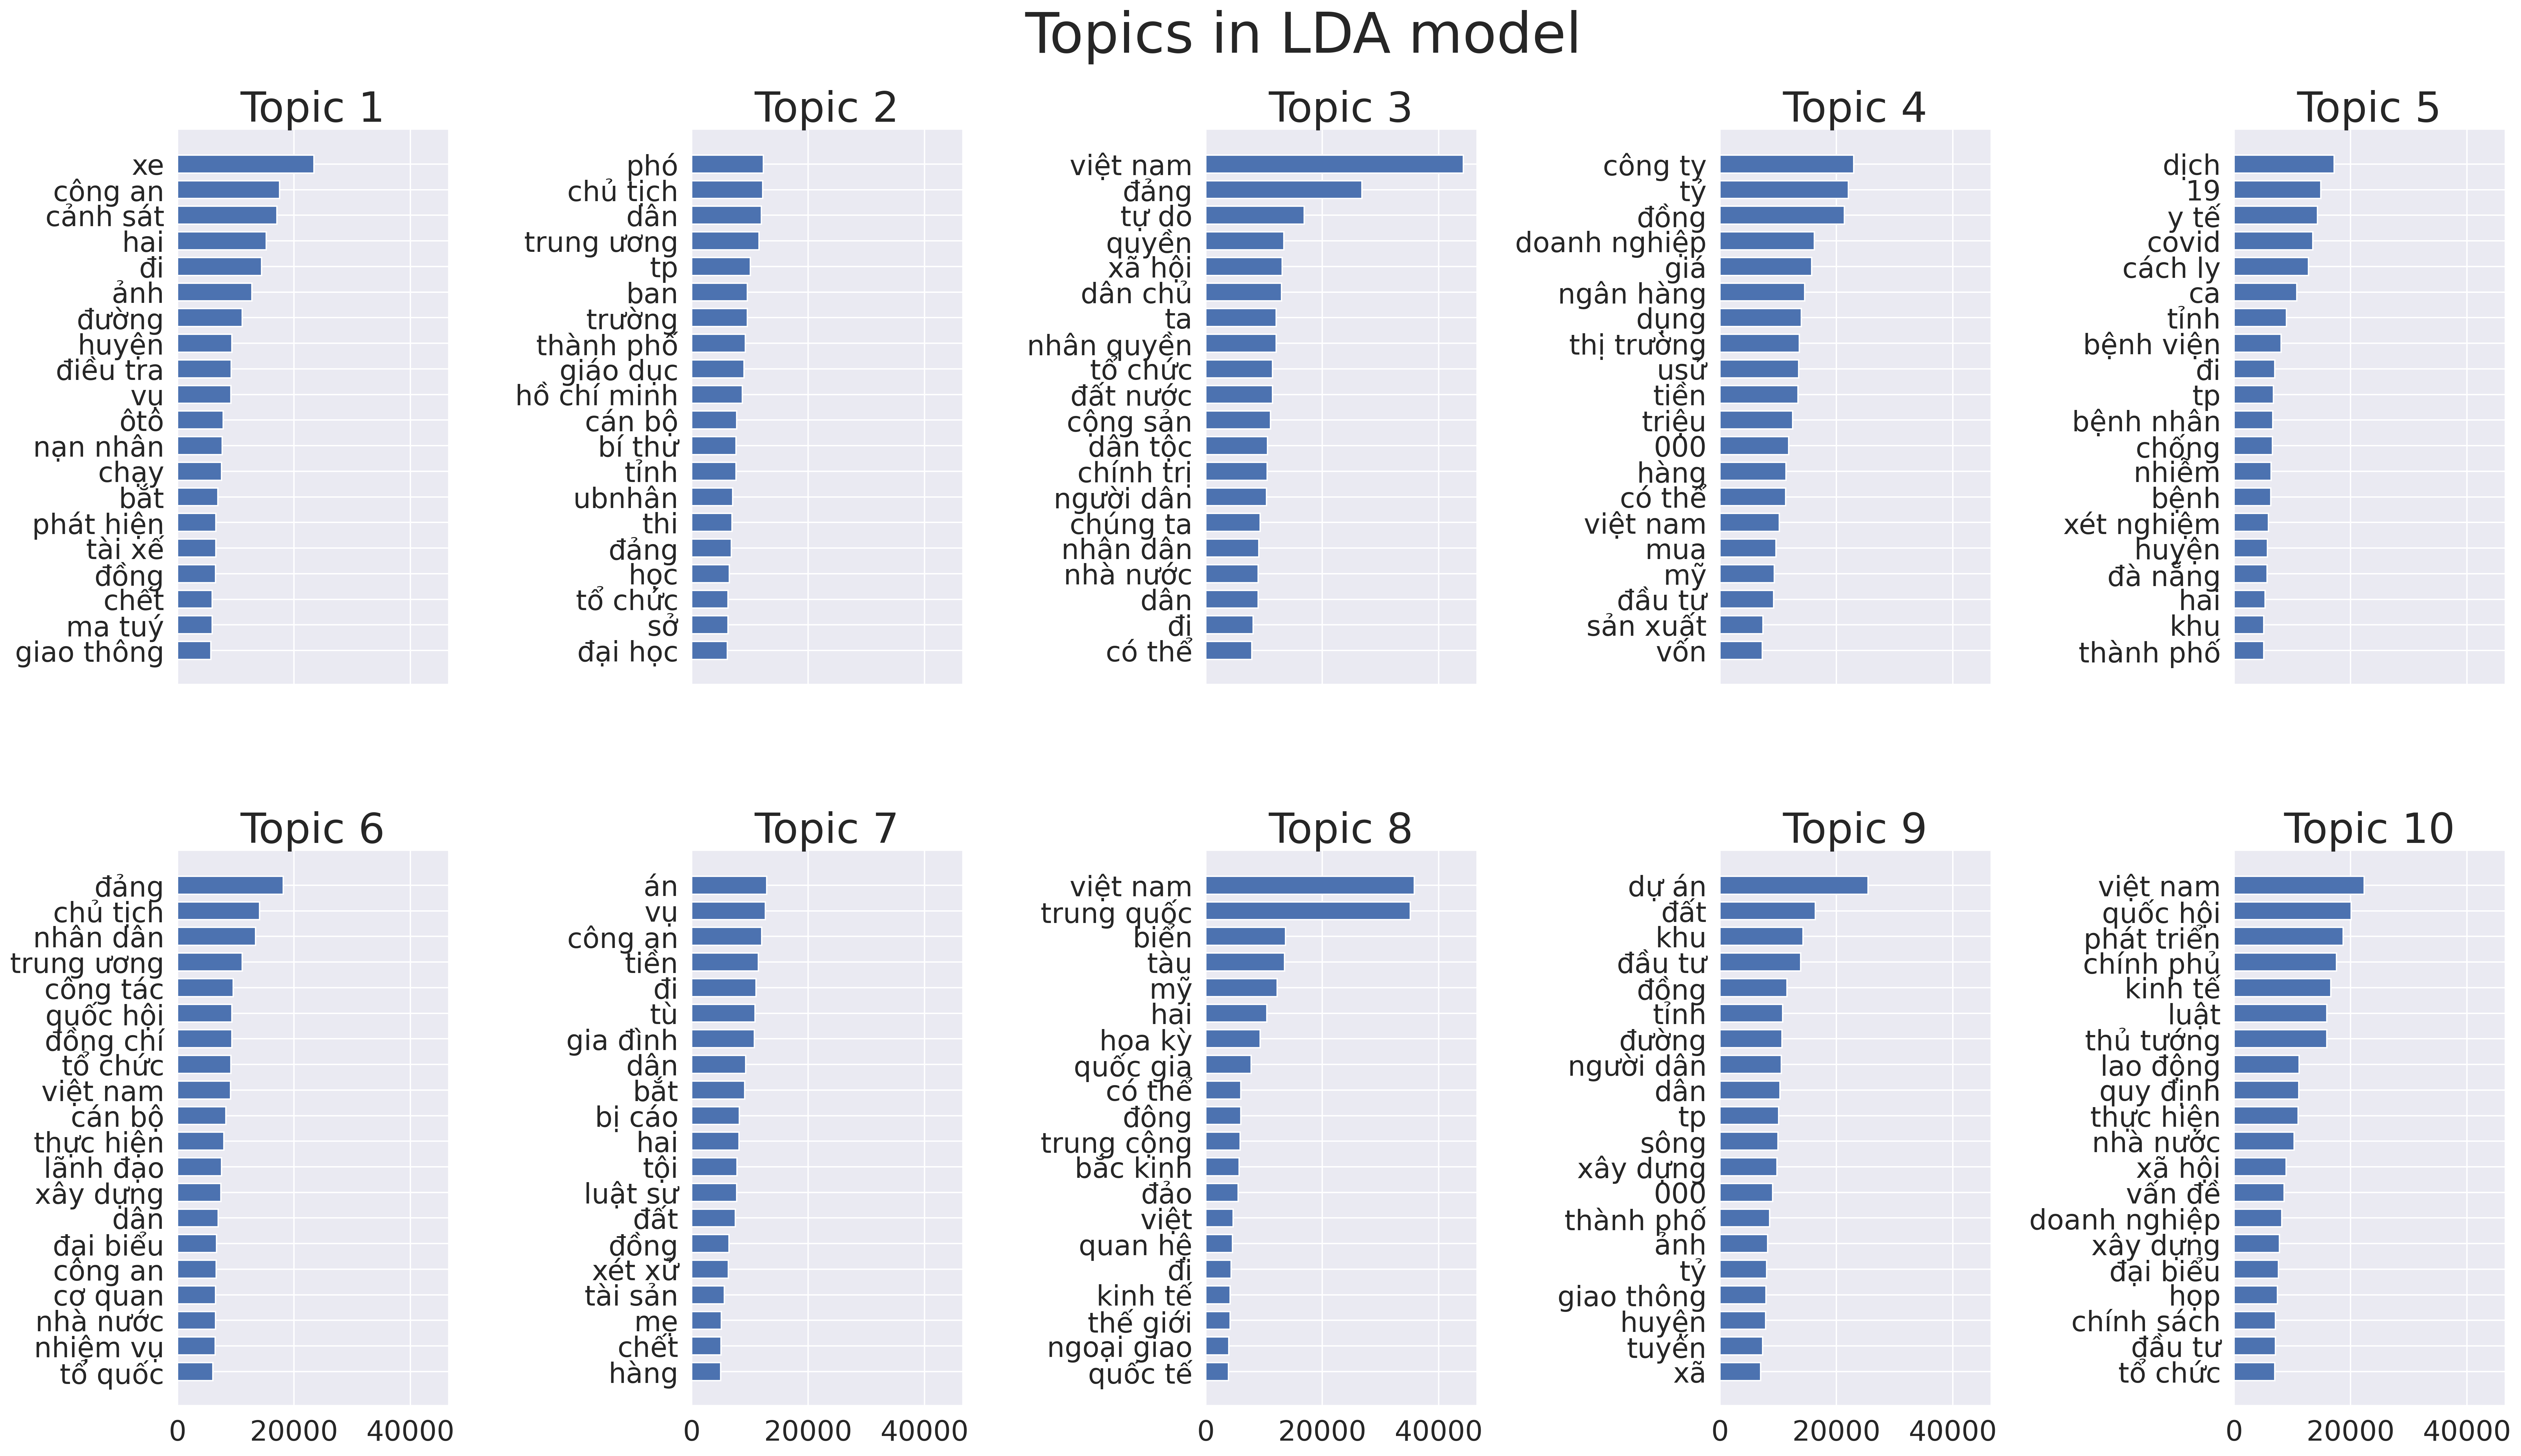

In [ ]:
n_features = 1000
n_components = 10
n_top_words = 20

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')


In [ ]:
features = pd.DataFrame(lda_matrix,columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'])

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 10, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_

df['cluster'] = cluster_labels

### Kết quả của clustering

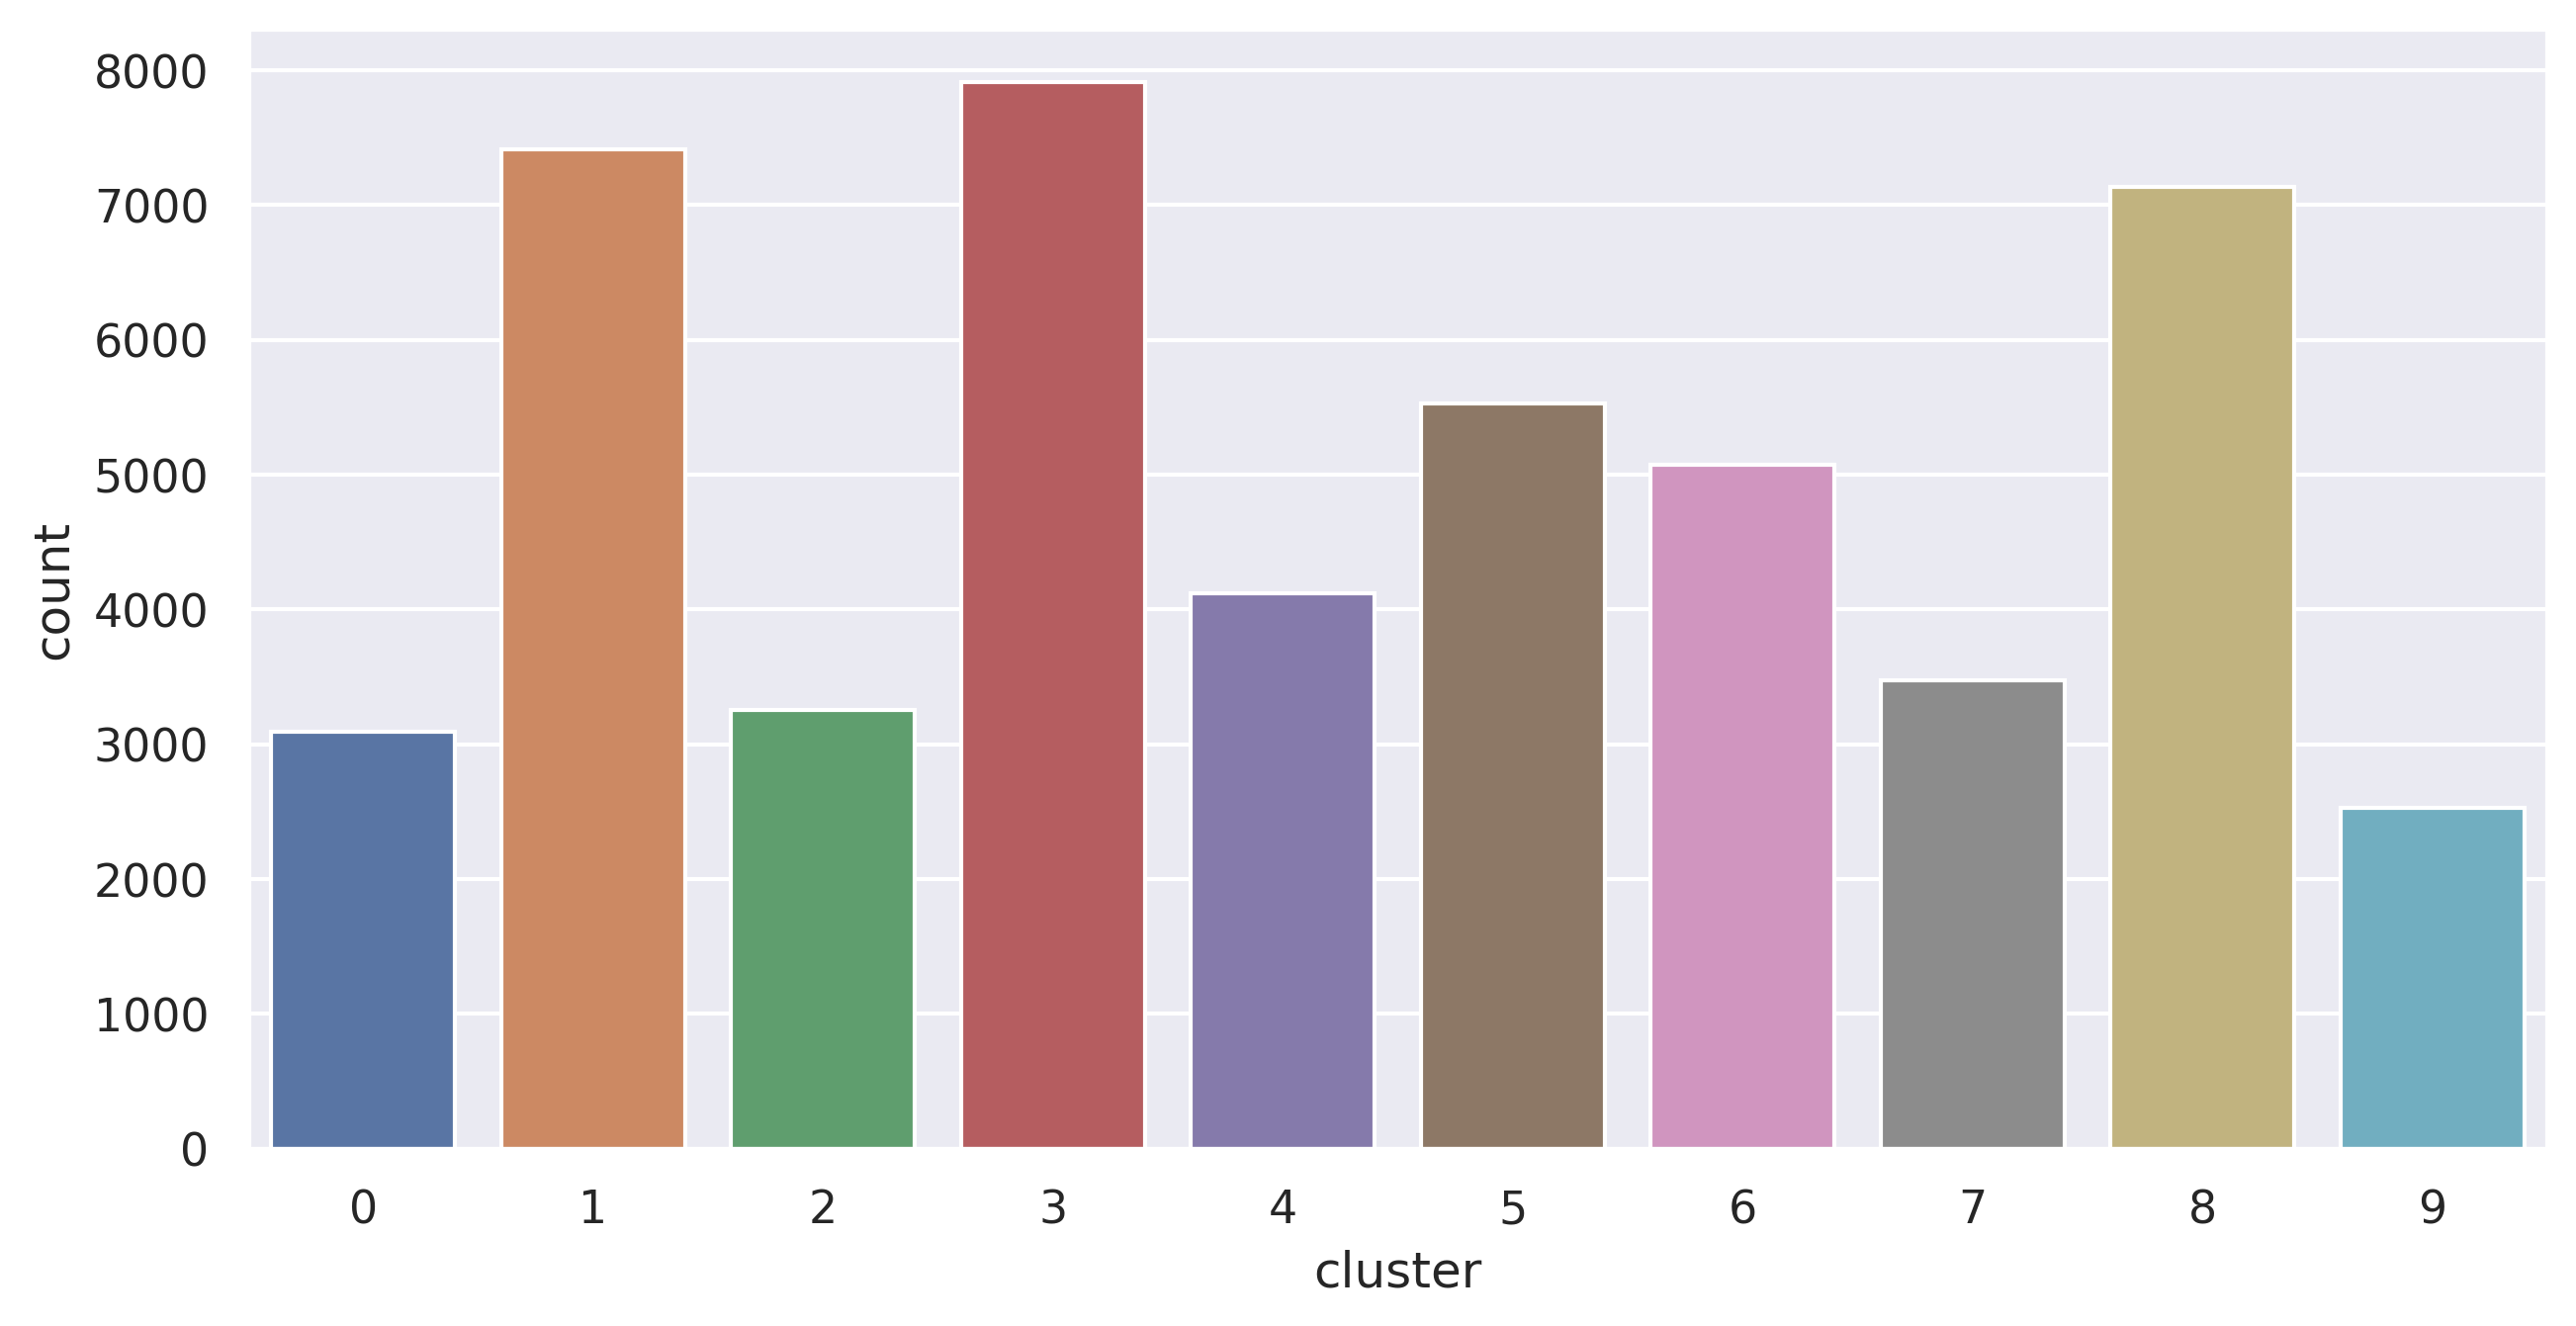

In [ ]:
sns.countplot(x = 'cluster', data = df)
plt.show()

## Bag of words and LDA models (label 1)

### Bag of words

In [ ]:
df['sen_word_seg_lower'].str.replace('tp', 'thành phố')
tf_vectorizer = CountVectorizer(stop_words= list(stopwords))
tf = tf_vectorizer.fit_transform(df[df['label'] == 1]['sen_word_seg_lower'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bao', 'bay', 'biến', 'biệt', 'bây', 'bõm', 'bảo', 'bất', 'bẩy', 'bập', 'bắt', 'bội', 'chao', 'chi', 'chia', 'chu', 'chui', 'chuẩn', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'coi', 'cu', 'cá', 'câu', 'cóc', 'công', 'cạnh', 'cảm', 'cầu', 'cật', 'cắt', 'cổ', 'cụ', 'cục', 'cực', 'da', 'dà', 'dĩ', 'dưng', 'dần', 'dầu', 'dịp', 'dở', 'dụng', 'gian', 'giá', 'giác', 'giời', 'ha', 'hiện', 'hoàn', 'hèn', 'hình', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hỗ', 'hội', 'hợp', 'hự', 'khói', 'khô', 'khăn', 'khắc', 'khẳng', 'kia', 'kiện', 'kê', 'kì', 'kìa', 'kỳ', 'lai', 'le', 'liên', 'liệt', 'loạt', 'luận', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lập', 'lẽ', 'lị', 'lự', 'lực', 'mày', 'mòi', 'mù', 'mạng'

### LDA

In [ ]:
lda = LatentDirichletAllocation(n_components= 10,
                                learning_method='batch',
                                verbose = 3, n_jobs = 2)

features = lda.fit(tf)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   36.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   30.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   25.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   22.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   19.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   19.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   18.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   18.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


iteration: 10 of max_iter: 10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   15.4s finished


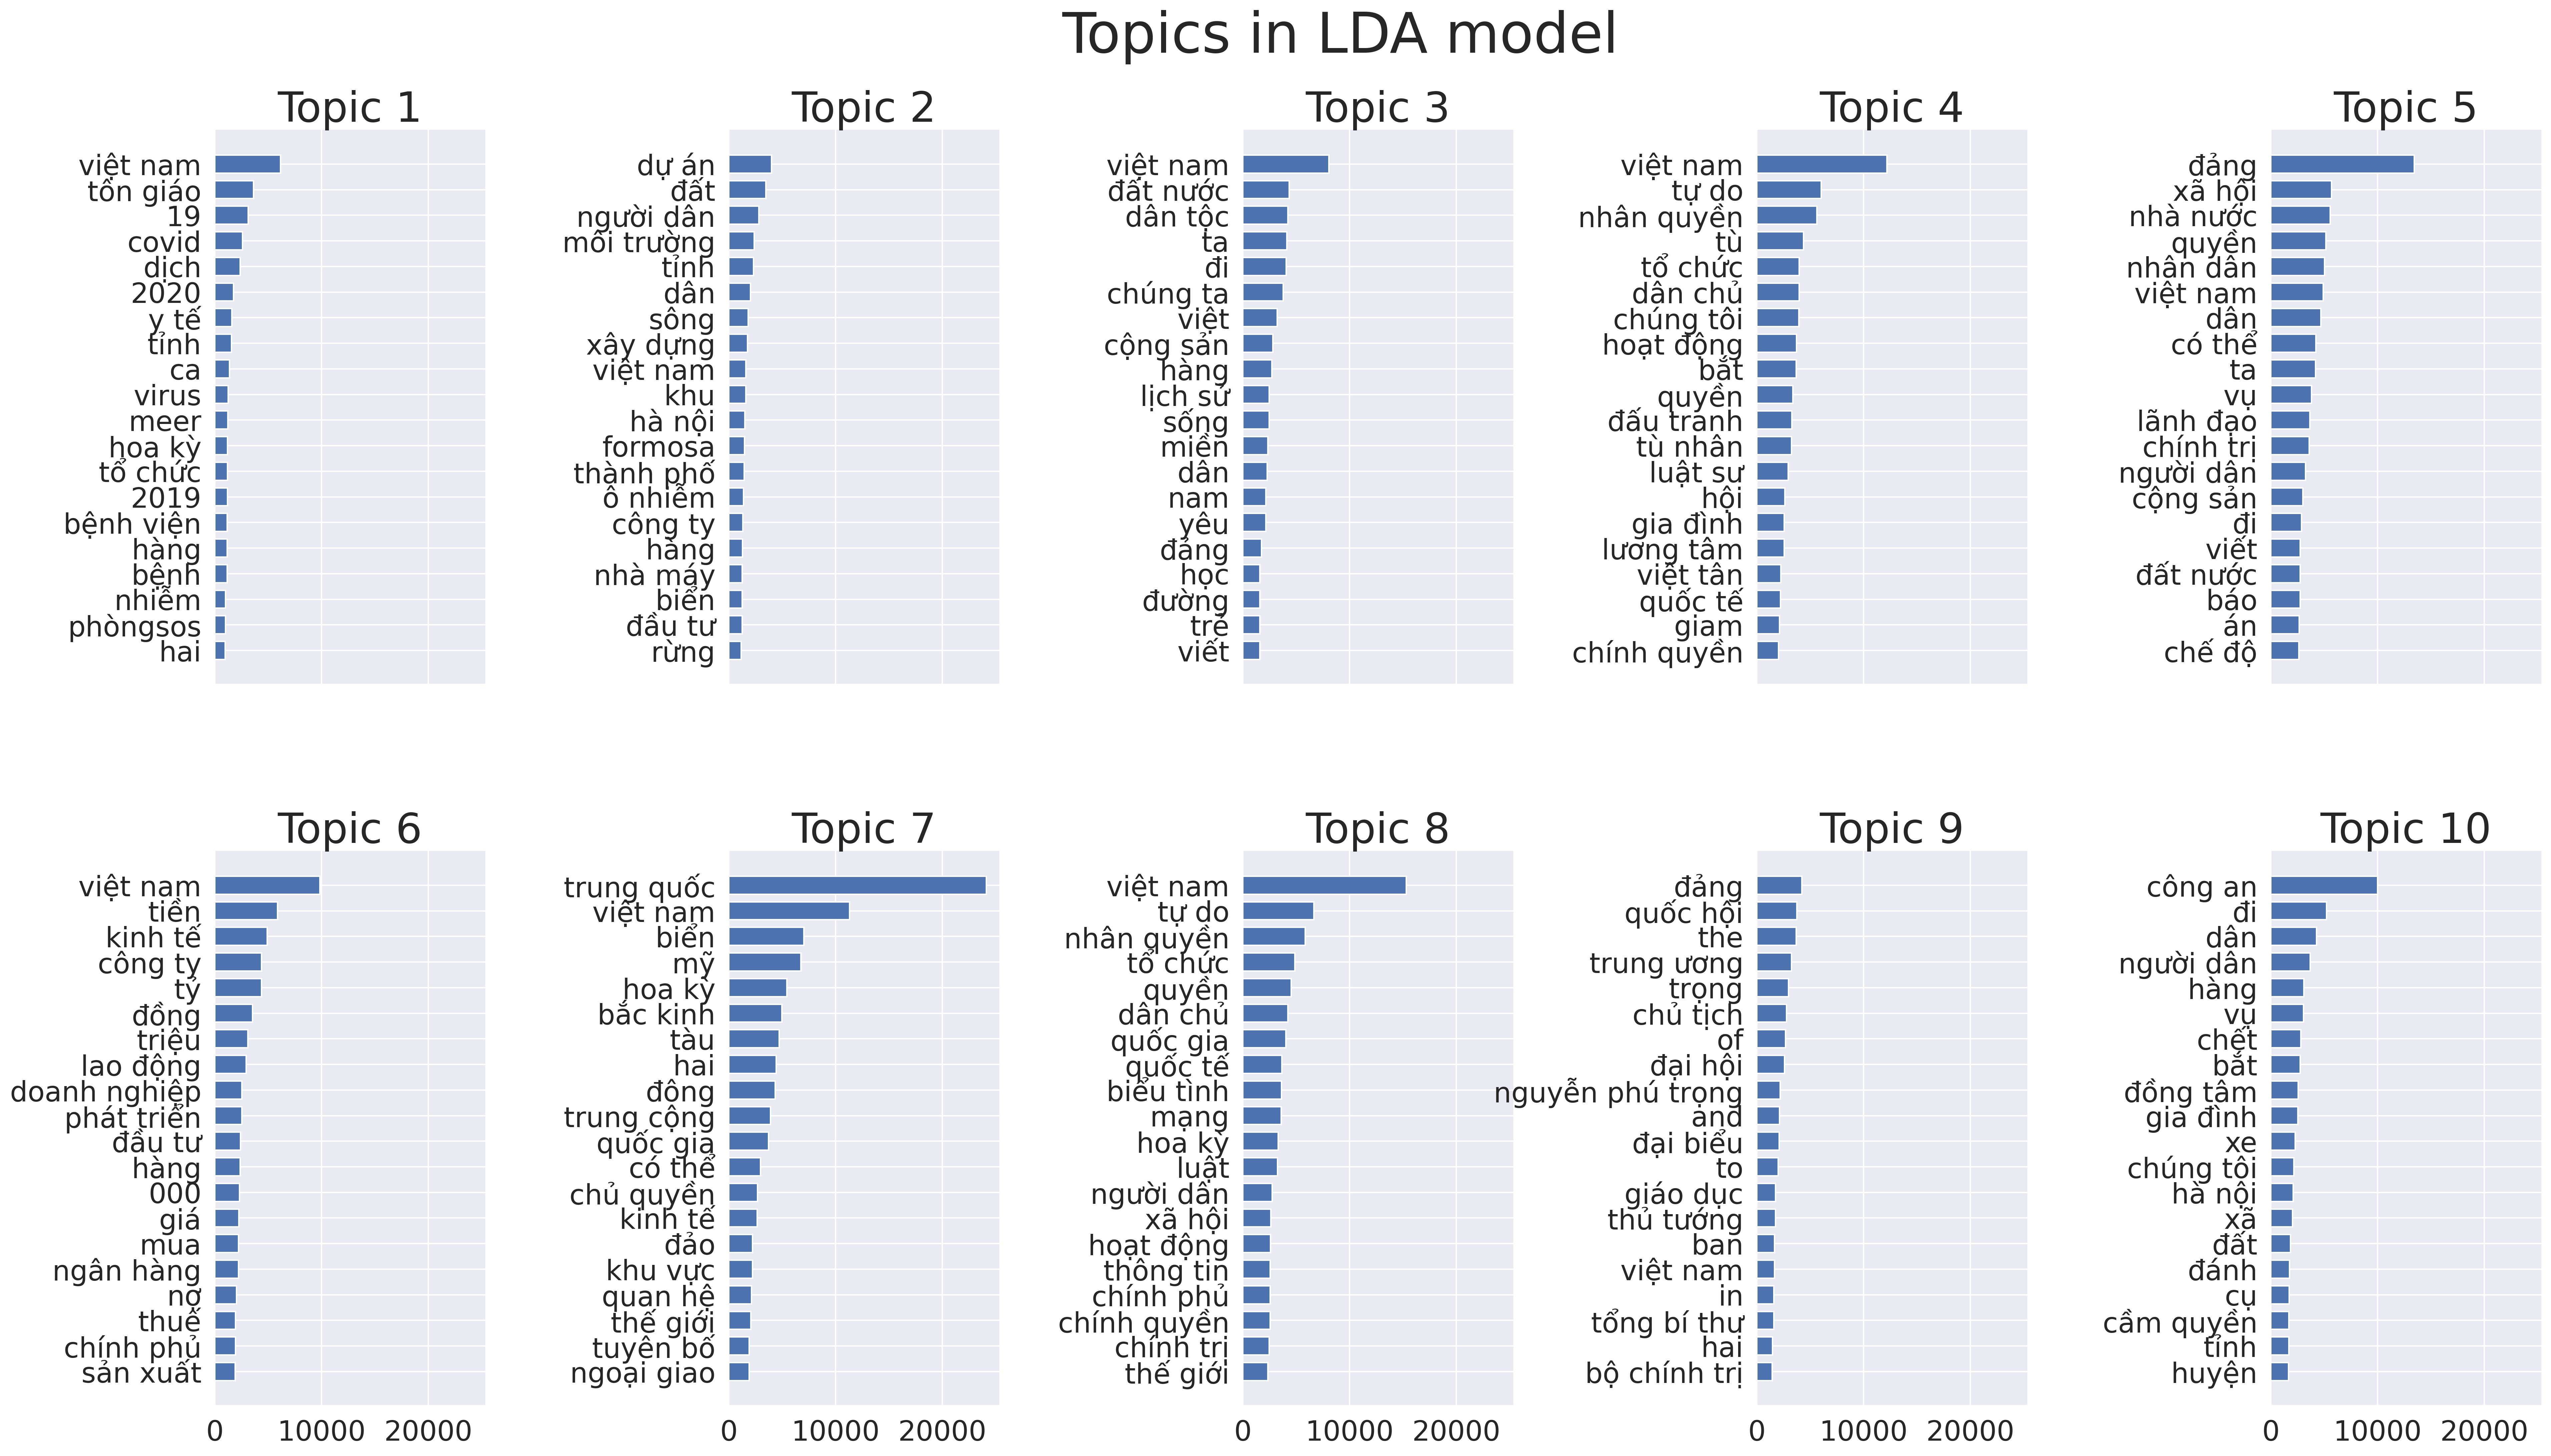

In [ ]:
n_features = 1000
n_components = 10
n_top_words = 20

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')


### Kết quả của clustering

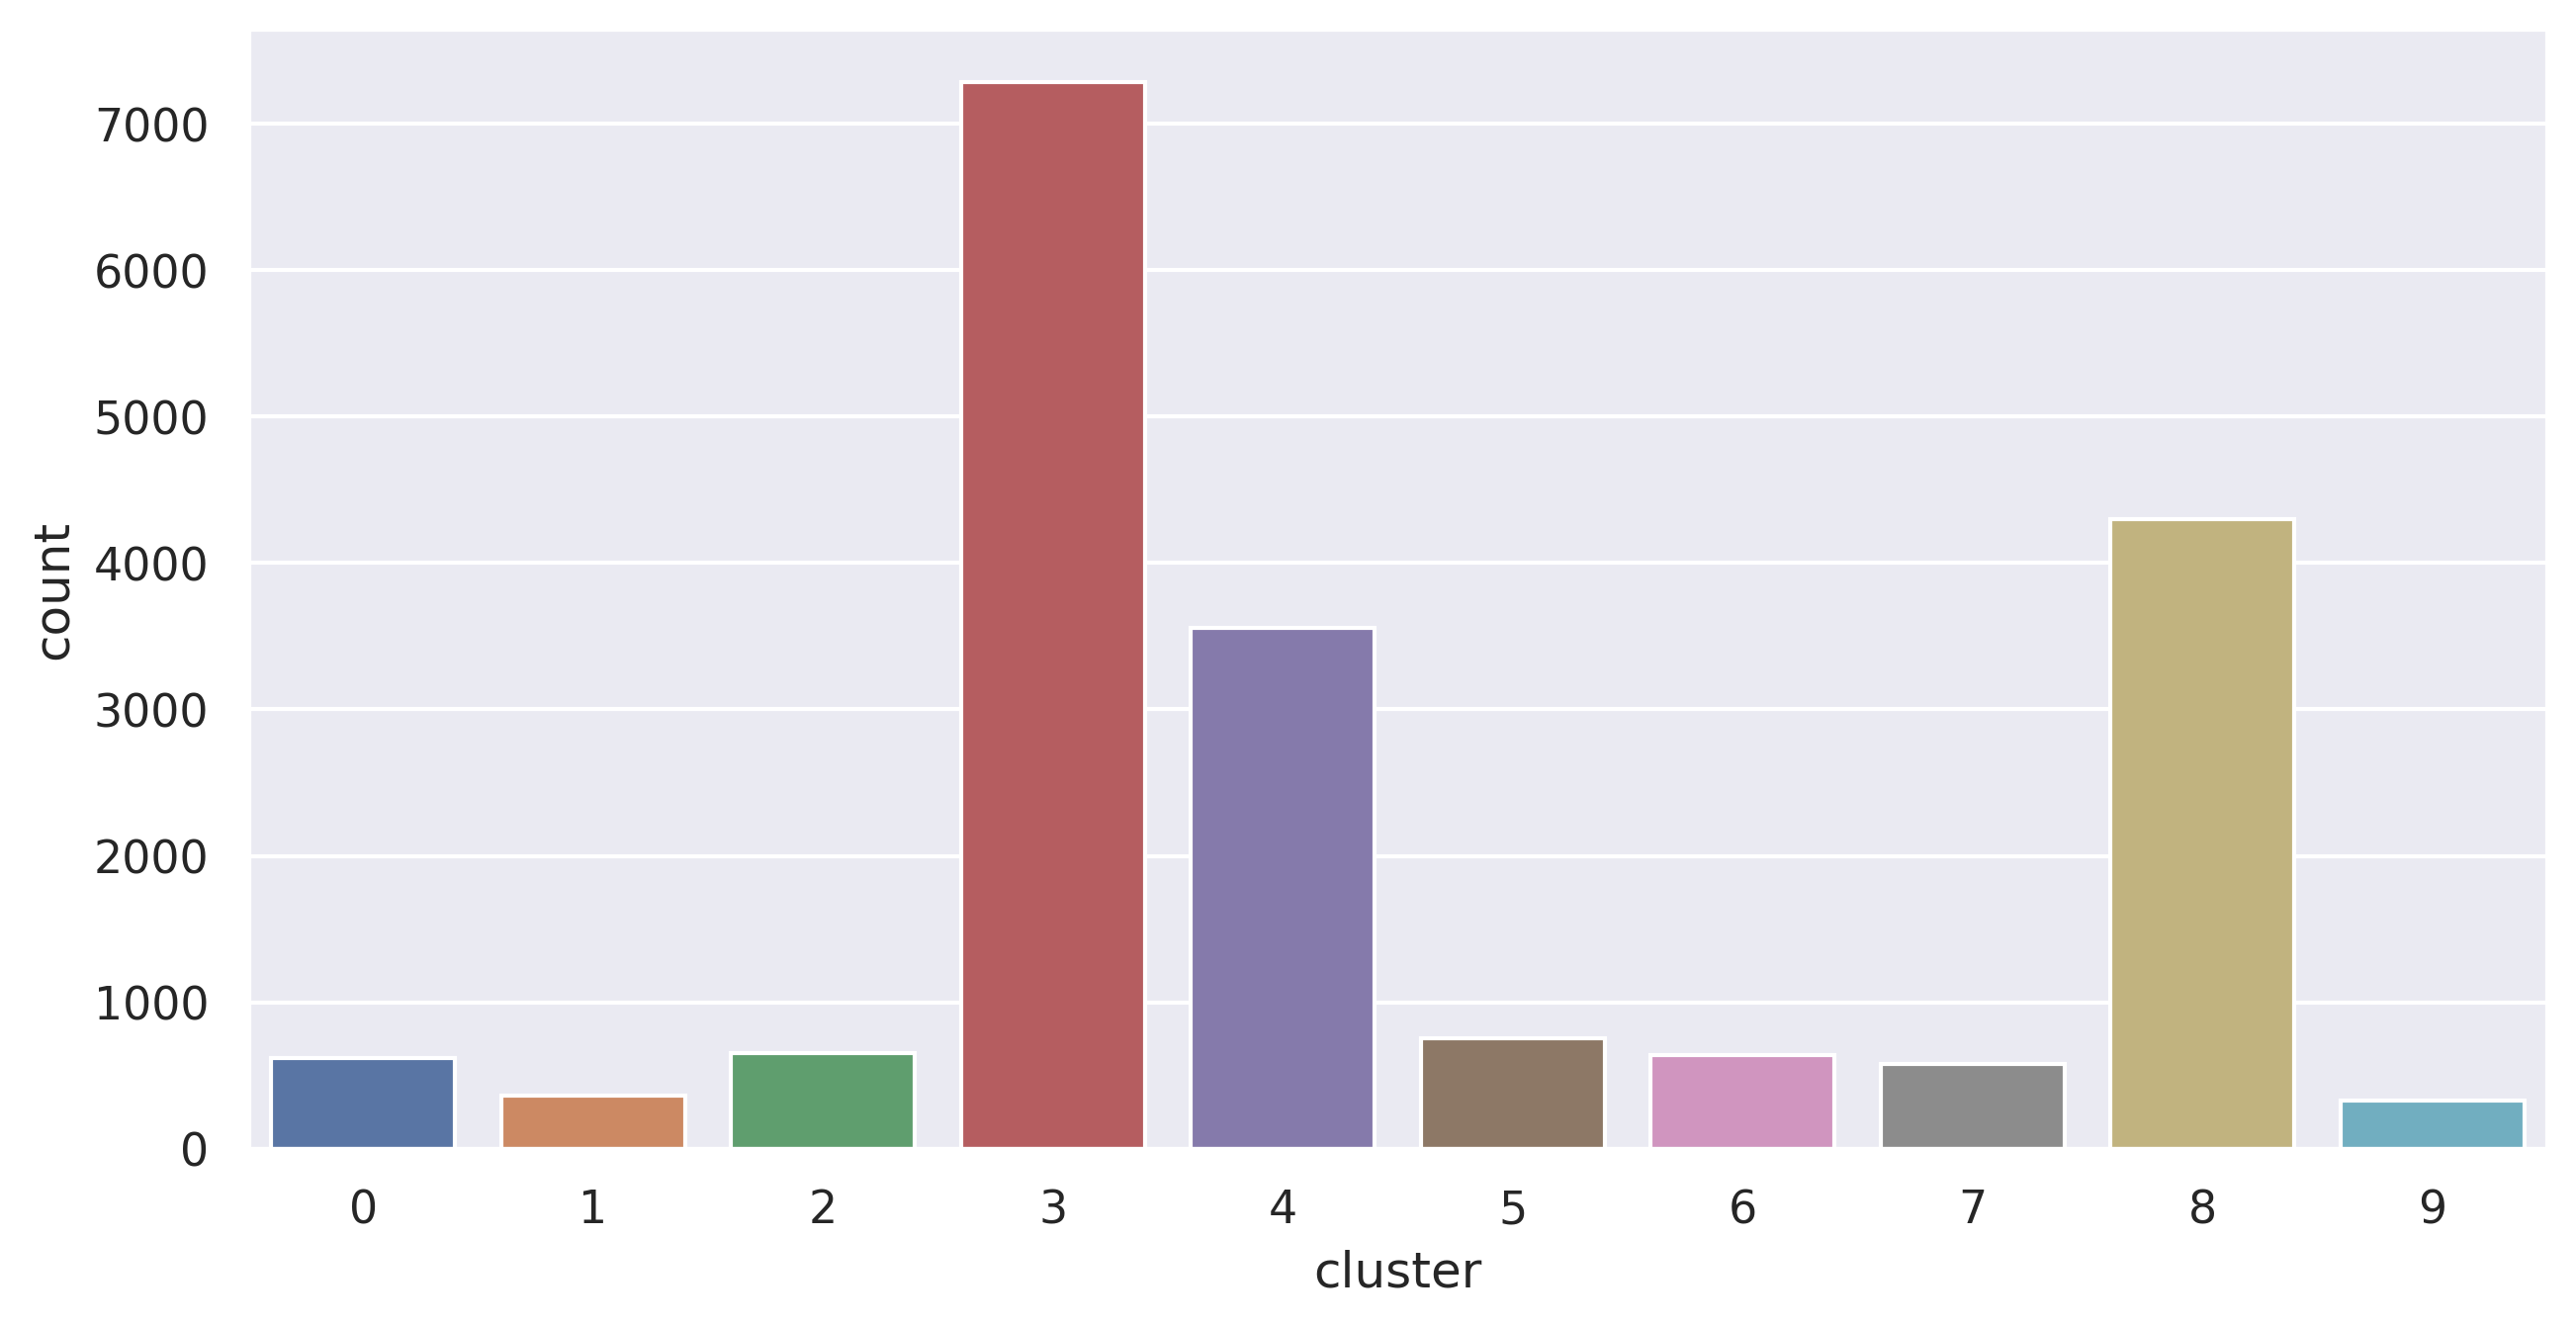

In [ ]:
sns.countplot(x = 'cluster', data = df[df['label'] == 1])
plt.show()